In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')


#data_frame = read_csv_835()

834
834
834


In [5]:
data_set = create_data_set(data_frame)

In [6]:
for i in data_set:
    print(i)

[66.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[50.  1.  2.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[49.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[66.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.]
[38.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.]
[27.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[15.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[50.  2.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.]
[47.  2.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.]
[44.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
[55.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.]
[55.  1.  2.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.]
[50.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.]
[69.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[70.  1.  0.  0.  0.

[47.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.]
[40.  2.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.]
[94.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.]
[60.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[52.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.]
[60.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[46.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[48.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.]
[70.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.]
[60.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
[40.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
[42.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
[45.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[45.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.]
[85.  2.  0.  1.  0.

[47.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.]
[55.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[60.  1.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[52.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.]
[45.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[59.  1.  2.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.]
[48.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[30.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[38.  2.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
[62.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[40.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[42.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
[42.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.]
[52.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.]
[50.  1.  1.  1.  0.

In [7]:
actual_x,actual_y = x_data_y_data_create_4(data_set)

In [8]:
len(actual_x[0])

13

# 01 # losses.mean_squared_error

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.2710 - acc: 0.5627 - val_loss: 0.2543 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.2393 - acc: 0.5960 - val_loss: 0.2606 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.2326 - acc: 0.6173 - val_loss: 0.2600 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.2297 - acc: 0.6333 - val_loss: 0.2400 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.2240 - acc: 0.6533 - val_loss: 0.2680 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.2226 - acc: 0.6547 - val_loss: 0.2339 - val_acc: 0.6429
Epoch 7/100
 - 0s - loss: 0.2224 - acc: 0.6533 - val_loss: 0.2382 - val_acc: 0.5833
Epoch 8/100
 - 0s - loss: 0.2192 - acc: 0.6467 - val_loss: 0.2393 - val_acc: 0.5833
Epoch 9/100
 - 0s - loss: 0.2171 - acc: 0.6627 - val_loss: 0.2339 - val_acc: 0.6429
Epoch 10/100
 - 0s - loss: 0.2120 - acc: 0.6827 - val_loss: 0.2271 - val_acc: 0.6667
Epoch 11/100
 - 0s - loss: 0.2098 - acc: 0.6880 - val_loss: 0.2258 - val_acc: 0.6786
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.1896 - acc: 0.7293 - val_loss: 0.2216 - val_acc: 0.6786
Epoch 98/100
 - 0s - loss: 0.1911 - acc: 0.7200 - val_loss: 0.2259 - val_acc: 0.6786
Epoch 99/100
 - 0s - loss: 0.1890 - acc: 0.7267 - val_loss: 0.2250 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.1890 - acc: 0.7280 - val_loss: 0.2219 - val_acc: 0.6548


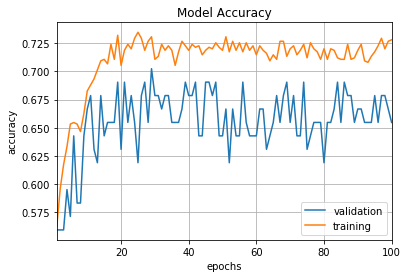

84/84 [==============================] - 0s 52us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.22187854278655278, 0.6547619019235883]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4048 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4047 - val_acc: 0.5952
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 94/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 95/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 96/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 97/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 98/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 99/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952
Epoch 100/100
 - 0s - loss: 0.2395 - acc: 0.6027 - val_loss: 0.2410 - val_acc: 0.5952


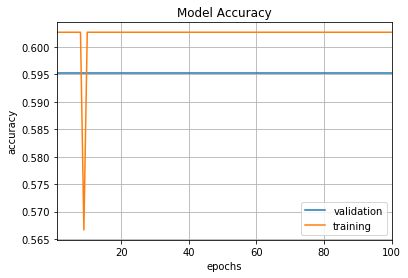

84/84 [==============================] - 0s 93us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.2409879636196863, 0.5952380895614624]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.2662 - acc: 0.5640 - val_loss: 0.2463 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.2463 - acc: 0.5480 - val_loss: 0.2486 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.2426 - acc: 0.6080 - val_loss: 0.2481 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.2395 - acc: 0.6080 - val_loss: 0.2493 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.2387 - acc: 0.6080 - val_loss: 0.2502 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.2386 - acc: 0.6080 - val_loss: 0.2506 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.2385 - acc: 0.6080 - val_loss: 0.2509 - val_acc: 0.5476
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2515 - val_acc: 0.5476
Epoch 94/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2515 - val_acc: 0.5476
Epoch 95/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2515 - val_acc: 0.5476
Epoch 96/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2513 - val_acc: 0.5476
Epoch 97/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2513 - val_acc: 0.5476
Epoch 98/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2514 - val_acc: 0.5476
Epoch 99/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2513 - val_acc: 0.5476
Epoch 100/100
 - 0s - loss: 0.2384 - acc: 0.6080 - val_loss: 0.2514 - val_acc: 0.5476


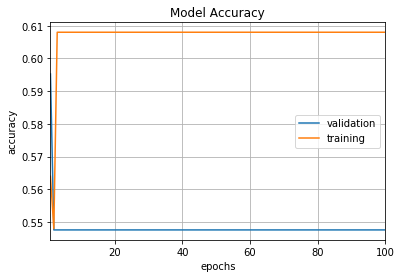

84/84 [==============================] - 0s 116us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.2513859172662099, 0.547619050457364]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.2397 - acc: 0.5800 - val_loss: 0.2250 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.2318 - acc: 0.6013 - val_loss: 0.2142 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.2298 - acc: 0.6133 - val_loss: 0.2150 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.2271 - acc: 0.6173 - val_loss: 0.2131 - val_acc: 0.7024
Epoch 5/100
 - 0s - loss: 0.2213 - acc: 0.6440 - val_loss: 0.2098 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.2186 - acc: 0.6520 - val_loss: 0.2057 - val_acc: 0.6905
Epoch 7/100
 - 0s - loss: 0.2170 - acc: 0.6613 - val_loss: 0.2010 - val_acc: 0.6905
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1913 - acc: 0.7213 - val_loss: 0.2255 - val_acc: 0.6429
Epoch 94/100
 - 0s - loss: 0.1906 - acc: 0.7307 - val_loss: 0.1960 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.1909 - acc: 0.7307 - val_loss: 0.2138 - val_acc: 0.6667
Epoch 96/100
 - 0s - loss: 0.1929 - acc: 0.7187 - val_loss: 0.2076 - val_acc: 0.6786
Epoch 97/100
 - 0s - loss: 0.1902 - acc: 0.7360 - val_loss: 0.1958 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.1933 - acc: 0.7173 - val_loss: 0.2010 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.1907 - acc: 0.7213 - val_loss: 0.2117 - val_acc: 0.6786
Epoch 100/100
 - 0s - loss: 0.1935 - acc: 0.7213 - val_loss: 0.1982 - val_acc: 0.7143


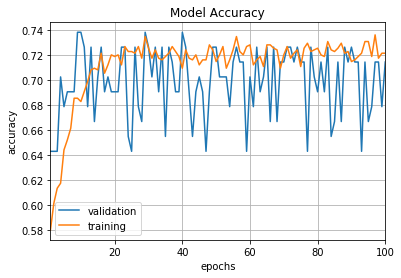

84/84 [==============================] - 0s 96us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.19819982207956768, 0.7142857114473978]
 best Score: 0.7142857114473978          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2876 - acc: 0.5433 - val_loss: 0.3007 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.2551 - acc: 0.5806 - val_loss: 0.3611 - val_acc: 0.3855
Epoch 3/100
 - 0s - loss: 0.2410 - acc: 0.6085 - val_loss: 0.4121 - val_acc: 0.3855
Epoch 4/100
 - 0s - loss: 0.2359 - acc: 0.6059 - val_loss: 0.2401 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.2256 - acc: 0.6405 - val_loss: 0.2244 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.2211 - acc: 0.6605 - val_loss: 0.2136 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.2183 - acc: 0.6418 - val_loss: 0.2692 - val_acc: 0.4578
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2006 - acc: 0.7097 - val_loss: 0.1846 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.2006 - acc: 0.7031 - val_loss: 0.2459 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.2025 - acc: 0.7031 - val_loss: 0.1941 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.1987 - acc: 0.7084 - val_loss: 0.1835 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.1987 - acc: 0.7057 - val_loss: 0.2371 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.2010 - acc: 0.7044 - val_loss: 0.2083 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.2002 - acc: 0.7177 - val_loss: 0.1882 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.1972 - acc: 0.7124 - val_loss: 0.1855 - val_acc: 0.6988


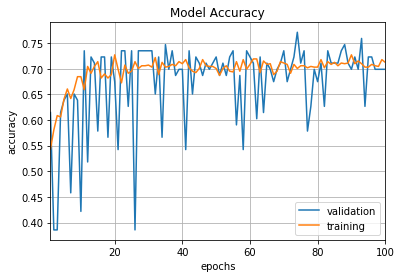

83/83 [==============================] - 0s 126us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.1855419816741024, 0.6987951871860458]
 best Score: 0.7142857114473978          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2370 - acc: 0.5979 - val_loss: 0.2257 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.2344 - acc: 0.5979 - val_loss: 0.2262 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.2339 - acc: 0.5979 - val_loss: 0.2241 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.2329 - acc: 0.5979 - val_loss: 0.2234 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.2320 - acc: 0.5979 - val_loss: 0.2274 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.2312 - acc: 0.5979 - val_loss: 0.2217 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.2297 - acc: 0.5979 - val_loss: 0.2207 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1937 - acc: 0.7204 - val_loss: 0.1963 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.1917 - acc: 0.7257 - val_loss: 0.1958 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.1933 - acc: 0.7297 - val_loss: 0.1941 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.1935 - acc: 0.7244 - val_loss: 0.1944 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.1933 - acc: 0.7137 - val_loss: 0.1936 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.1924 - acc: 0.7244 - val_loss: 0.1930 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.1935 - acc: 0.7177 - val_loss: 0.1938 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.1931 - acc: 0.7257 - val_loss: 0.1996 - val_acc: 0.6988


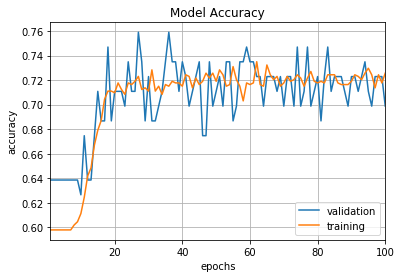

83/83 [==============================] - 0s 103us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.19957492886537528, 0.6987951871860458]
 best Score: 0.7142857114473978          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.6058 - acc: 0.3941 - val_loss: 0.5662 - val_acc: 0.4337
Epoch 2/100
 - 0s - loss: 0.5474 - acc: 0.4141 - val_loss: 0.5494 - val_acc: 0.4337
Epoch 3/100
 - 0s - loss: 0.2767 - acc: 0.5513 - val_loss: 0.3073 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.2352 - acc: 0.6019 - val_loss: 0.2452 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.2312 - acc: 0.6192 - val_loss: 0.2560 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.2259 - acc: 0.6258 - val_loss: 0.2425 - val_acc: 0.5542
Epoch 7/100
 - 0s - loss: 0.2221 - acc: 0.6431 - val_loss: 0.2576 - val_acc: 0.5542
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1898 - acc: 0.7337 - val_loss: 0.2523 - val_acc: 0.6386
Epoch 94/100
 - 0s - loss: 0.1884 - acc: 0.7270 - val_loss: 0.2390 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.1900 - acc: 0.7244 - val_loss: 0.2607 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.1906 - acc: 0.7190 - val_loss: 0.2421 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.1891 - acc: 0.7244 - val_loss: 0.2430 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.1887 - acc: 0.7284 - val_loss: 0.2433 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.1878 - acc: 0.7257 - val_loss: 0.2606 - val_acc: 0.6145
Epoch 100/100
 - 0s - loss: 0.1895 - acc: 0.7150 - val_loss: 0.2397 - val_acc: 0.6506


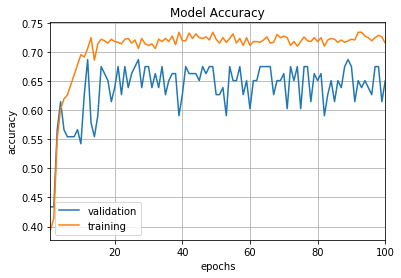

83/83 [==============================] - 0s 68us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.2396782444543149, 0.6506024161017084]
 best Score: 0.7142857114473978          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2442 - acc: 0.5846 - val_loss: 0.2609 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.2372 - acc: 0.5819 - val_loss: 0.2622 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.2364 - acc: 0.6032 - val_loss: 0.2529 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.2346 - acc: 0.6072 - val_loss: 0.2463 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.2349 - acc: 0.6085 - val_loss: 0.2420 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.2310 - acc: 0.6138 - val_loss: 0.2350 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.2287 - acc: 0.6232 - val_loss: 0.2423 - val_acc: 0.5783
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1957 - acc: 0.7111 - val_loss: 0.2060 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.1932 - acc: 0.7111 - val_loss: 0.1855 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.1960 - acc: 0.7190 - val_loss: 0.1878 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.1968 - acc: 0.7137 - val_loss: 0.1828 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.1968 - acc: 0.7124 - val_loss: 0.1894 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.1960 - acc: 0.7097 - val_loss: 0.1833 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.1962 - acc: 0.7057 - val_loss: 0.1832 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.1943 - acc: 0.7164 - val_loss: 0.1839 - val_acc: 0.7349


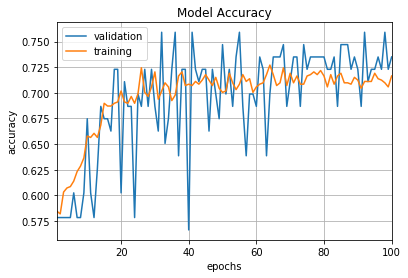

83/83 [==============================] - 0s 88us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.18392996095031142, 0.7349397654992988]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2544 - acc: 0.5566 - val_loss: 0.2307 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.2389 - acc: 0.5912 - val_loss: 0.2261 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.2319 - acc: 0.6019 - val_loss: 0.2269 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.2304 - acc: 0.6138 - val_loss: 0.2329 - val_acc: 0.6747
Epoch 5/100
 - 0s - loss: 0.2267 - acc: 0.6272 - val_loss: 0.2155 - val_acc: 0.6627
Epoch 6/100
 - 0s - loss: 0.2188 - acc: 0.6458 - val_loss: 0.2120 - val_acc: 0.6627
Epoch 7/100
 - 0s - loss: 0.2184 - acc: 0.6751 - val_loss: 0.2089 - val_acc: 0.6747
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1926 - acc: 0.7177 - val_loss: 0.2140 - val_acc: 0.6386
Epoch 94/100
 - 0s - loss: 0.1934 - acc: 0.7097 - val_loss: 0.1847 - val_acc: 0.7831
Epoch 95/100
 - 0s - loss: 0.1929 - acc: 0.7204 - val_loss: 0.2147 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.1923 - acc: 0.7177 - val_loss: 0.2684 - val_acc: 0.5301
Epoch 97/100
 - 0s - loss: 0.1947 - acc: 0.7084 - val_loss: 0.2013 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.1926 - acc: 0.7111 - val_loss: 0.1838 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.1927 - acc: 0.7204 - val_loss: 0.1864 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.1942 - acc: 0.7097 - val_loss: 0.2400 - val_acc: 0.6145


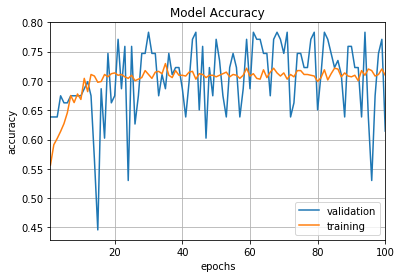

83/83 [==============================] - 0s 113us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.23999817310327506, 0.614457830607173]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2650 - acc: 0.5579 - val_loss: 0.2970 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.2425 - acc: 0.5792 - val_loss: 0.2498 - val_acc: 0.4578
Epoch 3/100
 - 0s - loss: 0.2414 - acc: 0.5885 - val_loss: 0.2257 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.2386 - acc: 0.5846 - val_loss: 0.3205 - val_acc: 0.3614
Epoch 5/100
 - 0s - loss: 0.2406 - acc: 0.5899 - val_loss: 0.2301 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.2398 - acc: 0.5979 - val_loss: 0.2237 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.2379 - acc: 0.5952 - val_loss: 0.2240 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1910 - acc: 0.7244 - val_loss: 0.2094 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.1901 - acc: 0.7310 - val_loss: 0.2105 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.1906 - acc: 0.7324 - val_loss: 0.2080 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.1914 - acc: 0.7310 - val_loss: 0.2137 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.1900 - acc: 0.7324 - val_loss: 0.2083 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.1909 - acc: 0.7257 - val_loss: 0.2073 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.1906 - acc: 0.7310 - val_loss: 0.2184 - val_acc: 0.6386
Epoch 100/100
 - 0s - loss: 0.1911 - acc: 0.7257 - val_loss: 0.2113 - val_acc: 0.6506


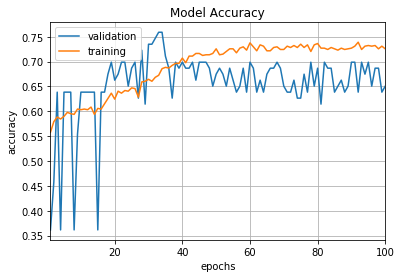

83/83 [==============================] - 0s 174us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.21129557023565454, 0.6506024038935282]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------




In [9]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_error,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [10]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7349397654992988
0.6560097543863612


[[0.22187854278655278, 0.6547619019235883],
 [0.2409879636196863, 0.5952380895614624],
 [0.2513859172662099, 0.547619050457364],
 [0.19819982207956768, 0.7142857114473978],
 [0.1855419816741024, 0.6987951871860458],
 [0.19957492886537528, 0.6987951871860458],
 [0.2396782444543149, 0.6506024161017084],
 [0.18392996095031142, 0.7349397654992988],
 [0.23999817310327506, 0.614457830607173],
 [0.21129557023565454, 0.6506024038935282]]

In [11]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6964926797116644


[0.7280000050862631,
 0.602666673262914,
 0.6080000042915344,
 0.721333335240682,
 0.7123834927294765,
 0.7256990671951508,
 0.7150466088131169,
 0.7163781658628492,
 0.709720376249001,
 0.7256990683856562]

# 02 # losses.mean_absolute_error,

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.3952 - acc: 0.6067 - val_loss: 0.4368 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.3922 - acc: 0.6067 - val_loss: 0.4369 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.3921 - acc: 0.6067 - val_loss: 0.4371 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.3917 - acc: 0.6067 - val_loss: 0.4361 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.3915 - acc: 0.6067 - val_loss: 0.4359 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.3915 - acc: 0.6067 - val_loss: 0.4360 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.3904 - acc: 0.6067 - val_loss: 0.4344 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.3905 - acc: 0.6080 - val_loss: 0.4344 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.3894 - acc: 0.6067 - val_loss: 0.4329 - val_acc: 0.5595
Epoch 10/100
 - 0s - loss: 0.3879 - acc: 0.6067 - val_loss: 0.4322 - val_acc: 0.5595
Epoch 11/100
 - 0s - loss: 0.3853 - acc: 0.6133 - val_loss: 0.4295 - val_acc: 0.5595
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.2726 - acc: 0.7307 - val_loss: 0.3502 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.2776 - acc: 0.7240 - val_loss: 0.3078 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.2714 - acc: 0.7373 - val_loss: 0.3191 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.2803 - acc: 0.7227 - val_loss: 0.3096 - val_acc: 0.6905


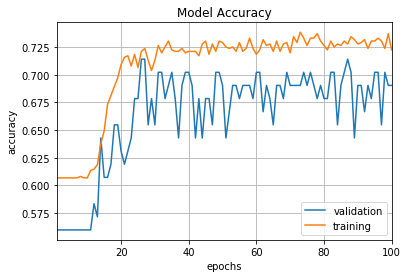

84/84 [==============================] - 0s 50us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.30958187722024466, 0.6904761876378741]
 best Score: 0.6904761876378741          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4047 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.3972 - acc: 0.6027 - val_loss: 0.4046 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.3971 - acc: 0.6027 - val_loss: 0.4041 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.3968 - acc: 0.6027 - val_loss: 0.4035 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.3967 - acc: 0.6027 - val_loss: 0.4035 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.3966 - acc: 0.6027 - val_loss: 0.4033 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.3963 - acc: 0.6027 - val_loss: 0.4034 - val_acc: 0.5952
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2758 - acc: 0.7307 - val_loss: 0.3215 - val_acc: 0.6905
Epoch 94/100
 - 0s - loss: 0.2800 - acc: 0.7187 - val_loss: 0.3210 - val_acc: 0.6905
Epoch 95/100
 - 0s - loss: 0.2753 - acc: 0.7333 - val_loss: 0.3017 - val_acc: 0.6786
Epoch 96/100
 - 0s - loss: 0.2794 - acc: 0.7240 - val_loss: 0.3108 - val_acc: 0.6786
Epoch 97/100
 - 0s - loss: 0.2762 - acc: 0.7227 - val_loss: 0.2976 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.2776 - acc: 0.7280 - val_loss: 0.3238 - val_acc: 0.6786
Epoch 99/100
 - 0s - loss: 0.2788 - acc: 0.7227 - val_loss: 0.3002 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.2794 - acc: 0.7280 - val_loss: 0.2971 - val_acc: 0.7143


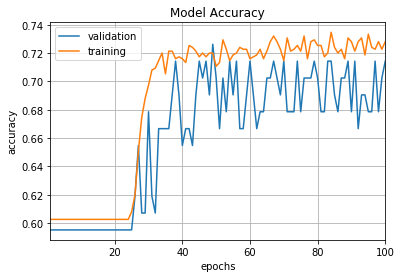

84/84 [==============================] - 0s 75us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.2971035838127136, 0.7142857142857143]
 best Score: 0.7142857142857143          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.4315 - acc: 0.6120 - val_loss: 0.4392 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.3930 - acc: 0.6080 - val_loss: 0.4427 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.3903 - acc: 0.6080 - val_loss: 0.4440 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.3899 - acc: 0.6080 - val_loss: 0.4419 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.3894 - acc: 0.6080 - val_loss: 0.4411 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.3880 - acc: 0.6080 - val_loss: 0.4347 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.3863 - acc: 0.6080 - val_loss: 0.4311 - val_acc: 0.5476
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2770 - acc: 0.7280 - val_loss: 0.2894 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.2800 - acc: 0.7253 - val_loss: 0.2842 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.2769 - acc: 0.7253 - val_loss: 0.2843 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.2751 - acc: 0.7307 - val_loss: 0.2850 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.2787 - acc: 0.7240 - val_loss: 0.2877 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.2781 - acc: 0.7293 - val_loss: 0.2879 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.2775 - acc: 0.7267 - val_loss: 0.2787 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.2779 - acc: 0.7280 - val_loss: 0.2807 - val_acc: 0.7143


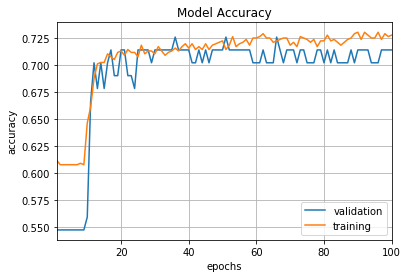

84/84 [==============================] - 0s 115us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.28065104143960135, 0.7142857142857143]
 best Score: 0.7142857142857143          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.4020 - acc: 0.5973 - val_loss: 0.3567 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.4018 - acc: 0.5973 - val_loss: 0.3566 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.4019 - acc: 0.5973 - val_loss: 0.3565 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.4016 - acc: 0.5973 - val_loss: 0.3562 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.4012 - acc: 0.5973 - val_loss: 0.3558 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 0.4008 - acc: 0.5973 - val_loss: 0.3556 - val_acc: 0.6429
Epoch 7/100
 - 0s - loss: 0.4002 - acc: 0.5973 - val_loss: 0.3549 - val_acc: 0.6429
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.2722 - acc: 0.7293 - val_loss: 0.2904 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.2738 - acc: 0.7293 - val_loss: 0.2981 - val_acc: 0.6786
Epoch 95/100
 - 0s - loss: 0.2756 - acc: 0.7240 - val_loss: 0.2993 - val_acc: 0.6786
Epoch 96/100
 - 0s - loss: 0.2773 - acc: 0.7227 - val_loss: 0.3000 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.2747 - acc: 0.7240 - val_loss: 0.3002 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.2790 - acc: 0.7173 - val_loss: 0.2949 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.2745 - acc: 0.7293 - val_loss: 0.2993 - val_acc: 0.6786
Epoch 100/100
 - 0s - loss: 0.2747 - acc: 0.7307 - val_loss: 0.2835 - val_acc: 0.7381


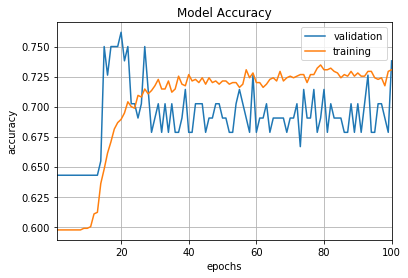

84/84 [==============================] - 0s 75us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.28348961614427115, 0.7380952380952381]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.5113 - acc: 0.4940 - val_loss: 0.4707 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.4347 - acc: 0.6005 - val_loss: 0.3836 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.4008 - acc: 0.6005 - val_loss: 0.3805 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.3984 - acc: 0.6005 - val_loss: 0.3803 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.3979 - acc: 0.6005 - val_loss: 0.3776 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.3967 - acc: 0.6005 - val_loss: 0.3733 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.3959 - acc: 0.6005 - val_loss: 0.3686 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2749 - acc: 0.7310 - val_loss: 0.2913 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.2781 - acc: 0.7270 - val_loss: 0.2958 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.2727 - acc: 0.7350 - val_loss: 0.3003 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.2775 - acc: 0.7270 - val_loss: 0.2933 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.2744 - acc: 0.7270 - val_loss: 0.2796 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.2749 - acc: 0.7284 - val_loss: 0.2762 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.2732 - acc: 0.7284 - val_loss: 0.2792 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.2753 - acc: 0.7270 - val_loss: 0.2775 - val_acc: 0.7349


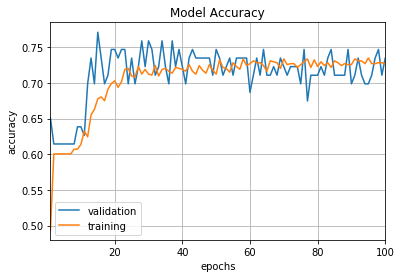

83/83 [==============================] - 0s 137us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.27748567655862094, 0.7349397654992988]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.4021 - acc: 0.5979 - val_loss: 0.3614 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.2822 - acc: 0.7257 - val_loss: 0.2843 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.2838 - acc: 0.7190 - val_loss: 0.2928 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.2836 - acc: 0.7204 - val_loss: 0.2842 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.2815 - acc: 0.7284 - val_loss: 0.2940 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.2832 - acc: 0.7217 - val_loss: 0.3050 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.2852 - acc: 0.7177 - val_loss: 0.2810 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.2845 - acc: 0.7217 - val_loss: 0.2869 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.2831 - acc: 0.7230 - val_loss: 0.2909 - val_acc: 0.7108


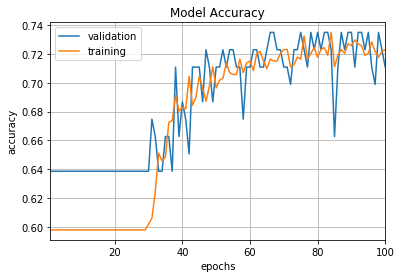

83/83 [==============================] - 0s 83us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.2908939001071884, 0.7108433713395912]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.4931 - acc: 0.5073 - val_loss: 0.4365 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.3937 - acc: 0.6059 - val_loss: 0.4341 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.3929 - acc: 0.6059 - val_loss: 0.4341 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.3928 - acc: 0.6059 - val_loss: 0.4341 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.3923 - acc: 0.6059 - val_loss: 0.4344 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.3922 - acc: 0.6059 - val_loss: 0.4338 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.3912 - acc: 0.6059 - val_loss: 0.4390 - val_acc: 0.5663
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2727 - acc: 0.7337 - val_loss: 0.3133 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.2752 - acc: 0.7270 - val_loss: 0.3151 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.2747 - acc: 0.7270 - val_loss: 0.3092 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.2738 - acc: 0.7337 - val_loss: 0.3159 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.2767 - acc: 0.7310 - val_loss: 0.3120 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.2746 - acc: 0.7270 - val_loss: 0.3058 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.2723 - acc: 0.7364 - val_loss: 0.3063 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.2723 - acc: 0.7324 - val_loss: 0.3087 - val_acc: 0.7108


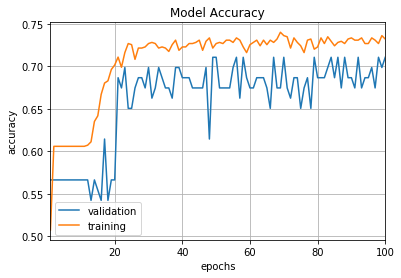

83/83 [==============================] - 0s 111us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.3086949443242636, 0.7108433799571302]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 2/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 3/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 4/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 5/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 6/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 7/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 94/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 95/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 96/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 97/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 98/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 99/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217
Epoch 100/100
 - 0s - loss: 0.6045 - acc: 0.3955 - val_loss: 0.5783 - val_acc: 0.4217


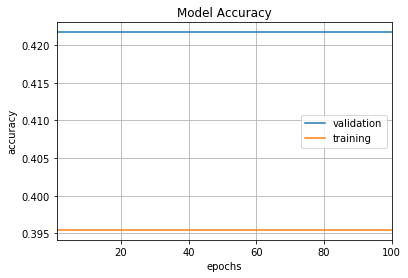

83/83 [==============================] - 0s 92us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5783132555254971, 0.4216867512967213]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 5/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 6/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 7/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 94/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 95/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 96/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 97/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 98/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 99/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614
Epoch 100/100
 - 0s - loss: 0.5979 - acc: 0.4021 - val_loss: 0.6386 - val_acc: 0.3614


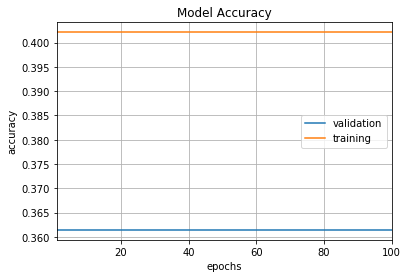

83/83 [==============================] - 0s 84us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6385542211762394, 0.361445785645979]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.5975 - acc: 0.4021 - val_loss: 0.6377 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.5615 - acc: 0.4541 - val_loss: 0.4910 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.4808 - acc: 0.5846 - val_loss: 0.4557 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.4625 - acc: 0.5979 - val_loss: 0.4386 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.4522 - acc: 0.5979 - val_loss: 0.4266 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.4449 - acc: 0.5979 - val_loss: 0.4169 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.4389 - acc: 0.5979 - val_loss: 0.4096 - val_acc: 0.6386
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2765 - acc: 0.7310 - val_loss: 0.3173 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.2727 - acc: 0.7377 - val_loss: 0.3731 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.2816 - acc: 0.7310 - val_loss: 0.3753 - val_acc: 0.6265
Epoch 96/100
 - 0s - loss: 0.2740 - acc: 0.7310 - val_loss: 0.3351 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.2791 - acc: 0.7284 - val_loss: 0.3716 - val_acc: 0.6265
Epoch 98/100
 - 0s - loss: 0.2821 - acc: 0.7217 - val_loss: 0.3788 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.2856 - acc: 0.7150 - val_loss: 0.3345 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.2737 - acc: 0.7324 - val_loss: 0.2870 - val_acc: 0.6988


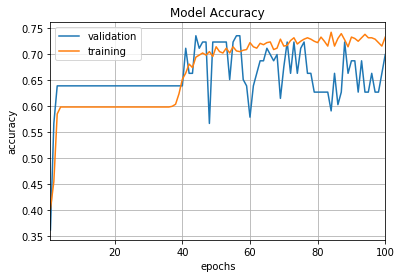

83/83 [==============================] - 0s 111us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.2870470127427434, 0.6987951871860458]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------




In [12]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss= losses.mean_absolute_error,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])
    
    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [13]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7380952380952381
0.6495697095229307


[[0.30958187722024466, 0.6904761876378741],
 [0.2971035838127136, 0.7142857142857143],
 [0.28065104143960135, 0.7142857142857143],
 [0.28348961614427115, 0.7380952380952381],
 [0.27748567655862094, 0.7349397654992988],
 [0.2908939001071884, 0.7108433713395912],
 [0.3086949443242636, 0.7108433799571302],
 [0.5783132555254971, 0.4216867512967213],
 [0.6385542211762394, 0.361445785645979],
 [0.2870470127427434, 0.6987951871860458]]

In [14]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6621716836953871


[0.7226666682958602,
 0.7280000030994416,
 0.7279999975363414,
 0.7306666628519694,
 0.7270306241655159,
 0.7230359530956862,
 0.7323568556184934,
 0.39547271193184963,
 0.4021305004544011,
 0.7323568599043134]

# 03 # losses.mean_absolute_percentage_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 257192799.1467 - acc: 0.5267 - val_loss: 244467046.0952 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 235220346.0267 - acc: 0.6107 - val_loss: 238861932.9524 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 225958237.8667 - acc: 0.6067 - val_loss: 234213569.9048 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 217873690.3467 - acc: 0.6067 - val_loss: 229772143.2381 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 210800644.8000 - acc: 0.6067 - val_loss: 226357507.8095 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 205484558.5067 - acc: 0.6067 - val_loss: 223990125.1429 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 202214206.9333 - acc: 0.6067 - val_loss: 222656829.6190 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 200260674.0800 - acc: 0.6067 - val_loss: 221861629.7619 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 199132456.9867 - acc: 0.6067 - val_loss: 221396494.0952 - val_acc: 0.5595
Epoch 10/100
 - 0s - loss: 198463500.2000 - acc

Epoch 82/100
 - 0s - loss: 136885221.8267 - acc: 0.7347 - val_loss: 153810578.6771 - val_acc: 0.7143
Epoch 83/100
 - 0s - loss: 135663020.8683 - acc: 0.7333 - val_loss: 156780279.0253 - val_acc: 0.6905
Epoch 84/100
 - 0s - loss: 136437500.8933 - acc: 0.7307 - val_loss: 152357397.1845 - val_acc: 0.7024
Epoch 85/100
 - 0s - loss: 135859374.2708 - acc: 0.7320 - val_loss: 163433993.0446 - val_acc: 0.6905
Epoch 86/100
 - 0s - loss: 136594328.3583 - acc: 0.7333 - val_loss: 158801220.8750 - val_acc: 0.7024
Epoch 87/100
 - 0s - loss: 138899864.4800 - acc: 0.7280 - val_loss: 152428225.9196 - val_acc: 0.7024
Epoch 88/100
 - 0s - loss: 137261412.9867 - acc: 0.7293 - val_loss: 161880202.6443 - val_acc: 0.6786
Epoch 89/100
 - 0s - loss: 136624007.2500 - acc: 0.7293 - val_loss: 152570078.9702 - val_acc: 0.7024
Epoch 90/100
 - 0s - loss: 134721892.5292 - acc: 0.7400 - val_loss: 158149468.9628 - val_acc: 0.7024
Epoch 91/100
 - 0s - loss: 134890118.3858 - acc: 0.7267 - val_loss: 156678032.4688 - val_ac

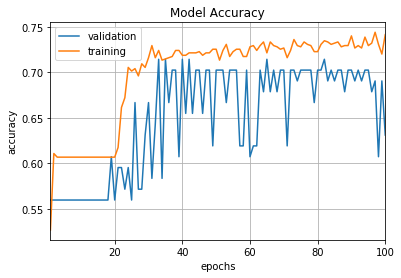

84/84 [==============================] - 0s 136us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [186384388.57142857, 0.6309523752757481]
 best Score: 0.6309523752757481          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 248298373.1200 - acc: 0.6000 - val_loss: 246789956.5714 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 245040485.5467 - acc: 0.6027 - val_loss: 243911069.3333 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 242040014.9333 - acc: 0.6027 - val_loss: 241238243.8095 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 239206410.4533 - acc: 0.6027 - val_loss: 238655590.0952 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 236475324.1600 - acc: 0.6027 - val_loss: 236174409.1429 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 233910798.5067 - acc: 0.6027 - val_loss: 233893756.9524 - val_acc: 0.59

Epoch 79/100
 - 0s - loss: 198792207.0400 - acc: 0.6027 - val_loss: 202492699.1429 - val_acc: 0.5952
Epoch 80/100
 - 0s - loss: 198782710.2400 - acc: 0.6027 - val_loss: 202484288.1905 - val_acc: 0.5952
Epoch 81/100
 - 0s - loss: 198773879.6800 - acc: 0.6027 - val_loss: 202476275.2381 - val_acc: 0.5952
Epoch 82/100
 - 0s - loss: 198765446.1867 - acc: 0.6027 - val_loss: 202468704.0952 - val_acc: 0.5952
Epoch 83/100
 - 0s - loss: 198757682.6667 - acc: 0.6027 - val_loss: 202461896.3810 - val_acc: 0.5952
Epoch 84/100
 - 0s - loss: 198750674.7733 - acc: 0.6027 - val_loss: 202455687.8095 - val_acc: 0.5952
Epoch 85/100
 - 0s - loss: 198744332.0758 - acc: 0.6027 - val_loss: 202450193.1429 - val_acc: 0.5952
Epoch 86/100
 - 0s - loss: 198738673.0750 - acc: 0.6027 - val_loss: 202445195.7143 - val_acc: 0.5952
Epoch 87/100
 - 0s - loss: 198733459.8400 - acc: 0.6027 - val_loss: 202440483.8095 - val_acc: 0.5952
Epoch 88/100
 - 0s - loss: 198728541.2312 - acc: 0.6027 - val_loss: 202436082.8571 - val_ac

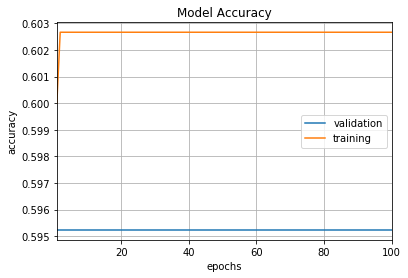

84/84 [==============================] - 0s 146us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [202402476.19047618, 0.5952380895614624]
 best Score: 0.6309523752757481          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 212400076.4800 - acc: 0.6013 - val_loss: 221047791.0476 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 198217033.3867 - acc: 0.6080 - val_loss: 222174911.9048 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 196318675.8400 - acc: 0.6080 - val_loss: 223285312.1905 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 195857880.2933 - acc: 0.6080 - val_loss: 223970901.5238 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 195808775.1867 - acc: 0.6080 - val_loss: 224192488.3810 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 195627489.6200 - acc: 0.6080 - val_loss: 223567975.8095 - val_acc: 0.54

Epoch 79/100
 - 0s - loss: 141204845.5450 - acc: 0.7227 - val_loss: 136500260.8393 - val_acc: 0.7381
Epoch 80/100
 - 0s - loss: 142173900.8567 - acc: 0.7187 - val_loss: 134387789.7068 - val_acc: 0.7381
Epoch 81/100
 - 0s - loss: 140389239.6267 - acc: 0.7227 - val_loss: 137782314.6562 - val_acc: 0.7143
Epoch 82/100
 - 0s - loss: 143807467.3856 - acc: 0.7160 - val_loss: 133003253.5603 - val_acc: 0.7381
Epoch 83/100
 - 0s - loss: 139734871.0806 - acc: 0.7240 - val_loss: 123900212.8469 - val_acc: 0.7619
Epoch 84/100
 - 0s - loss: 143019011.7867 - acc: 0.7200 - val_loss: 140778927.1726 - val_acc: 0.7024
Epoch 85/100
 - 0s - loss: 142177647.5425 - acc: 0.7187 - val_loss: 144063999.4315 - val_acc: 0.7024
Epoch 86/100
 - 0s - loss: 140765997.7633 - acc: 0.7213 - val_loss: 148593240.2262 - val_acc: 0.7024
Epoch 87/100
 - 0s - loss: 143198920.4133 - acc: 0.7160 - val_loss: 135464235.2537 - val_acc: 0.7381
Epoch 88/100
 - 0s - loss: 142998314.5621 - acc: 0.7187 - val_loss: 122887718.0651 - val_ac

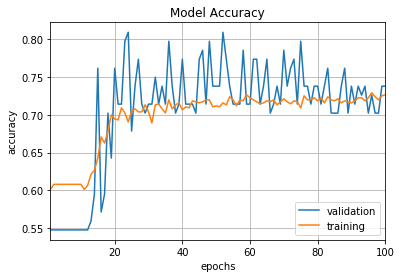

84/84 [==============================] - 0s 84us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [132373696.38095239, 0.7380952409335545]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 201295665.7449 - acc: 0.5973 - val_loss: 178612401.1429 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 202008493.2800 - acc: 0.5973 - val_loss: 178601566.4762 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 201046079.0875 - acc: 0.5973 - val_loss: 178601422.0952 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 201035750.7517 - acc: 0.5973 - val_loss: 179287355.0476 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 200965943.5200 - acc: 0.5973 - val_loss: 178642837.3333 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 201136175.1467 - acc: 0.5973 - val_loss: 178455030.4762 - val_acc: 0.642

Epoch 79/100
 - 0s - loss: 140363292.1342 - acc: 0.7200 - val_loss: 161822798.6365 - val_acc: 0.6667
Epoch 80/100
 - 0s - loss: 137999026.3167 - acc: 0.7293 - val_loss: 152927358.0913 - val_acc: 0.6905
Epoch 81/100
 - 0s - loss: 139436955.5733 - acc: 0.7253 - val_loss: 147350788.6998 - val_acc: 0.7143
Epoch 82/100
 - 0s - loss: 137418382.1297 - acc: 0.7267 - val_loss: 137875340.5509 - val_acc: 0.7262
Epoch 83/100
 - 0s - loss: 139045092.8875 - acc: 0.7240 - val_loss: 162766176.7377 - val_acc: 0.6667
Epoch 84/100
 - 0s - loss: 138593329.0933 - acc: 0.7213 - val_loss: 145321031.5279 - val_acc: 0.7143
Epoch 85/100
 - 0s - loss: 140293445.0667 - acc: 0.7147 - val_loss: 143138902.3316 - val_acc: 0.7143
Epoch 86/100
 - 0s - loss: 139844424.0717 - acc: 0.7147 - val_loss: 157183108.2052 - val_acc: 0.6786
Epoch 87/100
 - 0s - loss: 142902696.8842 - acc: 0.7147 - val_loss: 155529991.5245 - val_acc: 0.6905
Epoch 88/100
 - 0s - loss: 139768552.3050 - acc: 0.7280 - val_loss: 167189703.0584 - val_ac

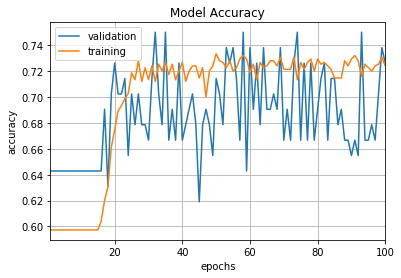

84/84 [==============================] - 0s 148us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [139649939.80952382, 0.7261904733521598]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 198189834.0985 - acc: 0.6005 - val_loss: 225882803.8554 - val_acc: 0.7108
Epoch 2/100
 - 0s - loss: 197540848.6099 - acc: 0.6072 - val_loss: 185780838.9096 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 189980169.3103 - acc: 0.6245 - val_loss: 180400225.3803 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 182962752.3782 - acc: 0.6538 - val_loss: 166054262.9277 - val_acc: 0.6988
Epoch 5/100
 - 0s - loss: 177487170.7204 - acc: 0.6684 - val_loss: 286623694.6506 - val_acc: 0.3976
Epoch 6/100
 - 0s - loss: 177667136.9667 - acc: 0.6538 - val_loss: 159195726.4383 - val_acc: 0.72

Epoch 79/100
 - 0s - loss: 136012178.5469 - acc: 0.7284 - val_loss: 149960806.0431 - val_acc: 0.6988
Epoch 80/100
 - 0s - loss: 134359911.7000 - acc: 0.7350 - val_loss: 150816882.7612 - val_acc: 0.6988
Epoch 81/100
 - 0s - loss: 135935062.1719 - acc: 0.7337 - val_loss: 151069180.9055 - val_acc: 0.6988
Epoch 82/100
 - 0s - loss: 136257057.0706 - acc: 0.7270 - val_loss: 151533070.5016 - val_acc: 0.6867
Epoch 83/100
 - 0s - loss: 133937574.8618 - acc: 0.7364 - val_loss: 150312369.8884 - val_acc: 0.6988
Epoch 84/100
 - 0s - loss: 133987623.8240 - acc: 0.7337 - val_loss: 149809773.2273 - val_acc: 0.6988
Epoch 85/100
 - 0s - loss: 134690439.6981 - acc: 0.7324 - val_loss: 151507165.2027 - val_acc: 0.6988
Epoch 86/100
 - 0s - loss: 134397023.7715 - acc: 0.7350 - val_loss: 149688743.4541 - val_acc: 0.6988
Epoch 87/100
 - 0s - loss: 135547808.9601 - acc: 0.7297 - val_loss: 150745972.6356 - val_acc: 0.6988
Epoch 88/100
 - 0s - loss: 130875468.8990 - acc: 0.7430 - val_loss: 147638406.4707 - val_ac

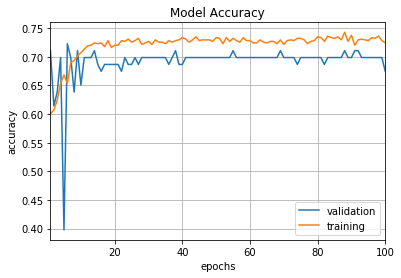

83/83 [==============================] - 0s 140us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [158138256.19277108, 0.6746988016438772]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 249806216.9028 - acc: 0.5060 - val_loss: 184510748.5301 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 199228100.4740 - acc: 0.5979 - val_loss: 198239170.6988 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 197812760.3995 - acc: 0.5979 - val_loss: 187014441.8313 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 193895042.4075 - acc: 0.6112 - val_loss: 186352733.4940 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 190136244.7190 - acc: 0.6232 - val_loss: 185092778.0241 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 183021340.0586 - acc: 0.6538 - val_loss: 198953318.1687 - val_acc: 0.68

Epoch 79/100
 - 0s - loss: 135613631.1025 - acc: 0.7350 - val_loss: 146452509.5904 - val_acc: 0.7108
Epoch 80/100
 - 0s - loss: 138219263.6202 - acc: 0.7310 - val_loss: 148109003.3735 - val_acc: 0.6988
Epoch 81/100
 - 0s - loss: 136618917.0107 - acc: 0.7337 - val_loss: 149267271.5181 - val_acc: 0.6988
Epoch 82/100
 - 0s - loss: 137102914.1064 - acc: 0.7257 - val_loss: 149072291.4699 - val_acc: 0.7108
Epoch 83/100
 - 0s - loss: 136597135.7093 - acc: 0.7337 - val_loss: 148723702.7470 - val_acc: 0.6988
Epoch 84/100
 - 0s - loss: 137721392.5593 - acc: 0.7310 - val_loss: 148798157.8795 - val_acc: 0.6988
Epoch 85/100
 - 0s - loss: 136943753.2716 - acc: 0.7270 - val_loss: 147148151.1325 - val_acc: 0.7108
Epoch 86/100
 - 0s - loss: 138052149.2802 - acc: 0.7217 - val_loss: 148830305.7349 - val_acc: 0.6988
Epoch 87/100
 - 0s - loss: 136519937.8332 - acc: 0.7350 - val_loss: 149314429.6867 - val_acc: 0.6988
Epoch 88/100
 - 0s - loss: 136222055.7372 - acc: 0.7310 - val_loss: 149084542.0723 - val_ac

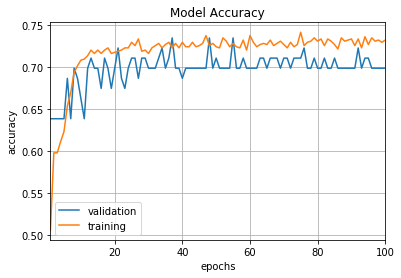

83/83 [==============================] - 0s 164us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [149101728.38554215, 0.6987951785685068]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 196529327.8189 - acc: 0.6059 - val_loss: 216794301.1084 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 196685273.9574 - acc: 0.6059 - val_loss: 216695726.6506 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 195950826.3287 - acc: 0.6059 - val_loss: 216554274.3133 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 194191214.2317 - acc: 0.6059 - val_loss: 215082525.8795 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 192134557.9308 - acc: 0.6045 - val_loss: 223670955.1807 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 183049858.6525 - acc: 0.6365 - val_loss: 201902195.0843 - val_acc: 0.60

Epoch 79/100
 - 0s - loss: 135486181.4794 - acc: 0.7390 - val_loss: 157373962.3133 - val_acc: 0.6988
Epoch 80/100
 - 0s - loss: 134780963.3702 - acc: 0.7417 - val_loss: 156958878.6506 - val_acc: 0.7108
Epoch 81/100
 - 0s - loss: 136046878.1318 - acc: 0.7324 - val_loss: 156631271.0361 - val_acc: 0.6988
Epoch 82/100
 - 0s - loss: 134316389.1771 - acc: 0.7403 - val_loss: 157219175.0361 - val_acc: 0.7108
Epoch 83/100
 - 0s - loss: 134680981.3715 - acc: 0.7390 - val_loss: 156405922.5060 - val_acc: 0.6988
Epoch 84/100
 - 0s - loss: 134192001.0501 - acc: 0.7457 - val_loss: 157832216.6747 - val_acc: 0.7108
Epoch 85/100
 - 0s - loss: 132162383.3675 - acc: 0.7457 - val_loss: 158234736.5783 - val_acc: 0.6988
Epoch 86/100
 - 0s - loss: 134575091.8266 - acc: 0.7403 - val_loss: 164177003.1807 - val_acc: 0.6747
Epoch 87/100
 - 0s - loss: 134904118.1145 - acc: 0.7364 - val_loss: 165507168.1446 - val_acc: 0.6867
Epoch 88/100
 - 0s - loss: 134329183.2532 - acc: 0.7403 - val_loss: 156359995.5663 - val_ac

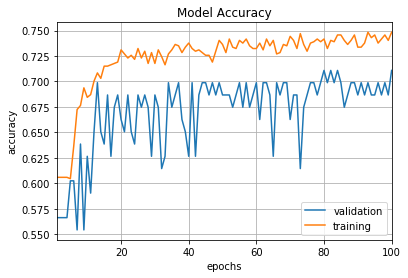

83/83 [==============================] - 0s 170us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [156654355.8554217, 0.7108433713395912]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 302267249.2996 - acc: 0.3955 - val_loss: 289156782.2651 - val_acc: 0.4217
Epoch 2/100
 - 0s - loss: 302265971.3236 - acc: 0.3955 - val_loss: 289156751.4217 - val_acc: 0.4217
Epoch 3/100
 - 0s - loss: 302265316.6232 - acc: 0.3955 - val_loss: 289156710.9398 - val_acc: 0.4217
Epoch 4/100
 - 0s - loss: 302264956.8895 - acc: 0.3955 - val_loss: 289156689.7349 - val_acc: 0.4217
Epoch 5/100
 - 0s - loss: 302264733.7204 - acc: 0.3955 - val_loss: 289156682.0241 - val_acc: 0.4217
Epoch 6/100
 - 0s - loss: 302264555.9308 - acc: 0.3955 - val_loss: 289156678.1687 - val_acc: 0.421

Epoch 79/100
 - 0s - loss: 302263694.3595 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 80/100
 - 0s - loss: 302263696.8309 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 81/100
 - 0s - loss: 302263694.4874 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 82/100
 - 0s - loss: 302263693.7204 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 83/100
 - 0s - loss: 302263693.9334 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 84/100
 - 0s - loss: 302263694.9987 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 85/100
 - 0s - loss: 302263692.0160 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 86/100
 - 0s - loss: 302263694.2743 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 87/100
 - 0s - loss: 302263691.9308 - acc: 0.3955 - val_loss: 289156670.4578 - val_acc: 0.4217
Epoch 88/100
 - 0s - loss: 302263692.9960 - acc: 0.3955 - val_loss: 289156670.4578 - val_ac

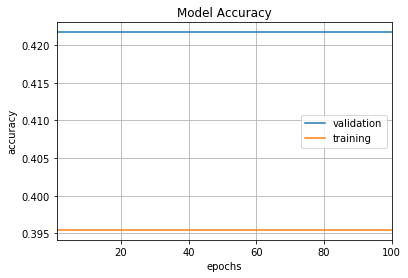

83/83 [==============================] - 0s 173us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [289156663.1325301, 0.4216867512967213]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 200237048.0995 - acc: 0.5979 - val_loss: 181748525.3012 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 199875947.1860 - acc: 0.5979 - val_loss: 181362039.9036 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 199563349.8162 - acc: 0.5979 - val_loss: 181734868.4337 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 199096730.4501 - acc: 0.5979 - val_loss: 181803053.8795 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 196143635.8562 - acc: 0.6045 - val_loss: 177464303.0361 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 197830213.6671 - acc: 0.6138 - val_loss: 302194285.8795 - val_acc: 0.361

Epoch 79/100
 - 0s - loss: 141740363.0862 - acc: 0.7164 - val_loss: 129288393.5422 - val_acc: 0.7470
Epoch 80/100
 - 0s - loss: 139661420.7020 - acc: 0.7284 - val_loss: 129266742.0723 - val_acc: 0.7470
Epoch 81/100
 - 0s - loss: 140822160.6261 - acc: 0.7177 - val_loss: 130302697.3494 - val_acc: 0.7470
Epoch 82/100
 - 0s - loss: 140918003.3040 - acc: 0.7217 - val_loss: 128653776.8675 - val_acc: 0.7349
Epoch 83/100
 - 0s - loss: 142386761.1868 - acc: 0.7137 - val_loss: 128887145.4458 - val_acc: 0.7349
Epoch 84/100
 - 0s - loss: 139217432.4871 - acc: 0.7270 - val_loss: 138890464.7711 - val_acc: 0.7349
Epoch 85/100
 - 0s - loss: 141367716.3406 - acc: 0.7177 - val_loss: 135738474.4096 - val_acc: 0.7349
Epoch 86/100
 - 0s - loss: 140306788.5366 - acc: 0.7217 - val_loss: 134889427.3735 - val_acc: 0.7349
Epoch 87/100
 - 0s - loss: 141009818.5325 - acc: 0.7164 - val_loss: 147270937.8313 - val_acc: 0.7108
Epoch 88/100
 - 0s - loss: 137722208.7419 - acc: 0.7310 - val_loss: 131758391.2289 - val_ac

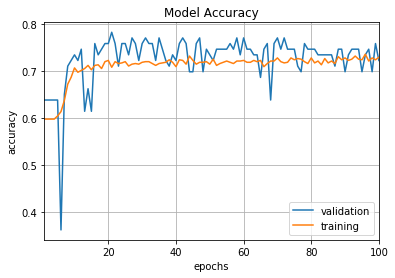

83/83 [==============================] - 0s 181us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [137932826.21686748, 0.7228915605200342]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 240784601.7410 - acc: 0.5180 - val_loss: 179904277.2048 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 200546978.0985 - acc: 0.5979 - val_loss: 179888555.7590 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 200438689.3682 - acc: 0.5979 - val_loss: 179598808.0964 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 200508355.5180 - acc: 0.5979 - val_loss: 179561691.5663 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 200195844.5646 - acc: 0.5979 - val_loss: 179498075.9518 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 200168408.5559 - acc: 0.5979 - val_loss: 179067231.4217 - val_acc: 0.6

Epoch 79/100
 - 0s - loss: 137588394.8094 - acc: 0.7324 - val_loss: 165074438.5542 - val_acc: 0.6506
Epoch 80/100
 - 0s - loss: 138467616.7989 - acc: 0.7297 - val_loss: 150881323.7590 - val_acc: 0.7108
Epoch 81/100
 - 0s - loss: 139579798.9221 - acc: 0.7284 - val_loss: 169124016.3855 - val_acc: 0.6506
Epoch 82/100
 - 0s - loss: 137578487.0442 - acc: 0.7297 - val_loss: 170931171.8554 - val_acc: 0.6506
Epoch 83/100
 - 0s - loss: 136686330.8407 - acc: 0.7377 - val_loss: 179754372.6265 - val_acc: 0.6627
Epoch 84/100
 - 0s - loss: 140380469.1451 - acc: 0.7164 - val_loss: 169913579.1807 - val_acc: 0.6506
Epoch 85/100
 - 0s - loss: 139019485.0612 - acc: 0.7337 - val_loss: 156218226.6988 - val_acc: 0.6867
Epoch 86/100
 - 0s - loss: 138279026.4999 - acc: 0.7324 - val_loss: 171342782.4578 - val_acc: 0.6506
Epoch 87/100
 - 0s - loss: 135665677.3272 - acc: 0.7377 - val_loss: 188033344.1928 - val_acc: 0.6145
Epoch 88/100
 - 0s - loss: 140355842.4214 - acc: 0.7257 - val_loss: 175324497.1566 - val_ac

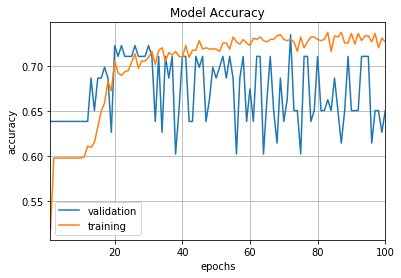

83/83 [==============================] - 0s 86us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [168290815.61445785, 0.6506024074841694]
 best Score: 0.7380952409335545          
-------------------------------------------------------------------------------------------




In [15]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_absolute_percentage_error,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [16]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7380952409335545
0.6569994249975825


[[186384388.57142857, 0.6309523752757481],
 [202402476.19047618, 0.5952380895614624],
 [132373696.38095239, 0.7380952409335545],
 [139649939.80952382, 0.7261904733521598],
 [158138256.19277108, 0.6746988016438772],
 [149101728.38554215, 0.6987951785685068],
 [156654355.8554217, 0.7108433713395912],
 [289156663.1325301, 0.4216867512967213],
 [137932826.21686748, 0.7228915605200342],
 [168290815.61445785, 0.6506024074841694]]

In [17]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6851923683752921


[0.7413333344459534,
 0.6026666742563248,
 0.7266666690508524,
 0.7240000021457672,
 0.7243675088755459,
 0.7323568615710212,
 0.748335552834639,
 0.3954727104437177,
 0.7296937411221938,
 0.7270306290069052]

# 04 # losses.mean_squared_logarithmic_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.1230 - acc: 0.5493 - val_loss: 0.1218 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.1197 - acc: 0.6133 - val_loss: 0.1215 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.1185 - acc: 0.6107 - val_loss: 0.1210 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.1170 - acc: 0.6200 - val_loss: 0.1254 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.1160 - acc: 0.6160 - val_loss: 0.1190 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.1140 - acc: 0.6320 - val_loss: 0.1189 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.1134 - acc: 0.6347 - val_loss: 0.1162 - val_acc: 0.6548
Epoch 8/100
 - 0s - loss: 0.1118 - acc: 0.6427 - val_loss: 0.1149 - val_acc: 0.6190
Epoch 9/100
 - 0s - loss: 0.1097 - acc: 0.6667 - val_loss: 0.1120 - val_acc: 0.6429
Epoch 10/100
 - 0s - loss: 0.1070 - acc: 0.6773 - val_loss: 0.1105 - val_acc: 0.6548
Epoch 11/100
 - 0s - loss: 0.1048 - acc: 0.6893 - val_loss: 0.1223 - val_acc: 0.5476
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0930 - acc: 0.7280 - val_loss: 0.1147 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.0928 - acc: 0.7280 - val_loss: 0.1111 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.0930 - acc: 0.7253 - val_loss: 0.1099 - val_acc: 0.6786
Epoch 100/100
 - 0s - loss: 0.0933 - acc: 0.7320 - val_loss: 0.1094 - val_acc: 0.6429


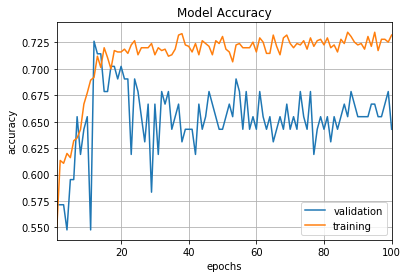

84/84 [==============================] - 0s 103us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10944927164486476, 0.6428571400188264]
 best Score: 0.6428571400188264          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.1201 - acc: 0.5800 - val_loss: 0.1152 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.1168 - acc: 0.5987 - val_loss: 0.1149 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.1162 - acc: 0.5973 - val_loss: 0.1157 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.1165 - acc: 0.6013 - val_loss: 0.1137 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.1156 - acc: 0.6013 - val_loss: 0.1159 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.1152 - acc: 0.6040 - val_loss: 0.1118 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.1132 - acc: 0.6173 - val_loss: 0.1121 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0954 - acc: 0.7187 - val_loss: 0.1030 - val_acc: 0.6905
Epoch 94/100
 - 0s - loss: 0.0949 - acc: 0.7267 - val_loss: 0.0998 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.0960 - acc: 0.7160 - val_loss: 0.0997 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.0949 - acc: 0.7160 - val_loss: 0.1024 - val_acc: 0.6905
Epoch 97/100
 - 0s - loss: 0.0943 - acc: 0.7320 - val_loss: 0.1013 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0950 - acc: 0.7160 - val_loss: 0.1006 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.0953 - acc: 0.7253 - val_loss: 0.0998 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.0949 - acc: 0.7253 - val_loss: 0.0994 - val_acc: 0.7024


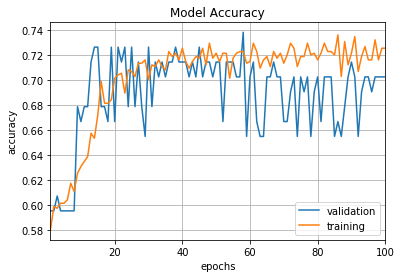

84/84 [==============================] - 0s 120us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.0994091537736711, 0.7023809523809523]
 best Score: 0.7023809523809523          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.1178 - acc: 0.5813 - val_loss: 0.1208 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.1152 - acc: 0.6080 - val_loss: 0.1182 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.1150 - acc: 0.6080 - val_loss: 0.1172 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.1142 - acc: 0.6080 - val_loss: 0.1151 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.1139 - acc: 0.6080 - val_loss: 0.1135 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.1128 - acc: 0.6107 - val_loss: 0.1115 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.1118 - acc: 0.6173 - val_loss: 0.1147 - val_acc: 0.5476
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0974 - acc: 0.7067 - val_loss: 0.0836 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.0977 - acc: 0.7133 - val_loss: 0.0781 - val_acc: 0.7619
Epoch 95/100
 - 0s - loss: 0.0976 - acc: 0.7147 - val_loss: 0.0751 - val_acc: 0.7738
Epoch 96/100
 - 0s - loss: 0.0974 - acc: 0.7093 - val_loss: 0.0815 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.0976 - acc: 0.7280 - val_loss: 0.0751 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.0974 - acc: 0.7040 - val_loss: 0.0765 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.0973 - acc: 0.7040 - val_loss: 0.0856 - val_acc: 0.7619
Epoch 100/100
 - 0s - loss: 0.0976 - acc: 0.7133 - val_loss: 0.0775 - val_acc: 0.7619


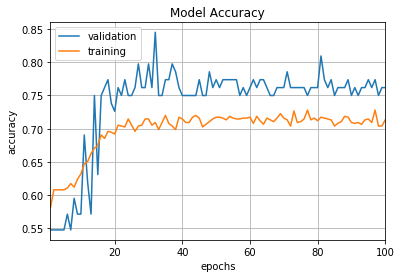

84/84 [==============================] - 0s 129us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.0775096547745523, 0.7619047647430783]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.1655 - acc: 0.5280 - val_loss: 0.1099 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.1297 - acc: 0.5707 - val_loss: 0.1085 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.1217 - acc: 0.5813 - val_loss: 0.1152 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.1221 - acc: 0.5747 - val_loss: 0.1153 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: 0.1196 - acc: 0.5827 - val_loss: 0.1073 - val_acc: 0.6310
Epoch 6/100
 - 0s - loss: 0.1168 - acc: 0.6120 - val_loss: 0.1074 - val_acc: 0.6310
Epoch 7/100
 - 0s - loss: 0.1178 - acc: 0.5893 - val_loss: 0.1077 - val_acc: 0.6429
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0933 - acc: 0.7333 - val_loss: 0.1087 - val_acc: 0.6548
Epoch 94/100
 - 0s - loss: 0.0944 - acc: 0.7147 - val_loss: 0.0978 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.0940 - acc: 0.7227 - val_loss: 0.1020 - val_acc: 0.6786
Epoch 96/100
 - 0s - loss: 0.0944 - acc: 0.7240 - val_loss: 0.0991 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.0944 - acc: 0.7173 - val_loss: 0.0977 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.0943 - acc: 0.7227 - val_loss: 0.0980 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.0944 - acc: 0.7213 - val_loss: 0.0981 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.0943 - acc: 0.7160 - val_loss: 0.1058 - val_acc: 0.6667


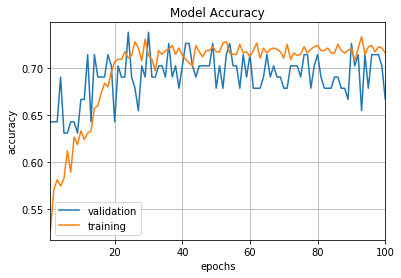

84/84 [==============================] - 0s 271us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.10578935345013936, 0.6666666723432995]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.2885 - acc: 0.3995 - val_loss: 0.2952 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.2885 - acc: 0.3995 - val_loss: 0.2952 - val_acc: 0.3855
Epoch 3/100
 - 0s - loss: 0.2885 - acc: 0.3995 - val_loss: 0.2952 - val_acc: 0.3855
Epoch 4/100
 - 0s - loss: 0.1925 - acc: 0.5100 - val_loss: 0.1690 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1478 - acc: 0.5566 - val_loss: 0.1708 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1391 - acc: 0.5379 - val_loss: 0.1634 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1223 - acc: 0.5899 - val_loss: 0.1428 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0977 - acc: 0.7150 - val_loss: 0.1031 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.0982 - acc: 0.7097 - val_loss: 0.0958 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0984 - acc: 0.7057 - val_loss: 0.1018 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.0963 - acc: 0.7137 - val_loss: 0.1001 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.0972 - acc: 0.7097 - val_loss: 0.0942 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.0971 - acc: 0.7097 - val_loss: 0.0905 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.0981 - acc: 0.6991 - val_loss: 0.0960 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0993 - acc: 0.7137 - val_loss: 0.1008 - val_acc: 0.7108


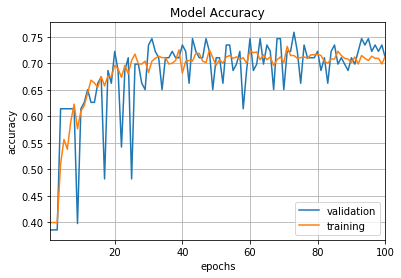

83/83 [==============================] - 0s 236us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.10083786245570125, 0.7108433713395912]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1654 - acc: 0.5353 - val_loss: 0.1416 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.1188 - acc: 0.5819 - val_loss: 0.1178 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1182 - acc: 0.5859 - val_loss: 0.1481 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 0.1168 - acc: 0.6005 - val_loss: 0.1121 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.1147 - acc: 0.6112 - val_loss: 0.1103 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1131 - acc: 0.6205 - val_loss: 0.1136 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.1112 - acc: 0.6405 - val_loss: 0.1059 - val_acc: 0.6506
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0949 - acc: 0.7137 - val_loss: 0.0983 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.0950 - acc: 0.7111 - val_loss: 0.1035 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.0951 - acc: 0.7230 - val_loss: 0.0981 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.0947 - acc: 0.7097 - val_loss: 0.1050 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.0948 - acc: 0.7190 - val_loss: 0.0988 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.0948 - acc: 0.7137 - val_loss: 0.1010 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.0952 - acc: 0.7150 - val_loss: 0.0972 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.0943 - acc: 0.7177 - val_loss: 0.0998 - val_acc: 0.7229


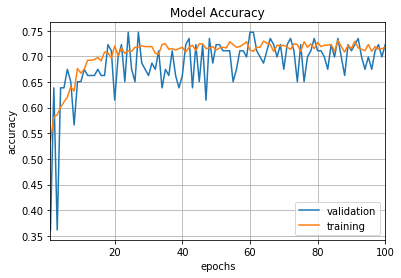

83/83 [==============================] - 0s 138us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.09980882174638381, 0.7228915691375732]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1449 - acc: 0.5393 - val_loss: 0.1219 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.1200 - acc: 0.6099 - val_loss: 0.1213 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.1190 - acc: 0.6045 - val_loss: 0.1204 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.1180 - acc: 0.6152 - val_loss: 0.1184 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.1170 - acc: 0.6165 - val_loss: 0.1207 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.1166 - acc: 0.6032 - val_loss: 0.1191 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.1154 - acc: 0.6218 - val_loss: 0.1181 - val_acc: 0.5542
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0937 - acc: 0.7190 - val_loss: 0.1179 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.0933 - acc: 0.7150 - val_loss: 0.1144 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.0937 - acc: 0.7177 - val_loss: 0.1140 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.0934 - acc: 0.7217 - val_loss: 0.1154 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.0946 - acc: 0.7190 - val_loss: 0.1196 - val_acc: 0.6265
Epoch 98/100
 - 0s - loss: 0.0934 - acc: 0.7270 - val_loss: 0.1276 - val_acc: 0.6145
Epoch 99/100
 - 0s - loss: 0.0942 - acc: 0.7164 - val_loss: 0.1206 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.0934 - acc: 0.7190 - val_loss: 0.1147 - val_acc: 0.6386


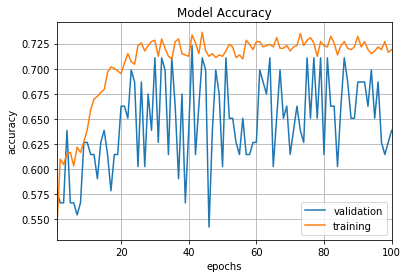

83/83 [==============================] - 0s 119us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.11474594958575375, 0.6385542147130852]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1354 - acc: 0.6059 - val_loss: 0.1228 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.1168 - acc: 0.6059 - val_loss: 0.1173 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.1153 - acc: 0.6059 - val_loss: 0.1189 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.1150 - acc: 0.6059 - val_loss: 0.1192 - val_acc: 0.5542
Epoch 5/100
 - 0s - loss: 0.1151 - acc: 0.6112 - val_loss: 0.1167 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.1145 - acc: 0.6112 - val_loss: 0.1162 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.1142 - acc: 0.6085 - val_loss: 0.1157 - val_acc: 0.5783
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0962 - acc: 0.7004 - val_loss: 0.0893 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.0960 - acc: 0.7097 - val_loss: 0.0940 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0948 - acc: 0.7177 - val_loss: 0.0896 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.0955 - acc: 0.7244 - val_loss: 0.0894 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.0955 - acc: 0.7057 - val_loss: 0.0890 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.0960 - acc: 0.7137 - val_loss: 0.0925 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.0949 - acc: 0.7164 - val_loss: 0.0984 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0955 - acc: 0.7071 - val_loss: 0.0889 - val_acc: 0.7108


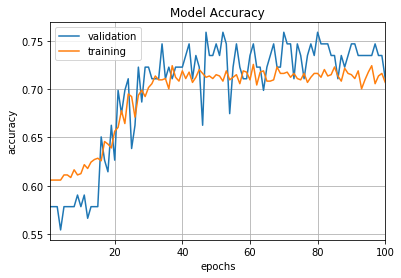

83/83 [==============================] - 0s 129us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.08894683492470937, 0.7108433799571302]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1252 - acc: 0.6165 - val_loss: 0.1809 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.1150 - acc: 0.6178 - val_loss: 0.1802 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 0.1117 - acc: 0.6298 - val_loss: 0.1059 - val_acc: 0.6627
Epoch 4/100
 - 0s - loss: 0.1093 - acc: 0.6511 - val_loss: 0.1040 - val_acc: 0.6747
Epoch 5/100
 - 0s - loss: 0.1068 - acc: 0.6525 - val_loss: 0.1081 - val_acc: 0.6627
Epoch 6/100
 - 0s - loss: 0.1072 - acc: 0.6618 - val_loss: 0.1062 - val_acc: 0.6627
Epoch 7/100
 - 0s - loss: 0.1057 - acc: 0.6671 - val_loss: 0.1012 - val_acc: 0.6627
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0970 - acc: 0.7084 - val_loss: 0.0933 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.0969 - acc: 0.7044 - val_loss: 0.1031 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.0965 - acc: 0.7137 - val_loss: 0.0915 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.0956 - acc: 0.7044 - val_loss: 0.0951 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.0964 - acc: 0.7084 - val_loss: 0.1230 - val_acc: 0.5542
Epoch 98/100
 - 0s - loss: 0.0964 - acc: 0.7111 - val_loss: 0.0929 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.0958 - acc: 0.7071 - val_loss: 0.0919 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0960 - acc: 0.7111 - val_loss: 0.1044 - val_acc: 0.6627


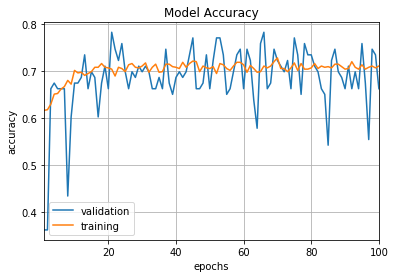

83/83 [==============================] - 0s 148us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.10437595368508833, 0.6626506052821516]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.1630 - acc: 0.5220 - val_loss: 0.1342 - val_acc: 0.3253
Epoch 2/100
 - 0s - loss: 0.1209 - acc: 0.5819 - val_loss: 0.1142 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.1179 - acc: 0.5925 - val_loss: 0.1184 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.1164 - acc: 0.5965 - val_loss: 0.1212 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1148 - acc: 0.6125 - val_loss: 0.1087 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1147 - acc: 0.6032 - val_loss: 0.1084 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.1134 - acc: 0.6085 - val_loss: 0.1102 - val_acc: 0.6747
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0939 - acc: 0.7097 - val_loss: 0.1101 - val_acc: 0.6386
Epoch 94/100
 - 0s - loss: 0.0930 - acc: 0.7310 - val_loss: 0.1008 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.0942 - acc: 0.7190 - val_loss: 0.1058 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.0932 - acc: 0.7324 - val_loss: 0.1019 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.0937 - acc: 0.7217 - val_loss: 0.1024 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.0936 - acc: 0.7284 - val_loss: 0.1009 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.0944 - acc: 0.7177 - val_loss: 0.1113 - val_acc: 0.6386
Epoch 100/100
 - 0s - loss: 0.0940 - acc: 0.7297 - val_loss: 0.1045 - val_acc: 0.6747


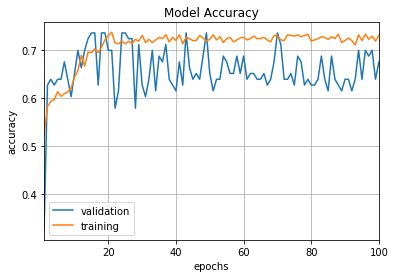

83/83 [==============================] - 0s 243us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.10446223841015115, 0.6746987980532358]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------




In [18]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_logarithmic_error,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047647430783
0.6894291467968924


[[0.10944927164486476, 0.6428571400188264],
 [0.0994091537736711, 0.7023809523809523],
 [0.0775096547745523, 0.7619047647430783],
 [0.10578935345013936, 0.6666666723432995],
 [0.10083786245570125, 0.7108433713395912],
 [0.09980882174638381, 0.7228915691375732],
 [0.11474594958575375, 0.6385542147130852],
 [0.08894683492470937, 0.7108433799571302],
 [0.10437595368508833, 0.6626506052821516],
 [0.10446223841015115, 0.6746987980532358]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7184935648314856


[0.7319999992847442,
 0.7253333361943562,
 0.7133333345254262,
 0.7159999990463257,
 0.7137150493030066,
 0.7177097204522033,
 0.7190412783749729,
 0.7070572577843495,
 0.7110519320288606,
 0.7296937413206113]

# 05 #losses.squared_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.6161 - acc: 0.6067 - val_loss: 0.6296 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.6159 - acc: 0.6080 - val_loss: 0.6217 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.6163 - acc: 0.6067 - val_loss: 0.6229 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.6149 - acc: 0.6067 - val_loss: 0.6203 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.6154 - acc: 0.6107 - val_loss: 0.6228 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.6149 - acc: 0.6067 - val_loss: 0.6196 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.6142 - acc: 0.6093 - val_loss: 0.6191 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.6137 - acc: 0.6120 - val_loss: 0.6187 - val_acc: 0.5833
Epoch 9/100
 - 0s - loss: 0.6128 - acc: 0.6240 - val_loss: 0.6193 - val_acc: 0.5595
Epoch 10/100
 - 0s - loss: 0.6119 - acc: 0.6240 - val_loss: 0.6175 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.6113 - acc: 0.6267 - val_loss: 0.6169 - val_acc: 0.6071
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5952 - acc: 0.7120 - val_loss: 0.6113 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.5957 - acc: 0.7093 - val_loss: 0.6124 - val_acc: 0.6786
Epoch 99/100
 - 0s - loss: 0.5941 - acc: 0.7227 - val_loss: 0.6109 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.5944 - acc: 0.7280 - val_loss: 0.6168 - val_acc: 0.6310


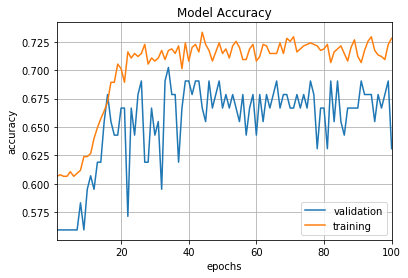

84/84 [==============================] - 0s 181us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6167995276905242, 0.6309523781140646]
 best Score: 0.6309523781140646          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.6355 - acc: 0.5867 - val_loss: 0.6159 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.6174 - acc: 0.5973 - val_loss: 0.6111 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.6154 - acc: 0.6160 - val_loss: 0.6104 - val_acc: 0.6310
Epoch 4/100
 - 0s - loss: 0.6129 - acc: 0.6293 - val_loss: 0.6081 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6087 - acc: 0.6560 - val_loss: 0.6155 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.6093 - acc: 0.6573 - val_loss: 0.6054 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.6084 - acc: 0.6560 - val_loss: 0.6041 - val_acc: 0.6786
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5965 - acc: 0.7227 - val_loss: 0.5992 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5966 - acc: 0.7360 - val_loss: 0.6039 - val_acc: 0.6667
Epoch 95/100
 - 0s - loss: 0.5967 - acc: 0.7133 - val_loss: 0.5992 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5964 - acc: 0.7227 - val_loss: 0.6013 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.5971 - acc: 0.7067 - val_loss: 0.6002 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.5961 - acc: 0.7080 - val_loss: 0.6001 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.5966 - acc: 0.7120 - val_loss: 0.5994 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5957 - acc: 0.7160 - val_loss: 0.6034 - val_acc: 0.6667


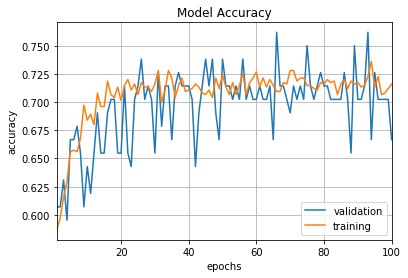

84/84 [==============================] - 0s 138us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6034442612103054, 0.6666666666666666]
 best Score: 0.6666666666666666          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.6264 - acc: 0.5640 - val_loss: 0.6245 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.6195 - acc: 0.6080 - val_loss: 0.6235 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.6174 - acc: 0.6120 - val_loss: 0.6187 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.6167 - acc: 0.6160 - val_loss: 0.6119 - val_acc: 0.6548
Epoch 5/100
 - 0s - loss: 0.6144 - acc: 0.6267 - val_loss: 0.6161 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.6126 - acc: 0.6440 - val_loss: 0.6049 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.6110 - acc: 0.6493 - val_loss: 0.6053 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5988 - acc: 0.7147 - val_loss: 0.5824 - val_acc: 0.7857
Epoch 94/100
 - 0s - loss: 0.5984 - acc: 0.7240 - val_loss: 0.5788 - val_acc: 0.7738
Epoch 95/100
 - 0s - loss: 0.5983 - acc: 0.7173 - val_loss: 0.5757 - val_acc: 0.7976
Epoch 96/100
 - 0s - loss: 0.5994 - acc: 0.7067 - val_loss: 0.5782 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.5991 - acc: 0.7187 - val_loss: 0.5838 - val_acc: 0.7857
Epoch 98/100
 - 0s - loss: 0.5986 - acc: 0.7120 - val_loss: 0.5827 - val_acc: 0.7857
Epoch 99/100
 - 0s - loss: 0.5985 - acc: 0.7280 - val_loss: 0.5855 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5980 - acc: 0.7293 - val_loss: 0.5903 - val_acc: 0.7262


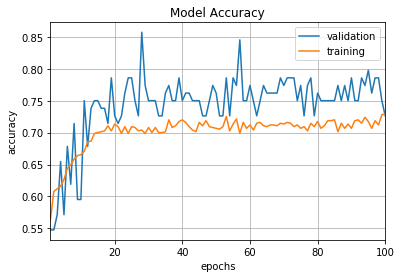

84/84 [==============================] - 0s 114us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.590314717519851, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.6263 - acc: 0.5773 - val_loss: 0.6073 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.6160 - acc: 0.6173 - val_loss: 0.6063 - val_acc: 0.6548
Epoch 3/100
 - 0s - loss: 0.6154 - acc: 0.6067 - val_loss: 0.6044 - val_acc: 0.6548
Epoch 4/100
 - 0s - loss: 0.6125 - acc: 0.6347 - val_loss: 0.6050 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.6112 - acc: 0.6400 - val_loss: 0.6005 - val_acc: 0.6548
Epoch 6/100
 - 0s - loss: 0.6111 - acc: 0.6413 - val_loss: 0.6018 - val_acc: 0.7262
Epoch 7/100
 - 0s - loss: 0.6083 - acc: 0.6467 - val_loss: 0.5981 - val_acc: 0.7381
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5972 - acc: 0.7213 - val_loss: 0.5980 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.5974 - acc: 0.7067 - val_loss: 0.5975 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.5964 - acc: 0.7160 - val_loss: 0.6029 - val_acc: 0.6786
Epoch 96/100
 - 0s - loss: 0.5975 - acc: 0.7200 - val_loss: 0.6026 - val_acc: 0.6667
Epoch 97/100
 - 0s - loss: 0.5959 - acc: 0.7227 - val_loss: 0.6203 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.5995 - acc: 0.7120 - val_loss: 0.5982 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.5974 - acc: 0.7067 - val_loss: 0.6028 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.5965 - acc: 0.7133 - val_loss: 0.5957 - val_acc: 0.7262


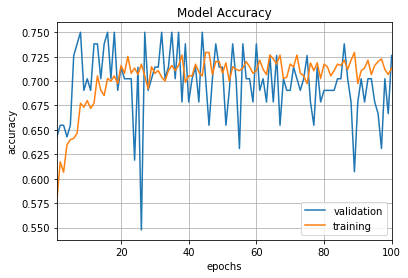

84/84 [==============================] - 0s 181us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5956947973796299, 0.7261904761904762]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6442 - acc: 0.5806 - val_loss: 0.6199 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6187 - acc: 0.5952 - val_loss: 0.6158 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6187 - acc: 0.6072 - val_loss: 0.6241 - val_acc: 0.4699
Epoch 4/100
 - 0s - loss: 0.6179 - acc: 0.6005 - val_loss: 0.6221 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6182 - acc: 0.6125 - val_loss: 0.6142 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6161 - acc: 0.6165 - val_loss: 0.6171 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6162 - acc: 0.6125 - val_loss: 0.6122 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5971 - acc: 0.7190 - val_loss: 0.5946 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5967 - acc: 0.7257 - val_loss: 0.5950 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5966 - acc: 0.7204 - val_loss: 0.5952 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.5966 - acc: 0.7071 - val_loss: 0.5975 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5972 - acc: 0.7150 - val_loss: 0.5968 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5966 - acc: 0.7270 - val_loss: 0.5946 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7257 - val_loss: 0.5986 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5966 - acc: 0.7150 - val_loss: 0.5957 - val_acc: 0.7349


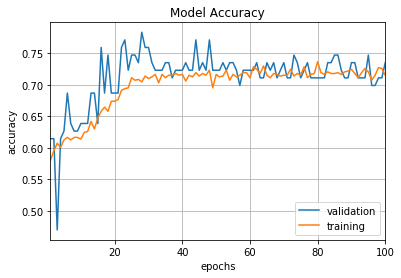

83/83 [==============================] - 0s 196us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5957405344549432, 0.7349397654992988]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6196 - acc: 0.5752 - val_loss: 0.6121 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6163 - acc: 0.6045 - val_loss: 0.6126 - val_acc: 0.6627
Epoch 3/100
 - 0s - loss: 0.6152 - acc: 0.6125 - val_loss: 0.6102 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.6132 - acc: 0.6152 - val_loss: 0.6107 - val_acc: 0.7108
Epoch 5/100
 - 0s - loss: 0.6123 - acc: 0.6272 - val_loss: 0.6084 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6106 - acc: 0.6431 - val_loss: 0.6071 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6096 - acc: 0.6644 - val_loss: 0.6072 - val_acc: 0.7108
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5954 - acc: 0.7164 - val_loss: 0.5969 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5958 - acc: 0.7164 - val_loss: 0.5994 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5958 - acc: 0.7177 - val_loss: 0.5975 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5961 - acc: 0.7150 - val_loss: 0.5965 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5966 - acc: 0.7084 - val_loss: 0.5967 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5963 - acc: 0.7177 - val_loss: 0.5969 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7190 - val_loss: 0.5983 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5963 - acc: 0.7230 - val_loss: 0.6002 - val_acc: 0.6988


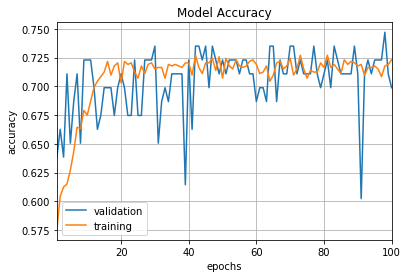

83/83 [==============================] - 0s 215us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.600206069917564, 0.6987951785685068]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6939 - acc: 0.4021 - val_loss: 0.6251 - val_acc: 0.5181
Epoch 2/100
 - 0s - loss: 0.6205 - acc: 0.5952 - val_loss: 0.6233 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.6193 - acc: 0.6059 - val_loss: 0.6234 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.6187 - acc: 0.6099 - val_loss: 0.6254 - val_acc: 0.5181
Epoch 5/100
 - 0s - loss: 0.6190 - acc: 0.6125 - val_loss: 0.6232 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.6179 - acc: 0.6165 - val_loss: 0.6244 - val_acc: 0.5422
Epoch 7/100
 - 0s - loss: 0.6174 - acc: 0.6165 - val_loss: 0.6235 - val_acc: 0.5181
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5943 - acc: 0.7244 - val_loss: 0.6257 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.5944 - acc: 0.7164 - val_loss: 0.6167 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5946 - acc: 0.7150 - val_loss: 0.6226 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5946 - acc: 0.7137 - val_loss: 0.6191 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.5934 - acc: 0.7244 - val_loss: 0.6194 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5946 - acc: 0.7190 - val_loss: 0.6165 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.5933 - acc: 0.7284 - val_loss: 0.6172 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.5943 - acc: 0.7124 - val_loss: 0.6296 - val_acc: 0.5904


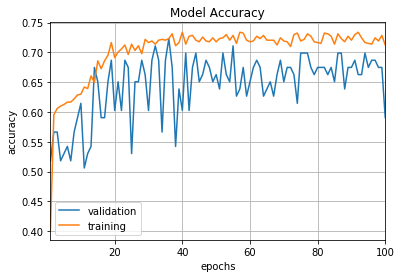

83/83 [==============================] - 0s 130us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6296072587909469, 0.5903614486556455]
 best Score: 0.7349397654992988          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6265 - acc: 0.5699 - val_loss: 0.6625 - val_acc: 0.4217
Epoch 2/100
 - 0s - loss: 0.6235 - acc: 0.5832 - val_loss: 0.6470 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.6214 - acc: 0.5979 - val_loss: 0.6265 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6197 - acc: 0.5939 - val_loss: 0.6499 - val_acc: 0.4096
Epoch 5/100
 - 0s - loss: 0.6185 - acc: 0.6099 - val_loss: 0.6387 - val_acc: 0.4096
Epoch 6/100
 - 0s - loss: 0.6186 - acc: 0.5992 - val_loss: 0.6474 - val_acc: 0.4096
Epoch 7/100
 - 0s - loss: 0.6163 - acc: 0.6045 - val_loss: 0.6349 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5987 - acc: 0.7097 - val_loss: 0.6005 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5998 - acc: 0.7111 - val_loss: 0.5958 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5993 - acc: 0.7164 - val_loss: 0.5997 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.5979 - acc: 0.7177 - val_loss: 0.6013 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.5994 - acc: 0.7057 - val_loss: 0.5930 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5971 - acc: 0.7190 - val_loss: 0.5995 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.5981 - acc: 0.7111 - val_loss: 0.5973 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5994 - acc: 0.7217 - val_loss: 0.5932 - val_acc: 0.7470


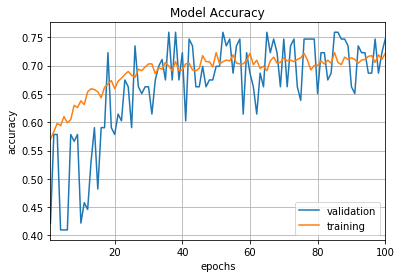

83/83 [==============================] - 0s 157us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5932191208184484, 0.7469879582703832]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6202 - acc: 0.5979 - val_loss: 0.6142 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6179 - acc: 0.5979 - val_loss: 0.6147 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.6177 - acc: 0.5979 - val_loss: 0.6140 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.6177 - acc: 0.5979 - val_loss: 0.6142 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.6176 - acc: 0.5979 - val_loss: 0.6155 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.6177 - acc: 0.5979 - val_loss: 0.6153 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6172 - acc: 0.5992 - val_loss: 0.6141 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5983 - acc: 0.7150 - val_loss: 0.5911 - val_acc: 0.7831
Epoch 94/100
 - 0s - loss: 0.5976 - acc: 0.7124 - val_loss: 0.5910 - val_acc: 0.7831
Epoch 95/100
 - 0s - loss: 0.5983 - acc: 0.7217 - val_loss: 0.5922 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.5978 - acc: 0.7097 - val_loss: 0.5910 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.5978 - acc: 0.7137 - val_loss: 0.5946 - val_acc: 0.7590
Epoch 98/100
 - 0s - loss: 0.5973 - acc: 0.7124 - val_loss: 0.5972 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.5985 - acc: 0.7190 - val_loss: 0.5932 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.5974 - acc: 0.7124 - val_loss: 0.5908 - val_acc: 0.7831


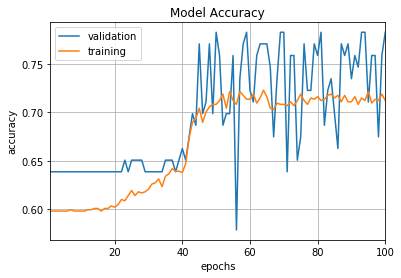

83/83 [==============================] - 0s 274us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5908457371125738, 0.7831325329929949]
 best Score: 0.7831325329929949          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6239 - acc: 0.5965 - val_loss: 0.6181 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6183 - acc: 0.6032 - val_loss: 0.6118 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.6157 - acc: 0.6099 - val_loss: 0.6244 - val_acc: 0.4940
Epoch 4/100
 - 0s - loss: 0.6126 - acc: 0.6418 - val_loss: 0.6115 - val_acc: 0.6627
Epoch 5/100
 - 0s - loss: 0.6111 - acc: 0.6498 - val_loss: 0.6079 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.6103 - acc: 0.6618 - val_loss: 0.6095 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.6088 - acc: 0.6525 - val_loss: 0.6082 - val_acc: 0.6867
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5960 - acc: 0.7217 - val_loss: 0.6126 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.5964 - acc: 0.7217 - val_loss: 0.6046 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.5964 - acc: 0.7270 - val_loss: 0.6098 - val_acc: 0.6265
Epoch 96/100
 - 0s - loss: 0.5968 - acc: 0.7137 - val_loss: 0.6034 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.5954 - acc: 0.7204 - val_loss: 0.6043 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5958 - acc: 0.7217 - val_loss: 0.6070 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.5966 - acc: 0.7284 - val_loss: 0.6040 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.5966 - acc: 0.7230 - val_loss: 0.6031 - val_acc: 0.7349


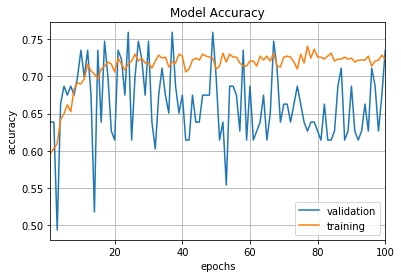

83/83 [==============================] - 0s 254us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6030562110694058, 0.7349397654992988]
 best Score: 0.7831325329929949          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.squared_hinge,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7831325329929949
0.7039156649486127


[[0.6167995276905242, 0.6309523781140646],
 [0.6034442612103054, 0.6666666666666666],
 [0.590314717519851, 0.7261904790287926],
 [0.5956947973796299, 0.7261904761904762],
 [0.5957405344549432, 0.7349397654992988],
 [0.600206069917564, 0.6987951785685068],
 [0.6296072587909469, 0.5903614486556455],
 [0.5932191208184484, 0.7469879582703832],
 [0.5908457371125738, 0.7831325329929949],
 [0.6030562110694058, 0.7349397654992988]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7194256552341933


[0.7279999979337056,
 0.7160000022252401,
 0.729333332379659,
 0.7133333337306976,
 0.7150466055590684,
 0.7230359507146752,
 0.7123834872928345,
 0.7217043971570926,
 0.712383489554795,
 0.7230359557941655]

# 06 #losses.hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.6964 - acc: 0.6067 - val_loss: 0.7194 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7195 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7194 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7193 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7193 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7194 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7192 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7193 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.6963 - acc: 0.6067 - val_loss: 0.7192 - val_acc: 0.5595
Epoch 10/100
 - 0s - loss: 0.6962 - acc: 0.6067 - val_loss: 0.7192 - val_acc: 0.5595
Epoch 11/100
 - 0s - loss: 0.6962 - acc: 0.6067 - val_loss: 0.7192 - val_acc: 0.5595
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.6475 - acc: 0.7067 - val_loss: 0.6649 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.6420 - acc: 0.7187 - val_loss: 0.6628 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.6429 - acc: 0.7200 - val_loss: 0.6583 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.6378 - acc: 0.7320 - val_loss: 0.6546 - val_acc: 0.7024


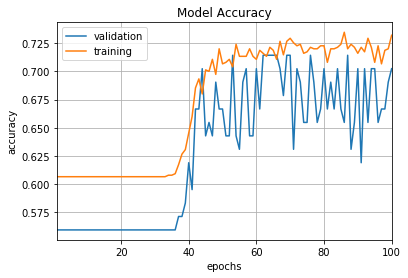

84/84 [==============================] - 0s 210us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6546288870629811, 0.7023809523809523]
 best Score: 0.7023809523809523          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.7245 - acc: 0.5493 - val_loss: 0.7016 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6984 - acc: 0.6027 - val_loss: 0.7016 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6984 - acc: 0.6027 - val_loss: 0.7017 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6983 - acc: 0.6027 - val_loss: 0.7017 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6983 - acc: 0.6027 - val_loss: 0.7014 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6983 - acc: 0.6027 - val_loss: 0.7014 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6982 - acc: 0.6027 - val_loss: 0.7014 - val_acc: 0.5952
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6364 - acc: 0.7347 - val_loss: 0.6569 - val_acc: 0.6786
Epoch 94/100
 - 0s - loss: 0.6376 - acc: 0.7347 - val_loss: 0.6717 - val_acc: 0.6548
Epoch 95/100
 - 0s - loss: 0.6401 - acc: 0.7200 - val_loss: 0.6464 - val_acc: 0.6905
Epoch 96/100
 - 0s - loss: 0.6385 - acc: 0.7280 - val_loss: 0.6471 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.6375 - acc: 0.7253 - val_loss: 0.6450 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.6376 - acc: 0.7267 - val_loss: 0.6445 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.6382 - acc: 0.7253 - val_loss: 0.6450 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.6380 - acc: 0.7320 - val_loss: 0.6448 - val_acc: 0.7024


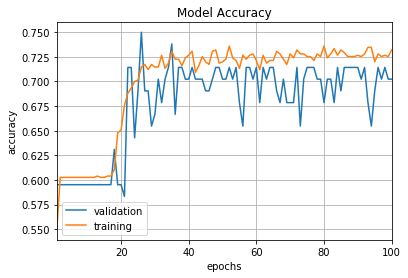

84/84 [==============================] - 0s 150us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6448315438770112, 0.7023809523809523]
 best Score: 0.7023809523809523          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.7489 - acc: 0.6080 - val_loss: 0.7490 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.7465 - acc: 0.6080 - val_loss: 0.7478 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.7441 - acc: 0.6080 - val_loss: 0.7467 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.7416 - acc: 0.6080 - val_loss: 0.7457 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.7391 - acc: 0.6080 - val_loss: 0.7444 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.7366 - acc: 0.6080 - val_loss: 0.7428 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.7341 - acc: 0.6080 - val_loss: 0.7418 - val_acc: 0.5476
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6397 - acc: 0.7240 - val_loss: 0.6292 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.6402 - acc: 0.7267 - val_loss: 0.6382 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.6399 - acc: 0.7240 - val_loss: 0.6261 - val_acc: 0.7619
Epoch 96/100
 - 0s - loss: 0.6396 - acc: 0.7320 - val_loss: 0.6262 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.6394 - acc: 0.7240 - val_loss: 0.6384 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.6400 - acc: 0.7293 - val_loss: 0.6219 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.6417 - acc: 0.7227 - val_loss: 0.6215 - val_acc: 0.7738
Epoch 100/100
 - 0s - loss: 0.6396 - acc: 0.7253 - val_loss: 0.6200 - val_acc: 0.7500


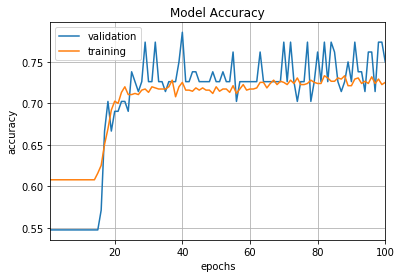

84/84 [==============================] - 0s 265us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6199533031100318, 0.7500000056766328]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.7020 - acc: 0.5973 - val_loss: 0.6794 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.6998 - acc: 0.5973 - val_loss: 0.6794 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.6993 - acc: 0.5973 - val_loss: 0.6782 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.6987 - acc: 0.5973 - val_loss: 0.6776 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.6972 - acc: 0.5973 - val_loss: 0.6813 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 0.6961 - acc: 0.5987 - val_loss: 0.6747 - val_acc: 0.6429
Epoch 7/100
 - 0s - loss: 0.6936 - acc: 0.6093 - val_loss: 0.6746 - val_acc: 0.7024
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.6385 - acc: 0.7280 - val_loss: 0.6430 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.6339 - acc: 0.7373 - val_loss: 0.6537 - val_acc: 0.6905
Epoch 95/100
 - 0s - loss: 0.6375 - acc: 0.7280 - val_loss: 0.6497 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.6350 - acc: 0.7347 - val_loss: 0.6440 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.6361 - acc: 0.7373 - val_loss: 0.6554 - val_acc: 0.6905
Epoch 98/100
 - 0s - loss: 0.6348 - acc: 0.7373 - val_loss: 0.6518 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.6366 - acc: 0.7280 - val_loss: 0.6439 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.6365 - acc: 0.7320 - val_loss: 0.6577 - val_acc: 0.6905


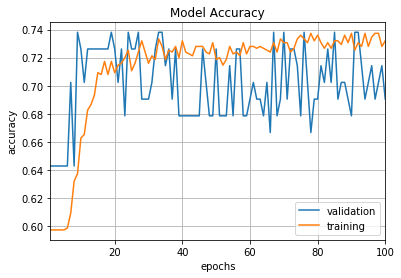

84/84 [==============================] - 0s 241us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6576524490401858, 0.6904761961528233]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.7316 - acc: 0.5499 - val_loss: 0.6924 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.7004 - acc: 0.6005 - val_loss: 0.6907 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6996 - acc: 0.6005 - val_loss: 0.6910 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6995 - acc: 0.6005 - val_loss: 0.6909 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6994 - acc: 0.6005 - val_loss: 0.6911 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6994 - acc: 0.6005 - val_loss: 0.6907 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6994 - acc: 0.6005 - val_loss: 0.6908 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6382 - acc: 0.7337 - val_loss: 0.6499 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.6390 - acc: 0.7257 - val_loss: 0.6516 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.6380 - acc: 0.7324 - val_loss: 0.6499 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.6387 - acc: 0.7297 - val_loss: 0.6487 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.6384 - acc: 0.7284 - val_loss: 0.6488 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.6380 - acc: 0.7297 - val_loss: 0.6509 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.6382 - acc: 0.7270 - val_loss: 0.6462 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.6391 - acc: 0.7297 - val_loss: 0.6470 - val_acc: 0.7108


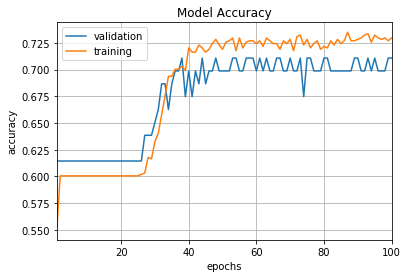

83/83 [==============================] - 0s 215us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6469797965991928, 0.7108433799571302]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 5/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 6/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 7/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 94/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 95/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 96/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 97/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 98/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 99/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 100/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614


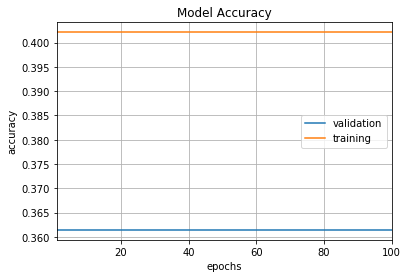

83/83 [==============================] - 0s 208us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.8192771141787609, 0.36144578528691484]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.6966 - acc: 0.6059 - val_loss: 0.7169 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.6965 - acc: 0.6059 - val_loss: 0.7169 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.6964 - acc: 0.6059 - val_loss: 0.7170 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.6963 - acc: 0.6059 - val_loss: 0.7169 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.6963 - acc: 0.6059 - val_loss: 0.7171 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.6962 - acc: 0.6059 - val_loss: 0.7171 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.6960 - acc: 0.6059 - val_loss: 0.7171 - val_acc: 0.5663
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.6386 - acc: 0.7310 - val_loss: 0.6565 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.6386 - acc: 0.7297 - val_loss: 0.6646 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.6382 - acc: 0.7337 - val_loss: 0.6673 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.6386 - acc: 0.7284 - val_loss: 0.6650 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.6393 - acc: 0.7310 - val_loss: 0.6607 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.6380 - acc: 0.7270 - val_loss: 0.6696 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.6359 - acc: 0.7337 - val_loss: 0.6705 - val_acc: 0.6506
Epoch 100/100
 - 0s - loss: 0.6392 - acc: 0.7350 - val_loss: 0.6605 - val_acc: 0.6747


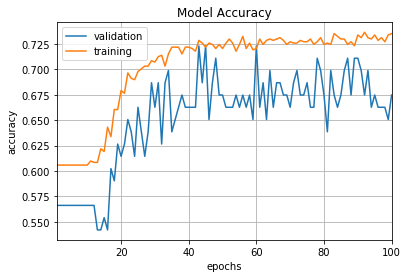

83/83 [==============================] - 0s 152us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.660486632800964, 0.6746987930263382]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.7146 - acc: 0.5686 - val_loss: 0.7073 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.6966 - acc: 0.6045 - val_loss: 0.7079 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.6961 - acc: 0.6045 - val_loss: 0.7067 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6957 - acc: 0.6045 - val_loss: 0.7056 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.6950 - acc: 0.6045 - val_loss: 0.7006 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.6942 - acc: 0.6059 - val_loss: 0.7031 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.6922 - acc: 0.6059 - val_loss: 0.6927 - val_acc: 0.6506
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6443 - acc: 0.7097 - val_loss: 0.6191 - val_acc: 0.7831
Epoch 94/100
 - 0s - loss: 0.6414 - acc: 0.7204 - val_loss: 0.6213 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.6415 - acc: 0.7204 - val_loss: 0.6362 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.6404 - acc: 0.7284 - val_loss: 0.6187 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.6385 - acc: 0.7257 - val_loss: 0.6529 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.6428 - acc: 0.7111 - val_loss: 0.6235 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.6406 - acc: 0.7257 - val_loss: 0.6181 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.6403 - acc: 0.7217 - val_loss: 0.6196 - val_acc: 0.7590


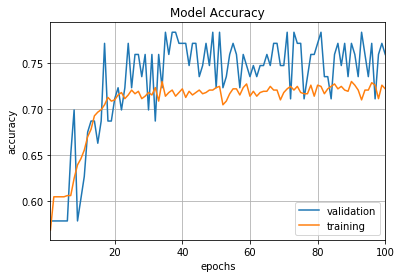

83/83 [==============================] - 0s 276us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6196361593453281, 0.7590361510414675]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.7352 - acc: 0.5366 - val_loss: 0.6911 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.7021 - acc: 0.5979 - val_loss: 0.6837 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.7008 - acc: 0.5979 - val_loss: 0.6824 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.7006 - acc: 0.5979 - val_loss: 0.6821 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.7005 - acc: 0.5979 - val_loss: 0.6822 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.7005 - acc: 0.5979 - val_loss: 0.6826 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.7005 - acc: 0.5979 - val_loss: 0.6828 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6434 - acc: 0.7124 - val_loss: 0.6125 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.6428 - acc: 0.7177 - val_loss: 0.6126 - val_acc: 0.7711
Epoch 95/100
 - 0s - loss: 0.6427 - acc: 0.7150 - val_loss: 0.6130 - val_acc: 0.7831
Epoch 96/100
 - 0s - loss: 0.6420 - acc: 0.7190 - val_loss: 0.6133 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.6414 - acc: 0.7217 - val_loss: 0.6191 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.6446 - acc: 0.7071 - val_loss: 0.6142 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.6419 - acc: 0.7137 - val_loss: 0.6137 - val_acc: 0.7831
Epoch 100/100
 - 0s - loss: 0.6451 - acc: 0.7097 - val_loss: 0.6140 - val_acc: 0.7590


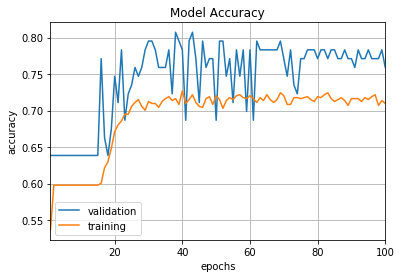

83/83 [==============================] - 0s 320us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6140225702021496, 0.7590361474508263]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.7993 - acc: 0.4021 - val_loss: 0.8196 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.7991 - acc: 0.4021 - val_loss: 0.8194 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 0.7990 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 0.7990 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 5/100
 - 0s - loss: 0.7990 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 6/100
 - 0s - loss: 0.7990 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 7/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 94/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 95/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 96/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 97/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 98/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 99/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614
Epoch 100/100
 - 0s - loss: 0.7989 - acc: 0.4021 - val_loss: 0.8193 - val_acc: 0.3614


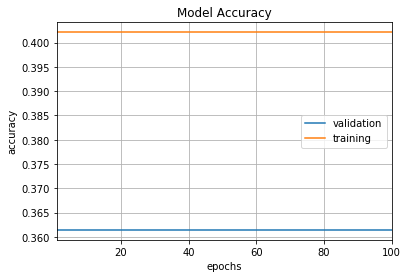

83/83 [==============================] - 0s 168us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.8192771141787609, 0.36144578528691484]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.hinge,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361510414675
0.6471744148640953


[[0.6546288870629811, 0.7023809523809523],
 [0.6448315438770112, 0.7023809523809523],
 [0.6199533031100318, 0.7500000056766328],
 [0.6576524490401858, 0.6904761961528233],
 [0.6469797965991928, 0.7108433799571302],
 [0.8192771141787609, 0.36144578528691484],
 [0.660486632800964, 0.6746987930263382],
 [0.6196361593453281, 0.7590361510414675],
 [0.6140225702021496, 0.7590361474508263],
 [0.8192771141787609, 0.36144578528691484]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6621732817895403


[0.7320000016689301,
 0.7320000008742015,
 0.7253333340088527,
 0.7319999984900156,
 0.7296937431063697,
 0.40213049956152186,
 0.7350199740831449,
 0.7217043924744374,
 0.709720376249001,
 0.40213049737892836]

# 07 #losses.categorical_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 9s - loss: 0.8361 - acc: 0.6067 - val_loss: 0.8752 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.7853 - acc: 0.6067 - val_loss: 0.8765 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.7852 - acc: 0.6067 - val_loss: 0.8760 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.7850 - acc: 0.6067 - val_loss: 0.8761 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.7846 - acc: 0.6067 - val_loss: 0.8758 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.7839 - acc: 0.6067 - val_loss: 0.8757 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.7836 - acc: 0.6067 - val_loss: 0.8726 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.7825 - acc: 0.6067 - val_loss: 0.8684 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.7802 - acc: 0.6067 - val_loss: 0.8640 - val_acc: 0.5595
Epoch 10/100
 - 0s - loss: 0.7749 - acc: 0.6067 - val_loss: 0.8421 - val_acc: 0.5595
Epoch 11/100
 - 0s - loss: 0.7702 - acc: 0.6093 - val_loss: 0.8256 - val_acc: 0.5595
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5411 - acc: 0.7360 - val_loss: 0.6542 - val_acc: 0.6786
Epoch 98/100
 - 0s - loss: 0.5484 - acc: 0.7360 - val_loss: 0.6366 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.5428 - acc: 0.7373 - val_loss: 0.6389 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.5521 - acc: 0.7333 - val_loss: 0.6488 - val_acc: 0.6905


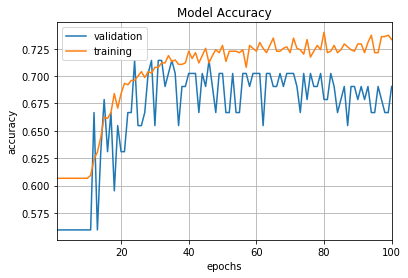

84/84 [==============================] - 0s 233us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6487962234587896, 0.6904761904761905]
 best Score: 0.6904761904761905          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 0.7936 - acc: 0.6027 - val_loss: 0.8060 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.7910 - acc: 0.6027 - val_loss: 0.8034 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.7858 - acc: 0.6027 - val_loss: 0.7990 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.7830 - acc: 0.6027 - val_loss: 0.7928 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.7702 - acc: 0.6027 - val_loss: 0.7731 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.7416 - acc: 0.6280 - val_loss: 0.7822 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.7299 - acc: 0.6520 - val_loss: 0.7484 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5510 - acc: 0.7280 - val_loss: 0.6101 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.5470 - acc: 0.7347 - val_loss: 0.5943 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.5545 - acc: 0.7200 - val_loss: 0.5977 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.5352 - acc: 0.7387 - val_loss: 0.5910 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.5448 - acc: 0.7320 - val_loss: 0.6064 - val_acc: 0.7024
Epoch 98/100
 - 1s - loss: 0.5494 - acc: 0.7240 - val_loss: 0.5981 - val_acc: 0.7024
Epoch 99/100
 - 1s - loss: 0.5398 - acc: 0.7333 - val_loss: 0.6236 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5551 - acc: 0.7280 - val_loss: 0.6044 - val_acc: 0.7024


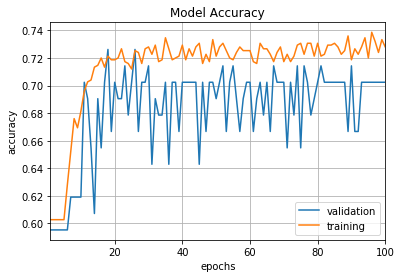

84/84 [==============================] - 0s 176us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6044167336963472, 0.7023809523809523]
 best Score: 0.7023809523809523          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 1.0799 - acc: 0.3920 - val_loss: 1.0026 - val_acc: 0.4286
Epoch 2/100
 - 1s - loss: 0.9841 - acc: 0.5907 - val_loss: 0.9866 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.9673 - acc: 0.6080 - val_loss: 0.9786 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.9534 - acc: 0.6080 - val_loss: 0.9759 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.9415 - acc: 0.6080 - val_loss: 0.9671 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.9287 - acc: 0.6080 - val_loss: 0.9570 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.9184 - acc: 0.6080 - val_loss: 0.9496 - val_acc: 0.5476
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5675 - acc: 0.7187 - val_loss: 0.4773 - val_acc: 0.7857
Epoch 94/100
 - 1s - loss: 0.5698 - acc: 0.7240 - val_loss: 0.4717 - val_acc: 0.7619
Epoch 95/100
 - 0s - loss: 0.5647 - acc: 0.7227 - val_loss: 0.5386 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5636 - acc: 0.7253 - val_loss: 0.4851 - val_acc: 0.7738
Epoch 97/100
 - 0s - loss: 0.5626 - acc: 0.7267 - val_loss: 0.4746 - val_acc: 0.7857
Epoch 98/100
 - 0s - loss: 0.5666 - acc: 0.7187 - val_loss: 0.4692 - val_acc: 0.7619
Epoch 99/100
 - 0s - loss: 0.5614 - acc: 0.7240 - val_loss: 0.4954 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5707 - acc: 0.7200 - val_loss: 0.5388 - val_acc: 0.7262


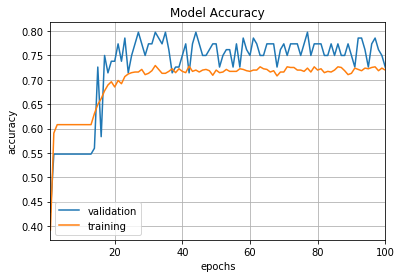

84/84 [==============================] - 0s 200us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5387508982703799, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 9s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 2/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 3/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 4/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 5/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 6/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 7/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 8/1

Epoch 93/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 94/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 95/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 96/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 97/100
 - 1s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 98/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 99/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571
Epoch 100/100
 - 0s - loss: 1.1947 - acc: 0.4027 - val_loss: 1.2857 - val_acc: 0.3571


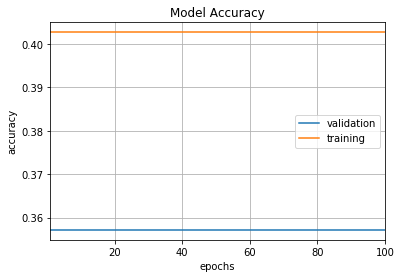

84/84 [==============================] - 0s 227us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [1.2857142743610201, 0.3571428557236989]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 1.0492 - acc: 0.4714 - val_loss: 0.9640 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.9575 - acc: 0.6112 - val_loss: 0.9323 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.9308 - acc: 0.6059 - val_loss: 0.9018 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.9111 - acc: 0.6125 - val_loss: 0.8837 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.8891 - acc: 0.6245 - val_loss: 0.8552 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.8649 - acc: 0.6218 - val_loss: 0.8509 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.8349 - acc: 0.6525 - val_loss: 0.7953 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5505 - acc: 0.7270 - val_loss: 0.5991 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5404 - acc: 0.7324 - val_loss: 0.5769 - val_acc: 0.7108
Epoch 95/100
 - 1s - loss: 0.5479 - acc: 0.7297 - val_loss: 0.6129 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.5461 - acc: 0.7284 - val_loss: 0.6010 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5521 - acc: 0.7257 - val_loss: 0.5989 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5461 - acc: 0.7297 - val_loss: 0.6024 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5467 - acc: 0.7284 - val_loss: 0.6007 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5426 - acc: 0.7297 - val_loss: 0.5943 - val_acc: 0.7108


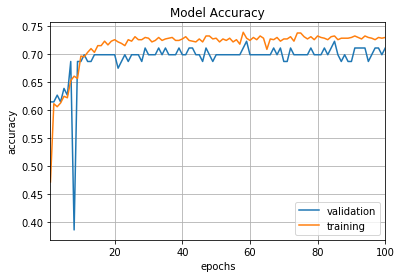

83/83 [==============================] - 0s 190us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5943208929285946, 0.7108433799571302]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.8151 - acc: 0.5979 - val_loss: 0.7407 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.8024 - acc: 0.5979 - val_loss: 0.7339 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.8013 - acc: 0.5979 - val_loss: 0.7301 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.8012 - acc: 0.5979 - val_loss: 0.7289 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.8010 - acc: 0.5979 - val_loss: 0.7295 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.8010 - acc: 0.5979 - val_loss: 0.7296 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.8008 - acc: 0.5979 - val_loss: 0.7297 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5509 - acc: 0.7270 - val_loss: 0.5509 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5527 - acc: 0.7284 - val_loss: 0.5682 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5657 - acc: 0.7230 - val_loss: 0.5512 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5356 - acc: 0.7377 - val_loss: 0.5726 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5548 - acc: 0.7270 - val_loss: 0.5616 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5611 - acc: 0.7217 - val_loss: 0.5725 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.5443 - acc: 0.7297 - val_loss: 0.5668 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5446 - acc: 0.7310 - val_loss: 0.5665 - val_acc: 0.7229


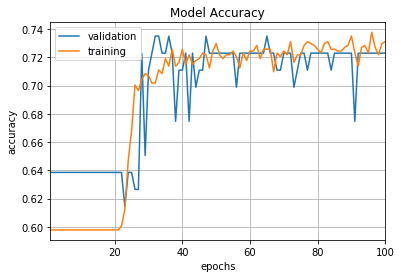

83/83 [==============================] - 0s 201us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5664975248187422, 0.7228915641106755]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 1.0112 - acc: 0.4940 - val_loss: 0.8705 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.7871 - acc: 0.6059 - val_loss: 0.8692 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.7861 - acc: 0.6059 - val_loss: 0.8680 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.7853 - acc: 0.6059 - val_loss: 0.8676 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.7833 - acc: 0.6059 - val_loss: 0.8678 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.7817 - acc: 0.6059 - val_loss: 0.8662 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.7735 - acc: 0.6072 - val_loss: 0.9557 - val_acc: 0.5542
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5482 - acc: 0.7284 - val_loss: 0.6404 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.5467 - acc: 0.7297 - val_loss: 0.6695 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.5498 - acc: 0.7284 - val_loss: 0.6077 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5563 - acc: 0.7257 - val_loss: 0.6125 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5393 - acc: 0.7364 - val_loss: 0.5997 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5427 - acc: 0.7310 - val_loss: 0.6427 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.5425 - acc: 0.7324 - val_loss: 0.6643 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.5464 - acc: 0.7270 - val_loss: 0.6653 - val_acc: 0.6747


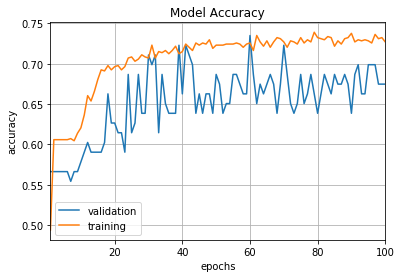

83/83 [==============================] - 0s 301us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6652773740779923, 0.6746987930263382]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.7936 - acc: 0.6045 - val_loss: 0.8429 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.7897 - acc: 0.6045 - val_loss: 0.8430 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.7894 - acc: 0.6045 - val_loss: 0.8429 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.7895 - acc: 0.6045 - val_loss: 0.8426 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.7894 - acc: 0.6045 - val_loss: 0.8421 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.7894 - acc: 0.6045 - val_loss: 0.8425 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.7887 - acc: 0.6045 - val_loss: 0.8411 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5681 - acc: 0.7217 - val_loss: 0.5435 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5718 - acc: 0.7177 - val_loss: 0.5151 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5730 - acc: 0.7204 - val_loss: 0.5037 - val_acc: 0.7711
Epoch 96/100
 - 0s - loss: 0.5696 - acc: 0.7164 - val_loss: 0.4992 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.5748 - acc: 0.7204 - val_loss: 0.4977 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5769 - acc: 0.7137 - val_loss: 0.5123 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5752 - acc: 0.7164 - val_loss: 0.5197 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.5723 - acc: 0.7150 - val_loss: 0.5321 - val_acc: 0.7349


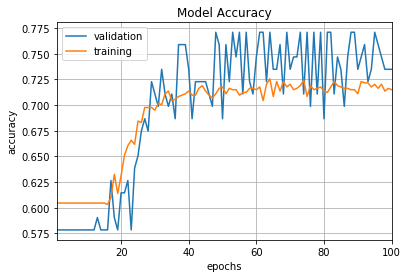

83/83 [==============================] - 0s 163us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5320621107716158, 0.7349397604724011]
 best Score: 0.7349397604724011          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 1.1964 - acc: 0.4021 - val_loss: 1.2770 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 1.1959 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 1.1958 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 1.1958 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 5/100
 - 0s - loss: 1.1958 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 6/100
 - 0s - loss: 1.1958 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 7/100
 - 0s - loss: 1.1958 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 8/

Epoch 93/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 94/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 95/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 96/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 97/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 98/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 99/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614
Epoch 100/100
 - 0s - loss: 1.1957 - acc: 0.4021 - val_loss: 1.2771 - val_acc: 0.3614


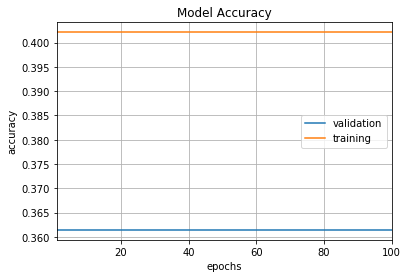

83/83 [==============================] - 0s 186us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [1.2771084423524788, 0.361445785645979]
 best Score: 0.7349397604724011          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.8024 - acc: 0.5979 - val_loss: 0.7199 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.8022 - acc: 0.5979 - val_loss: 0.7199 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.8020 - acc: 0.5979 - val_loss: 0.7199 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.8016 - acc: 0.5979 - val_loss: 0.7187 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.8012 - acc: 0.5979 - val_loss: 0.7184 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.8009 - acc: 0.5979 - val_loss: 0.7178 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.8001 - acc: 0.5979 - val_loss: 0.7173 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5326 - acc: 0.7324 - val_loss: 0.7008 - val_acc: 0.6506
Epoch 94/100
 - 1s - loss: 0.5248 - acc: 0.7430 - val_loss: 0.7280 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.5278 - acc: 0.7350 - val_loss: 0.6996 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.5264 - acc: 0.7377 - val_loss: 0.7281 - val_acc: 0.6145
Epoch 97/100
 - 0s - loss: 0.5229 - acc: 0.7403 - val_loss: 0.7279 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.5275 - acc: 0.7390 - val_loss: 0.7271 - val_acc: 0.6386
Epoch 99/100
 - 1s - loss: 0.5331 - acc: 0.7337 - val_loss: 0.7262 - val_acc: 0.6145
Epoch 100/100
 - 0s - loss: 0.5284 - acc: 0.7403 - val_loss: 0.7357 - val_acc: 0.6265


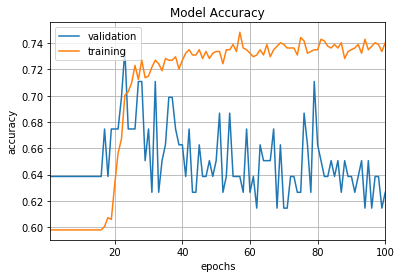

83/83 [==============================] - 0s 196us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.7357493409191269, 0.6265060183513596]
 best Score: 0.7349397604724011          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_hinge,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7349397604724011
0.6307515779173518


[[0.6487962234587896, 0.6904761904761905],
 [0.6044167336963472, 0.7023809523809523],
 [0.5387508982703799, 0.7261904790287926],
 [1.2857142743610201, 0.3571428557236989],
 [0.5943208929285946, 0.7108433799571302],
 [0.5664975248187422, 0.7228915641106755],
 [0.6652773740779923, 0.6746987930263382],
 [0.5320621107716158, 0.7349397604724011],
 [1.2771084423524788, 0.361445785645979],
 [0.7357493409191269, 0.6265060183513596]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6629272987638323


[0.7333333309491475,
 0.7280000042915344,
 0.7199999992052714,
 0.40266667286554975,
 0.7296937419158641,
 0.7310252985687612,
 0.7270306290069052,
 0.7150466076226114,
 0.40213049894642733,
 0.7403462042662498]

# 08 #losses.logcosh,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.2631 - acc: 0.3933 - val_loss: 0.2427 - val_acc: 0.4405
Epoch 2/100
 - 0s - loss: 0.2281 - acc: 0.4360 - val_loss: 0.1241 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.1148 - acc: 0.6067 - val_loss: 0.1186 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.1140 - acc: 0.6067 - val_loss: 0.1215 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.1132 - acc: 0.6067 - val_loss: 0.1206 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.1128 - acc: 0.6080 - val_loss: 0.1203 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.1123 - acc: 0.6080 - val_loss: 0.1168 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.1112 - acc: 0.6093 - val_loss: 0.1179 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.1103 - acc: 0.6160 - val_loss: 0.1198 - val_acc: 0.5714
Epoch 10/100
 - 0s - loss: 0.1104 - acc: 0.6160 - val_loss: 0.1180 - val_acc: 0.5714
Epoch 11/100
 - 0s - loss: 0.1063 - acc: 0.6520 - val_loss: 0.1211 - val_acc: 0.5833
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.0894 - acc: 0.7133 - val_loss: 0.1056 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.0891 - acc: 0.7240 - val_loss: 0.1080 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.0896 - acc: 0.7160 - val_loss: 0.1069 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.0888 - acc: 0.7280 - val_loss: 0.1054 - val_acc: 0.6667


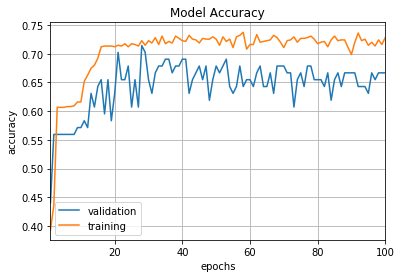

84/84 [==============================] - 0s 257us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10535137497243427, 0.6666666638283503]
 best Score: 0.6666666638283503          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.1305 - acc: 0.5760 - val_loss: 0.1109 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.1181 - acc: 0.5920 - val_loss: 0.1121 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.1173 - acc: 0.6053 - val_loss: 0.1058 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.1105 - acc: 0.6200 - val_loss: 0.1060 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.1103 - acc: 0.6307 - val_loss: 0.1171 - val_acc: 0.6310
Epoch 6/100
 - 1s - loss: 0.1070 - acc: 0.6467 - val_loss: 0.1204 - val_acc: 0.6429
Epoch 7/100
 - 0s - loss: 0.1077 - acc: 0.6240 - val_loss: 0.1027 - val_acc: 0.6190
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0943 - acc: 0.6933 - val_loss: 0.0962 - val_acc: 0.6786
Epoch 94/100
 - 0s - loss: 0.0919 - acc: 0.7133 - val_loss: 0.0939 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.0922 - acc: 0.7120 - val_loss: 0.0946 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.0930 - acc: 0.7013 - val_loss: 0.0937 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.0921 - acc: 0.7133 - val_loss: 0.0940 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0918 - acc: 0.7080 - val_loss: 0.0955 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.0916 - acc: 0.7267 - val_loss: 0.1013 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.0927 - acc: 0.7067 - val_loss: 0.0945 - val_acc: 0.7500


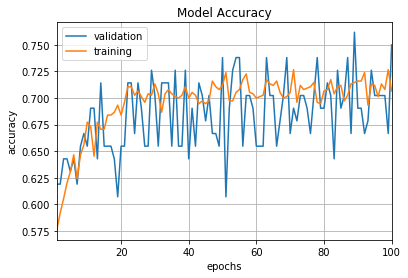

84/84 [==============================] - 0s 344us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.09447590439092546, 0.7499999971616835]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.1181 - acc: 0.5880 - val_loss: 0.1154 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.1136 - acc: 0.6000 - val_loss: 0.1163 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.1102 - acc: 0.6080 - val_loss: 0.1069 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.1085 - acc: 0.6093 - val_loss: 0.1046 - val_acc: 0.7619
Epoch 5/100
 - 0s - loss: 0.1067 - acc: 0.6187 - val_loss: 0.1012 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.1061 - acc: 0.6347 - val_loss: 0.0964 - val_acc: 0.7381
Epoch 7/100
 - 0s - loss: 0.1049 - acc: 0.6600 - val_loss: 0.0941 - val_acc: 0.7262
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0943 - acc: 0.7160 - val_loss: 0.0710 - val_acc: 0.7738
Epoch 94/100
 - 0s - loss: 0.0940 - acc: 0.7000 - val_loss: 0.0711 - val_acc: 0.7738
Epoch 95/100
 - 0s - loss: 0.0938 - acc: 0.7067 - val_loss: 0.0756 - val_acc: 0.7619
Epoch 96/100
 - 0s - loss: 0.0936 - acc: 0.7147 - val_loss: 0.0705 - val_acc: 0.7857
Epoch 97/100
 - 0s - loss: 0.0938 - acc: 0.7067 - val_loss: 0.0772 - val_acc: 0.7619
Epoch 98/100
 - 0s - loss: 0.0935 - acc: 0.6973 - val_loss: 0.0688 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.0937 - acc: 0.7213 - val_loss: 0.0703 - val_acc: 0.7738
Epoch 100/100
 - 0s - loss: 0.0935 - acc: 0.7067 - val_loss: 0.0696 - val_acc: 0.7976


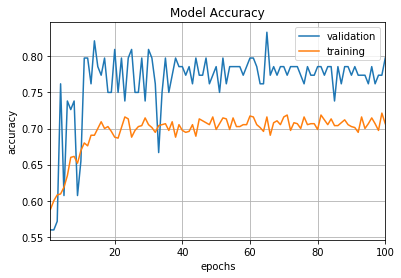

84/84 [==============================] - 0s 236us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.06956783948200089, 0.7976190532956805]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.1120 - acc: 0.6013 - val_loss: 0.1025 - val_acc: 0.6429
Epoch 2/100
 - 0s - loss: 0.1094 - acc: 0.6160 - val_loss: 0.1020 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: 0.1079 - acc: 0.6280 - val_loss: 0.1006 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.1065 - acc: 0.6467 - val_loss: 0.0989 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.1046 - acc: 0.6573 - val_loss: 0.1018 - val_acc: 0.7381
Epoch 6/100
 - 0s - loss: 0.1028 - acc: 0.6653 - val_loss: 0.0961 - val_acc: 0.7024
Epoch 7/100
 - 0s - loss: 0.1011 - acc: 0.6640 - val_loss: 0.1015 - val_acc: 0.7024
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0910 - acc: 0.7120 - val_loss: 0.0960 - val_acc: 0.6905
Epoch 94/100
 - 0s - loss: 0.0899 - acc: 0.7160 - val_loss: 0.0937 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.0906 - acc: 0.7160 - val_loss: 0.0945 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.0906 - acc: 0.7240 - val_loss: 0.0965 - val_acc: 0.6786
Epoch 97/100
 - 0s - loss: 0.0902 - acc: 0.7187 - val_loss: 0.0955 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0902 - acc: 0.7240 - val_loss: 0.0982 - val_acc: 0.6786
Epoch 99/100
 - 0s - loss: 0.0900 - acc: 0.7120 - val_loss: 0.0990 - val_acc: 0.6786
Epoch 100/100
 - 1s - loss: 0.0900 - acc: 0.7147 - val_loss: 0.0975 - val_acc: 0.6667


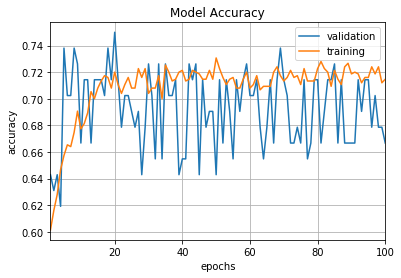

84/84 [==============================] - 0s 219us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.09751119854904357, 0.6666666609900338]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.1731 - acc: 0.6005 - val_loss: 0.1646 - val_acc: 0.6145
Epoch 2/100
 - 1s - loss: 0.1251 - acc: 0.5899 - val_loss: 0.1207 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1115 - acc: 0.6032 - val_loss: 0.1177 - val_acc: 0.4940
Epoch 4/100
 - 0s - loss: 0.1102 - acc: 0.6138 - val_loss: 0.1075 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1080 - acc: 0.6245 - val_loss: 0.1190 - val_acc: 0.4578
Epoch 6/100
 - 0s - loss: 0.1083 - acc: 0.6178 - val_loss: 0.1070 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1060 - acc: 0.6405 - val_loss: 0.1037 - val_acc: 0.6386
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0886 - acc: 0.7284 - val_loss: 0.0907 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.0893 - acc: 0.7350 - val_loss: 0.0906 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.0891 - acc: 0.7257 - val_loss: 0.0903 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.0885 - acc: 0.7470 - val_loss: 0.0898 - val_acc: 0.7229
Epoch 97/100
 - 1s - loss: 0.0885 - acc: 0.7350 - val_loss: 0.0902 - val_acc: 0.7108
Epoch 98/100
 - 1s - loss: 0.0891 - acc: 0.7310 - val_loss: 0.0907 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.0889 - acc: 0.7324 - val_loss: 0.0907 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.0885 - acc: 0.7377 - val_loss: 0.0898 - val_acc: 0.7229


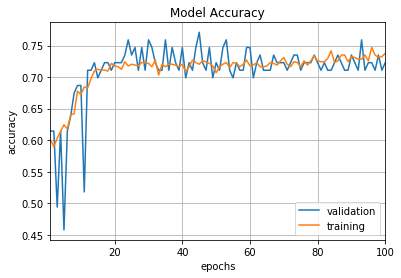

83/83 [==============================] - 0s 238us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.0897891523249178, 0.7228915727282145]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.1117 - acc: 0.5992 - val_loss: 0.1158 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.1122 - acc: 0.5925 - val_loss: 0.1096 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1096 - acc: 0.6165 - val_loss: 0.1336 - val_acc: 0.4096
Epoch 4/100
 - 0s - loss: 0.1091 - acc: 0.6152 - val_loss: 0.1061 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1070 - acc: 0.6471 - val_loss: 0.1047 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.1047 - acc: 0.6418 - val_loss: 0.1106 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.1032 - acc: 0.6591 - val_loss: 0.1024 - val_acc: 0.5904
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0912 - acc: 0.7084 - val_loss: 0.0908 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.0910 - acc: 0.7164 - val_loss: 0.0917 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.0914 - acc: 0.7084 - val_loss: 0.0954 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.0906 - acc: 0.7111 - val_loss: 0.0943 - val_acc: 0.6988
Epoch 97/100
 - 1s - loss: 0.0904 - acc: 0.7124 - val_loss: 0.0906 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.0912 - acc: 0.7124 - val_loss: 0.1096 - val_acc: 0.6024
Epoch 99/100
 - 0s - loss: 0.0902 - acc: 0.7310 - val_loss: 0.0909 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.0909 - acc: 0.7190 - val_loss: 0.0925 - val_acc: 0.6867


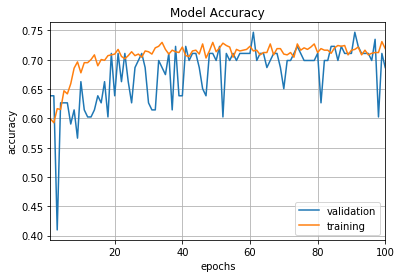

83/83 [==============================] - 0s 459us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.09254981586372996, 0.6867469857974224]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.1161 - acc: 0.6059 - val_loss: 0.1199 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.1133 - acc: 0.6059 - val_loss: 0.1243 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.1131 - acc: 0.6059 - val_loss: 0.1176 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.1124 - acc: 0.6059 - val_loss: 0.1201 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.1118 - acc: 0.6059 - val_loss: 0.1215 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.1115 - acc: 0.6059 - val_loss: 0.1179 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.1110 - acc: 0.6059 - val_loss: 0.1204 - val_acc: 0.5663
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0883 - acc: 0.7244 - val_loss: 0.1097 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.0881 - acc: 0.7257 - val_loss: 0.1127 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0880 - acc: 0.7230 - val_loss: 0.1115 - val_acc: 0.6867
Epoch 96/100
 - 1s - loss: 0.0881 - acc: 0.7297 - val_loss: 0.1094 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.0885 - acc: 0.7350 - val_loss: 0.1116 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.0879 - acc: 0.7324 - val_loss: 0.1134 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.0880 - acc: 0.7337 - val_loss: 0.1133 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.0888 - acc: 0.7297 - val_loss: 0.1150 - val_acc: 0.6386


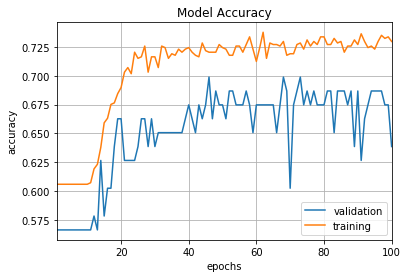

83/83 [==============================] - 0s 331us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.11500697394451463, 0.6385542197399828]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.1310 - acc: 0.5593 - val_loss: 0.1156 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.1124 - acc: 0.6045 - val_loss: 0.1168 - val_acc: 0.5783
Epoch 3/100
 - 1s - loss: 0.1126 - acc: 0.6045 - val_loss: 0.1164 - val_acc: 0.5783
Epoch 4/100
 - 1s - loss: 0.1125 - acc: 0.6045 - val_loss: 0.1147 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.1114 - acc: 0.6059 - val_loss: 0.1162 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.1117 - acc: 0.6085 - val_loss: 0.1139 - val_acc: 0.5783
Epoch 7/100
 - 1s - loss: 0.1118 - acc: 0.6045 - val_loss: 0.1152 - val_acc: 0.5783
Epoch 8

Epoch 93/100
 - 1s - loss: 0.0917 - acc: 0.7111 - val_loss: 0.0912 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.0914 - acc: 0.7164 - val_loss: 0.0891 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0915 - acc: 0.7164 - val_loss: 0.0864 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.0913 - acc: 0.7284 - val_loss: 0.0884 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.0921 - acc: 0.7084 - val_loss: 0.0862 - val_acc: 0.7470
Epoch 98/100
 - 1s - loss: 0.0917 - acc: 0.7177 - val_loss: 0.0862 - val_acc: 0.7470
Epoch 99/100
 - 1s - loss: 0.0921 - acc: 0.7164 - val_loss: 0.0870 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.0916 - acc: 0.7150 - val_loss: 0.0863 - val_acc: 0.7470


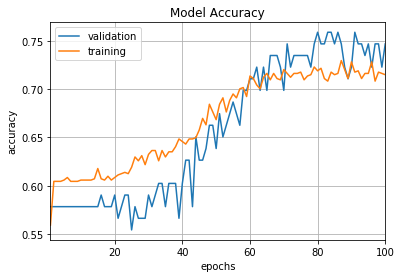

83/83 [==============================] - 0s 301us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.08625302692673292, 0.7469879532434854]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.1937 - acc: 0.4621 - val_loss: 0.1328 - val_acc: 0.3614
Epoch 2/100
 - 0s - loss: 0.1149 - acc: 0.5846 - val_loss: 0.1074 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1126 - acc: 0.5965 - val_loss: 0.1057 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.1133 - acc: 0.6032 - val_loss: 0.1018 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.1090 - acc: 0.6205 - val_loss: 0.1053 - val_acc: 0.7229
Epoch 6/100
 - 0s - loss: 0.1068 - acc: 0.6312 - val_loss: 0.1357 - val_acc: 0.4096
Epoch 7/100
 - 0s - loss: 0.1045 - acc: 0.6565 - val_loss: 0.1042 - val_acc: 0.6747
Epoch 8

Epoch 93/100
 - 1s - loss: 0.0910 - acc: 0.7137 - val_loss: 0.0914 - val_acc: 0.6747
Epoch 94/100
 - 1s - loss: 0.0912 - acc: 0.7150 - val_loss: 0.0869 - val_acc: 0.7711
Epoch 95/100
 - 0s - loss: 0.0913 - acc: 0.7044 - val_loss: 0.1121 - val_acc: 0.6145
Epoch 96/100
 - 0s - loss: 0.0914 - acc: 0.7111 - val_loss: 0.1027 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.0907 - acc: 0.7190 - val_loss: 0.0880 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.0908 - acc: 0.7124 - val_loss: 0.0922 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.0903 - acc: 0.7137 - val_loss: 0.0883 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0902 - acc: 0.7111 - val_loss: 0.0869 - val_acc: 0.7470


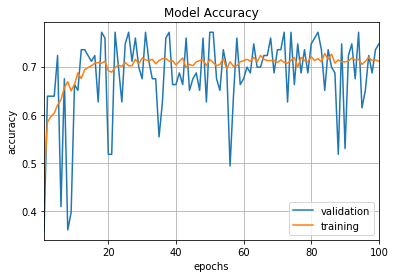

83/83 [==============================] - 0s 205us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.08687487235629415, 0.7469879546797419]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.1266 - acc: 0.5526 - val_loss: 0.1225 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.1201 - acc: 0.5632 - val_loss: 0.1136 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1145 - acc: 0.5939 - val_loss: 0.1070 - val_acc: 0.6627
Epoch 4/100
 - 0s - loss: 0.1129 - acc: 0.5992 - val_loss: 0.1068 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.1122 - acc: 0.6019 - val_loss: 0.1064 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1105 - acc: 0.6099 - val_loss: 0.1051 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.1099 - acc: 0.6152 - val_loss: 0.1573 - val_acc: 0.3614
Epoch 

Epoch 93/100
 - 1s - loss: 0.0913 - acc: 0.7124 - val_loss: 0.1011 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.0912 - acc: 0.7190 - val_loss: 0.1003 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.0909 - acc: 0.7270 - val_loss: 0.1001 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.0910 - acc: 0.7204 - val_loss: 0.1133 - val_acc: 0.6145
Epoch 97/100
 - 0s - loss: 0.0908 - acc: 0.7190 - val_loss: 0.0995 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.0905 - acc: 0.7204 - val_loss: 0.1276 - val_acc: 0.5542
Epoch 99/100
 - 1s - loss: 0.0911 - acc: 0.7257 - val_loss: 0.1050 - val_acc: 0.6386
Epoch 100/100
 - 0s - loss: 0.0910 - acc: 0.7204 - val_loss: 0.1059 - val_acc: 0.6265


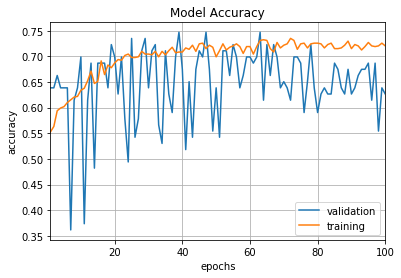

83/83 [==============================] - 0s 282us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.10590072442968208, 0.6265060183513596]
 best Score: 0.7976190532956805          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.logcosh,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7976190532956805
0.7049627079815954


[[0.10535137497243427, 0.6666666638283503],
 [0.09447590439092546, 0.7499999971616835],
 [0.06956783948200089, 0.7976190532956805],
 [0.09751119854904357, 0.6666666609900338],
 [0.0897891523249178, 0.7228915727282145],
 [0.09254981586372996, 0.6867469857974224],
 [0.11500697394451463, 0.6385542197399828],
 [0.08625302692673292, 0.7469879532434854],
 [0.08687487235629415, 0.7469879546797419],
 [0.10590072442968208, 0.6265060183513596]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.718888948935273


[0.7279999999205271,
 0.7066666678587595,
 0.7066666726271311,
 0.7146666665871938,
 0.737683087388939,
 0.7190412787718081,
 0.7296937442175082,
 0.7150466048447651,
 0.7110519313145572,
 0.7203728358215403]

# 09 #losses.categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 0.7306 - acc: 0.5507 - val_loss: 0.6839 - val_acc: 0.5595
Epoch 2/100
 - 0s - loss: 0.6641 - acc: 0.6067 - val_loss: 0.6863 - val_acc: 0.5595
Epoch 3/100
 - 1s - loss: 0.6623 - acc: 0.6067 - val_loss: 0.6908 - val_acc: 0.5595
Epoch 4/100
 - 0s - loss: 0.6613 - acc: 0.6067 - val_loss: 0.6847 - val_acc: 0.5595
Epoch 5/100
 - 1s - loss: 0.6603 - acc: 0.6067 - val_loss: 0.6898 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.6592 - acc: 0.6080 - val_loss: 0.6834 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.6538 - acc: 0.6080 - val_loss: 0.6766 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.6552 - acc: 0.6120 - val_loss: 0.6793 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.6473 - acc: 0.6147 - val_loss: 0.6844 - val_acc: 0.5714
Epoch 10/100
 - 0s - loss: 0.6401 - acc: 0.6293 - val_loss: 0.6866 - val_acc: 0.5714
Epoch 11/100
 - 0s - loss: 0.6353 - acc: 0.6480 - val_loss: 0.6665 - val_acc: 0.5833
Epoch 12/100
 - 1s -

Epoch 97/100
 - 0s - loss: 0.5674 - acc: 0.7240 - val_loss: 0.6464 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.5637 - acc: 0.7280 - val_loss: 0.6432 - val_acc: 0.6548
Epoch 99/100
 - 1s - loss: 0.5665 - acc: 0.7293 - val_loss: 0.6454 - val_acc: 0.6429
Epoch 100/100
 - 0s - loss: 0.5684 - acc: 0.7160 - val_loss: 0.6378 - val_acc: 0.6548


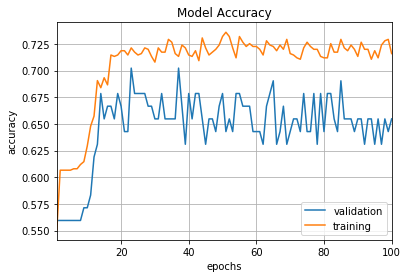

84/84 [==============================] - 0s 463us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.63776676711582, 0.6547619019235883]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 12s - loss: 0.6929 - acc: 0.6013 - val_loss: 0.6717 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6666 - acc: 0.5947 - val_loss: 0.6698 - val_acc: 0.5952
Epoch 3/100
 - 1s - loss: 0.6679 - acc: 0.6040 - val_loss: 0.6782 - val_acc: 0.5952
Epoch 4/100
 - 1s - loss: 0.6667 - acc: 0.6013 - val_loss: 0.6620 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6596 - acc: 0.6173 - val_loss: 0.6679 - val_acc: 0.6310
Epoch 6/100
 - 1s - loss: 0.6589 - acc: 0.6053 - val_loss: 0.6623 - val_acc: 0.5952
Epoch 7/100
 - 1s - loss: 0.6566 - acc: 0.6107 - val_loss: 0.6547 - val_acc: 0.5952
Epoch 8/10

Epoch 93/100
 - 1s - loss: 0.5767 - acc: 0.7133 - val_loss: 0.5965 - val_acc: 0.6786
Epoch 94/100
 - 0s - loss: 0.5751 - acc: 0.7173 - val_loss: 0.5967 - val_acc: 0.6786
Epoch 95/100
 - 1s - loss: 0.5793 - acc: 0.7200 - val_loss: 0.5942 - val_acc: 0.7143
Epoch 96/100
 - 1s - loss: 0.5816 - acc: 0.7040 - val_loss: 0.5904 - val_acc: 0.7024
Epoch 97/100
 - 1s - loss: 0.5753 - acc: 0.7213 - val_loss: 0.5931 - val_acc: 0.7143
Epoch 98/100
 - 1s - loss: 0.5744 - acc: 0.7147 - val_loss: 0.5905 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.5749 - acc: 0.7213 - val_loss: 0.5906 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5724 - acc: 0.7240 - val_loss: 0.5953 - val_acc: 0.6905


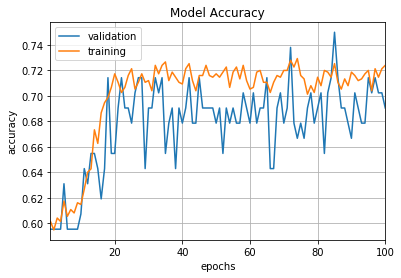

84/84 [==============================] - 0s 216us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5952886570067633, 0.6904761904761905]
 best Score: 0.6904761904761905          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 14s - loss: 0.6873 - acc: 0.6080 - val_loss: 0.6713 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.6505 - acc: 0.6133 - val_loss: 0.6520 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.6496 - acc: 0.6187 - val_loss: 0.6545 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.6430 - acc: 0.6240 - val_loss: 0.6512 - val_acc: 0.5476
Epoch 5/100
 - 1s - loss: 0.6414 - acc: 0.6253 - val_loss: 0.6347 - val_acc: 0.5476
Epoch 6/100
 - 1s - loss: 0.6374 - acc: 0.6400 - val_loss: 0.6199 - val_acc: 0.6071
Epoch 7/100
 - 1s - loss: 0.6333 - acc: 0.6507 - val_loss: 0.6140 - val_acc: 0.6071
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5889 - acc: 0.7160 - val_loss: 0.4927 - val_acc: 0.7738
Epoch 94/100
 - 0s - loss: 0.5826 - acc: 0.7053 - val_loss: 0.4878 - val_acc: 0.7738
Epoch 95/100
 - 1s - loss: 0.5866 - acc: 0.7067 - val_loss: 0.5175 - val_acc: 0.7619
Epoch 96/100
 - 0s - loss: 0.5851 - acc: 0.7120 - val_loss: 0.5213 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.5847 - acc: 0.7053 - val_loss: 0.4831 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.5850 - acc: 0.7040 - val_loss: 0.4809 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.5873 - acc: 0.7053 - val_loss: 0.4811 - val_acc: 0.7738
Epoch 100/100
 - 1s - loss: 0.5878 - acc: 0.7013 - val_loss: 0.4902 - val_acc: 0.7738


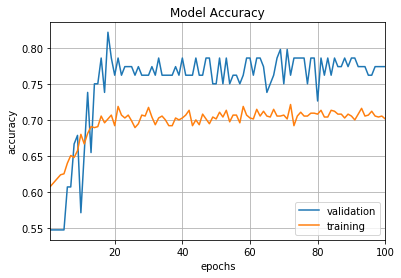

84/84 [==============================] - 0s 195us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.49022139821733746, 0.773809518132891]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: 0.8907 - acc: 0.5973 - val_loss: 0.6303 - val_acc: 0.6429
Epoch 2/100
 - 1s - loss: 0.6596 - acc: 0.6027 - val_loss: 0.6166 - val_acc: 0.6429
Epoch 3/100
 - 1s - loss: 0.6563 - acc: 0.6093 - val_loss: 0.6086 - val_acc: 0.6548
Epoch 4/100
 - 1s - loss: 0.6431 - acc: 0.6440 - val_loss: 0.6132 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.6344 - acc: 0.6453 - val_loss: 0.6008 - val_acc: 0.6548
Epoch 6/100
 - 0s - loss: 0.6284 - acc: 0.6627 - val_loss: 0.6148 - val_acc: 0.7143
Epoch 7/100
 - 0s - loss: 0.6310 - acc: 0.6773 - val_loss: 0.5921 - val_acc: 0.7619
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5764 - acc: 0.7147 - val_loss: 0.5883 - val_acc: 0.7143
Epoch 94/100
 - 1s - loss: 0.5713 - acc: 0.7160 - val_loss: 0.5865 - val_acc: 0.7143
Epoch 95/100
 - 1s - loss: 0.5781 - acc: 0.7133 - val_loss: 0.5879 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5786 - acc: 0.7147 - val_loss: 0.6548 - val_acc: 0.6310
Epoch 97/100
 - 1s - loss: 0.5802 - acc: 0.7160 - val_loss: 0.5842 - val_acc: 0.7143
Epoch 98/100
 - 1s - loss: 0.5772 - acc: 0.7027 - val_loss: 0.5912 - val_acc: 0.7143
Epoch 99/100
 - 1s - loss: 0.5798 - acc: 0.7120 - val_loss: 0.5884 - val_acc: 0.7143
Epoch 100/100
 - 1s - loss: 0.5740 - acc: 0.7240 - val_loss: 0.5910 - val_acc: 0.7143


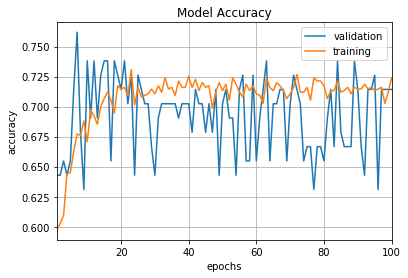

84/84 [==============================] - 0s 297us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5909717792556399, 0.7142857114473978]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.7924 - acc: 0.5233 - val_loss: 0.6555 - val_acc: 0.6265
Epoch 2/100
 - 1s - loss: 0.6687 - acc: 0.6032 - val_loss: 0.6515 - val_acc: 0.6867
Epoch 3/100
 - 1s - loss: 0.6578 - acc: 0.6232 - val_loss: 0.6443 - val_acc: 0.6506
Epoch 4/100
 - 1s - loss: 0.6467 - acc: 0.6458 - val_loss: 0.6422 - val_acc: 0.6506
Epoch 5/100
 - 1s - loss: 0.6348 - acc: 0.6485 - val_loss: 0.6078 - val_acc: 0.6627
Epoch 6/100
 - 1s - loss: 0.6291 - acc: 0.6764 - val_loss: 0.5963 - val_acc: 0.6867
Epoch 7/100
 - 1s - loss: 0.6165 - acc: 0.6897 - val_loss: 0.5914 - val_acc: 0.6988
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5780 - acc: 0.7164 - val_loss: 0.5902 - val_acc: 0.6988
Epoch 94/100
 - 1s - loss: 0.5792 - acc: 0.7257 - val_loss: 0.5911 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.5783 - acc: 0.7217 - val_loss: 0.5700 - val_acc: 0.7349
Epoch 96/100
 - 1s - loss: 0.5736 - acc: 0.7164 - val_loss: 0.5853 - val_acc: 0.6988
Epoch 97/100
 - 1s - loss: 0.5788 - acc: 0.7177 - val_loss: 0.5924 - val_acc: 0.6867
Epoch 98/100
 - 1s - loss: 0.5786 - acc: 0.7137 - val_loss: 0.5639 - val_acc: 0.7349
Epoch 99/100
 - 1s - loss: 0.5775 - acc: 0.7190 - val_loss: 0.5618 - val_acc: 0.7349
Epoch 100/100
 - 1s - loss: 0.5733 - acc: 0.7284 - val_loss: 0.5810 - val_acc: 0.7108


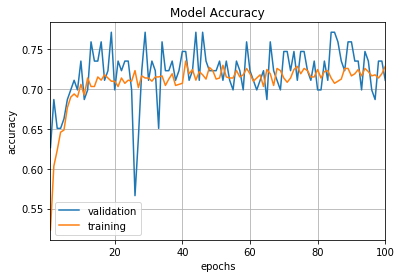

83/83 [==============================] - 0s 472us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5810040328876082, 0.7108433799571302]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.9718 - acc: 0.5393 - val_loss: 0.6451 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6641 - acc: 0.5965 - val_loss: 0.6450 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6655 - acc: 0.5992 - val_loss: 0.6553 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: 0.6648 - acc: 0.5992 - val_loss: 0.6492 - val_acc: 0.6265
Epoch 5/100
 - 1s - loss: 0.6586 - acc: 0.6112 - val_loss: 0.7396 - val_acc: 0.3735
Epoch 6/100
 - 1s - loss: 0.6623 - acc: 0.6138 - val_loss: 0.6502 - val_acc: 0.6145
Epoch 7/100
 - 1s - loss: 0.6577 - acc: 0.6099 - val_loss: 0.6607 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5619 - acc: 0.7270 - val_loss: 0.6969 - val_acc: 0.6024
Epoch 94/100
 - 1s - loss: 0.5677 - acc: 0.7137 - val_loss: 0.5952 - val_acc: 0.7229
Epoch 95/100
 - 1s - loss: 0.5657 - acc: 0.7150 - val_loss: 0.5987 - val_acc: 0.7349
Epoch 96/100
 - 1s - loss: 0.5642 - acc: 0.7244 - val_loss: 0.6055 - val_acc: 0.7229
Epoch 97/100
 - 1s - loss: 0.5557 - acc: 0.7310 - val_loss: 0.6223 - val_acc: 0.6867
Epoch 98/100
 - 1s - loss: 0.5649 - acc: 0.7310 - val_loss: 0.5954 - val_acc: 0.7108
Epoch 99/100
 - 1s - loss: 0.5654 - acc: 0.7097 - val_loss: 0.6215 - val_acc: 0.7349
Epoch 100/100
 - 1s - loss: 0.5665 - acc: 0.7244 - val_loss: 0.6002 - val_acc: 0.7229


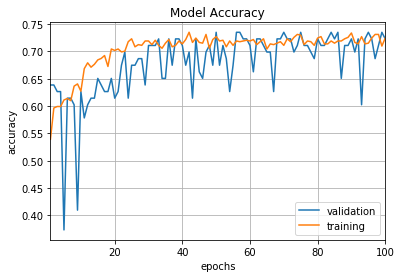

83/83 [==============================] - 0s 223us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6001943400107235, 0.7228915691375732]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 1.2392 - acc: 0.5619 - val_loss: 0.9209 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.7222 - acc: 0.5593 - val_loss: 1.1148 - val_acc: 0.4337
Epoch 3/100
 - 1s - loss: 0.7055 - acc: 0.5659 - val_loss: 0.8738 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.6806 - acc: 0.5766 - val_loss: 0.9690 - val_acc: 0.5663
Epoch 5/100
 - 1s - loss: 0.6693 - acc: 0.6205 - val_loss: 1.1908 - val_acc: 0.4337
Epoch 6/100
 - 0s - loss: 0.6829 - acc: 0.5819 - val_loss: 1.1885 - val_acc: 0.4337
Epoch 7/100
 - 1s - loss: 0.6701 - acc: 0.5979 - val_loss: 0.9398 - val_acc: 0.5663
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5863 - acc: 0.7190 - val_loss: 0.7776 - val_acc: 0.6145
Epoch 94/100
 - 1s - loss: 0.5729 - acc: 0.7244 - val_loss: 0.8395 - val_acc: 0.6145
Epoch 95/100
 - 1s - loss: 0.5859 - acc: 0.6951 - val_loss: 0.9440 - val_acc: 0.5542
Epoch 96/100
 - 1s - loss: 0.5795 - acc: 0.7204 - val_loss: 0.7584 - val_acc: 0.5422
Epoch 97/100
 - 1s - loss: 0.5753 - acc: 0.7044 - val_loss: 0.8376 - val_acc: 0.6145
Epoch 98/100
 - 1s - loss: 0.5748 - acc: 0.7137 - val_loss: 0.7613 - val_acc: 0.6145
Epoch 99/100
 - 1s - loss: 0.5768 - acc: 0.7111 - val_loss: 0.7520 - val_acc: 0.6145
Epoch 100/100
 - 1s - loss: 0.5754 - acc: 0.7071 - val_loss: 0.7836 - val_acc: 0.6145


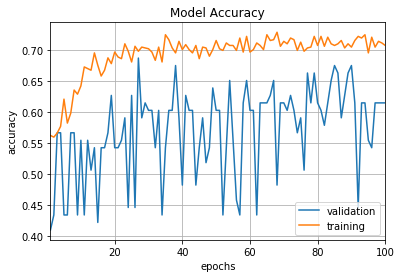

83/83 [==============================] - 0s 221us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.7835817803819496, 0.6144578255802752]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.6601 - acc: 0.6272 - val_loss: 0.7068 - val_acc: 0.5783
Epoch 2/100
 - 1s - loss: 0.6518 - acc: 0.6312 - val_loss: 0.6852 - val_acc: 0.5663
Epoch 3/100
 - 1s - loss: 0.6482 - acc: 0.6418 - val_loss: 0.8813 - val_acc: 0.4217
Epoch 4/100
 - 1s - loss: 0.6433 - acc: 0.6431 - val_loss: 0.6477 - val_acc: 0.5904
Epoch 5/100
 - 1s - loss: 0.6273 - acc: 0.6671 - val_loss: 0.6305 - val_acc: 0.6627
Epoch 6/100
 - 1s - loss: 0.6296 - acc: 0.6818 - val_loss: 0.6835 - val_acc: 0.6024
Epoch 7/100
 - 1s - loss: 0.6198 - acc: 0.6804 - val_loss: 0.6553 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5786 - acc: 0.7031 - val_loss: 0.5520 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.5821 - acc: 0.7190 - val_loss: 0.5838 - val_acc: 0.7108
Epoch 95/100
 - 1s - loss: 0.5860 - acc: 0.6991 - val_loss: 0.5603 - val_acc: 0.7349
Epoch 96/100
 - 1s - loss: 0.5779 - acc: 0.7124 - val_loss: 0.5627 - val_acc: 0.7229
Epoch 97/100
 - 1s - loss: 0.5839 - acc: 0.7031 - val_loss: 0.5785 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.5782 - acc: 0.7017 - val_loss: 0.5556 - val_acc: 0.7349
Epoch 99/100
 - 1s - loss: 0.5832 - acc: 0.7044 - val_loss: 0.5535 - val_acc: 0.7470
Epoch 100/100
 - 1s - loss: 0.5809 - acc: 0.7124 - val_loss: 0.5548 - val_acc: 0.7470


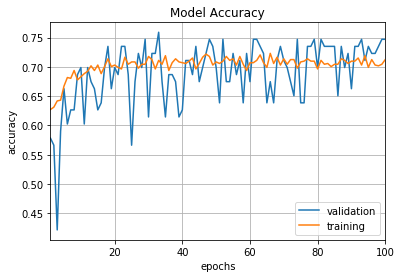

83/83 [==============================] - 0s 216us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5547542105238121, 0.7469879582703832]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.6981 - acc: 0.5007 - val_loss: 0.6674 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6672 - acc: 0.5979 - val_loss: 0.6543 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6628 - acc: 0.5979 - val_loss: 0.6436 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.6617 - acc: 0.5979 - val_loss: 0.6468 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6576 - acc: 0.5979 - val_loss: 0.6471 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.6578 - acc: 0.5979 - val_loss: 0.6443 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.6556 - acc: 0.5979 - val_loss: 0.6355 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5751 - acc: 0.7124 - val_loss: 0.5754 - val_acc: 0.6747
Epoch 94/100
 - 1s - loss: 0.5766 - acc: 0.7217 - val_loss: 0.5644 - val_acc: 0.7590
Epoch 95/100
 - 1s - loss: 0.5786 - acc: 0.7190 - val_loss: 0.5660 - val_acc: 0.6867
Epoch 96/100
 - 1s - loss: 0.5779 - acc: 0.7084 - val_loss: 0.5613 - val_acc: 0.7590
Epoch 97/100
 - 1s - loss: 0.5793 - acc: 0.7017 - val_loss: 0.5612 - val_acc: 0.7590
Epoch 98/100
 - 1s - loss: 0.5805 - acc: 0.7017 - val_loss: 0.5601 - val_acc: 0.7590
Epoch 99/100
 - 1s - loss: 0.5795 - acc: 0.7137 - val_loss: 0.5605 - val_acc: 0.7470
Epoch 100/100
 - 1s - loss: 0.5770 - acc: 0.7217 - val_loss: 0.6084 - val_acc: 0.6506


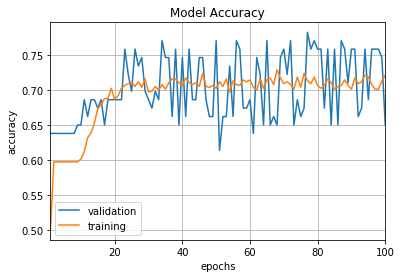

83/83 [==============================] - 0s 335us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6084423309349152, 0.6506024038935282]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 2.2827 - acc: 0.4887 - val_loss: 0.6890 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6603 - acc: 0.6138 - val_loss: 0.6607 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6485 - acc: 0.6338 - val_loss: 0.6451 - val_acc: 0.6506
Epoch 4/100
 - 1s - loss: 0.6409 - acc: 0.6218 - val_loss: 0.7417 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6437 - acc: 0.6445 - val_loss: 0.6453 - val_acc: 0.6747
Epoch 6/100
 - 1s - loss: 0.6316 - acc: 0.6578 - val_loss: 0.6308 - val_acc: 0.6867
Epoch 7/100
 - 1s - loss: 0.6262 - acc: 0.6525 - val_loss: 0.6481 - val_acc: 0.6747
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5644 - acc: 0.7177 - val_loss: 0.6212 - val_acc: 0.7349
Epoch 94/100
 - 1s - loss: 0.5692 - acc: 0.7204 - val_loss: 0.6281 - val_acc: 0.7349
Epoch 95/100
 - 1s - loss: 0.5672 - acc: 0.7297 - val_loss: 0.6039 - val_acc: 0.7229
Epoch 96/100
 - 1s - loss: 0.5675 - acc: 0.7230 - val_loss: 0.6193 - val_acc: 0.6627
Epoch 97/100
 - 1s - loss: 0.5638 - acc: 0.7177 - val_loss: 0.6202 - val_acc: 0.6265
Epoch 98/100
 - 1s - loss: 0.5674 - acc: 0.7284 - val_loss: 0.6187 - val_acc: 0.6386
Epoch 99/100
 - 1s - loss: 0.5634 - acc: 0.7270 - val_loss: 0.6072 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.5696 - acc: 0.7257 - val_loss: 0.7039 - val_acc: 0.6386


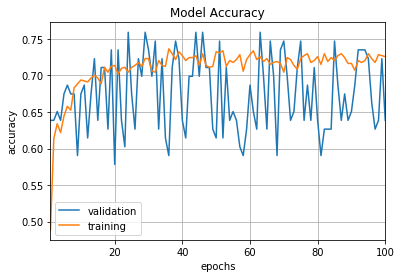

83/83 [==============================] - 0s 295us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.7039174100002611, 0.6385542161493416]
 best Score: 0.773809518132891          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.773809518132891
0.6917670674968299


[[0.63776676711582, 0.6547619019235883],
 [0.5952886570067633, 0.6904761904761905],
 [0.49022139821733746, 0.773809518132891],
 [0.5909717792556399, 0.7142857114473978],
 [0.5810040328876082, 0.7108433799571302],
 [0.6001943400107235, 0.7228915691375732],
 [0.7835817803819496, 0.6144578255802752],
 [0.5547542105238121, 0.7469879582703832],
 [0.6084423309349152, 0.6506024038935282],
 [0.7039174100002611, 0.6385542161493416]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7184907247266714


[0.7160000002384186,
 0.7239999985694885,
 0.7013333396116892,
 0.7240000009536743,
 0.7283621832787911,
 0.7243675157011111,
 0.7070572569906791,
 0.7123834906659335,
 0.7217043940617781,
 0.7256990671951508]

# 10 #losses.sparse_categorical_crossentropy,
              

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.773809518132891
0.6917670674968299


[[0.63776676711582, 0.6547619019235883],
 [0.5952886570067633, 0.6904761904761905],
 [0.49022139821733746, 0.773809518132891],
 [0.5909717792556399, 0.7142857114473978],
 [0.5810040328876082, 0.7108433799571302],
 [0.6001943400107235, 0.7228915691375732],
 [0.7835817803819496, 0.6144578255802752],
 [0.5547542105238121, 0.7469879582703832],
 [0.6084423309349152, 0.6506024038935282],
 [0.7039174100002611, 0.6385542161493416]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7184907247266714


[0.7160000002384186,
 0.7239999985694885,
 0.7013333396116892,
 0.7240000009536743,
 0.7283621832787911,
 0.7243675157011111,
 0.7070572569906791,
 0.7123834906659335,
 0.7217043940617781,
 0.7256990671951508]

# 11 #losses.binary_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 15s - loss: 0.7083 - acc: 0.5347 - val_loss: 0.6915 - val_acc: 0.5595
Epoch 2/100
 - 1s - loss: 0.6648 - acc: 0.6067 - val_loss: 0.6791 - val_acc: 0.5595
Epoch 3/100
 - 1s - loss: 0.6608 - acc: 0.6067 - val_loss: 0.6759 - val_acc: 0.5595
Epoch 4/100
 - 1s - loss: 0.6538 - acc: 0.6067 - val_loss: 0.6786 - val_acc: 0.5595
Epoch 5/100
 - 1s - loss: 0.6516 - acc: 0.6067 - val_loss: 0.6665 - val_acc: 0.5595
Epoch 6/100
 - 1s - loss: 0.6443 - acc: 0.6067 - val_loss: 0.6593 - val_acc: 0.5833
Epoch 7/100
 - 1s - loss: 0.6368 - acc: 0.6213 - val_loss: 0.6524 - val_acc: 0.6071
Epoch 8/100
 - 1s - loss: 0.6265 - acc: 0.6533 - val_loss: 0.6606 - val_acc: 0.6071
Epoch 9/100
 - 1s - loss: 0.6188 - acc: 0.6547 - val_loss: 0.6352 - val_acc: 0.6548
Epoch 10/100
 - 1s - loss: 0.6157 - acc: 0.6800 - val_loss: 0.6329 - val_acc: 0.6548
Epoch 11/100
 - 1s - loss: 0.6075 - acc: 0.6933 - val_loss: 0.6349 - val_acc: 0.6429
Epoch 12/100
 - 1s -

Epoch 97/100
 - 1s - loss: 0.5631 - acc: 0.7280 - val_loss: 0.6421 - val_acc: 0.6667
Epoch 98/100
 - 1s - loss: 0.5626 - acc: 0.7173 - val_loss: 0.6454 - val_acc: 0.6667
Epoch 99/100
 - 1s - loss: 0.5636 - acc: 0.7173 - val_loss: 0.6440 - val_acc: 0.6667
Epoch 100/100
 - 1s - loss: 0.5651 - acc: 0.7173 - val_loss: 0.6466 - val_acc: 0.6548


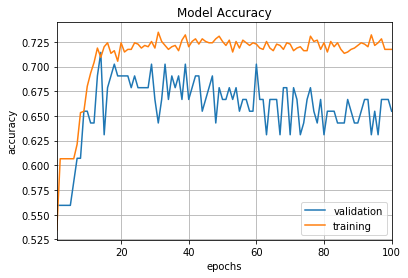

84/84 [==============================] - 0s 239us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6466095816521418, 0.6547618990852719]
 best Score: 0.6547618990852719          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 19s - loss: 1.2239 - acc: 0.5147 - val_loss: 0.6600 - val_acc: 0.5952
Epoch 2/100
 - 1s - loss: 0.6635 - acc: 0.6013 - val_loss: 0.6661 - val_acc: 0.5952
Epoch 3/100
 - 1s - loss: 0.6628 - acc: 0.6000 - val_loss: 0.6545 - val_acc: 0.5952
Epoch 4/100
 - 1s - loss: 0.6558 - acc: 0.6107 - val_loss: 0.6505 - val_acc: 0.5952
Epoch 5/100
 - 1s - loss: 0.6475 - acc: 0.6187 - val_loss: 0.6587 - val_acc: 0.5952
Epoch 6/100
 - 1s - loss: 0.6527 - acc: 0.6213 - val_loss: 0.6407 - val_acc: 0.5952
Epoch 7/100
 - 1s - loss: 0.6393 - acc: 0.6333 - val_loss: 0.6383 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5790 - acc: 0.7160 - val_loss: 0.5946 - val_acc: 0.7143
Epoch 94/100
 - 1s - loss: 0.5770 - acc: 0.7120 - val_loss: 0.6109 - val_acc: 0.6786
Epoch 95/100
 - 1s - loss: 0.5756 - acc: 0.7173 - val_loss: 0.6206 - val_acc: 0.6667
Epoch 96/100
 - 1s - loss: 0.5770 - acc: 0.7200 - val_loss: 0.6028 - val_acc: 0.6905
Epoch 97/100
 - 1s - loss: 0.5743 - acc: 0.7120 - val_loss: 0.6221 - val_acc: 0.6667
Epoch 98/100
 - 1s - loss: 0.5788 - acc: 0.7067 - val_loss: 0.5971 - val_acc: 0.6905
Epoch 99/100
 - 1s - loss: 0.5800 - acc: 0.6960 - val_loss: 0.5939 - val_acc: 0.6905
Epoch 100/100
 - 1s - loss: 0.5754 - acc: 0.7080 - val_loss: 0.6173 - val_acc: 0.6667


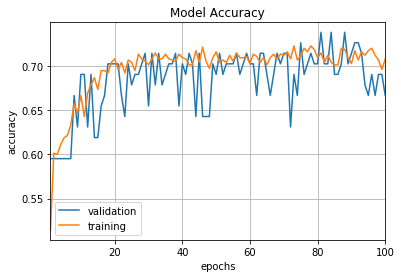

84/84 [==============================] - 0s 237us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6172729957671392, 0.6666666666666666]
 best Score: 0.6666666666666666          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 15s - loss: 5.2468 - acc: 0.6093 - val_loss: 0.6446 - val_acc: 0.6071
Epoch 2/100
 - 1s - loss: 0.6800 - acc: 0.5867 - val_loss: 0.6460 - val_acc: 0.5952
Epoch 3/100
 - 1s - loss: 0.6682 - acc: 0.5840 - val_loss: 0.6673 - val_acc: 0.5595
Epoch 4/100
 - 1s - loss: 0.6688 - acc: 0.6107 - val_loss: 0.6371 - val_acc: 0.5952
Epoch 5/100
 - 1s - loss: 0.6513 - acc: 0.6307 - val_loss: 0.6104 - val_acc: 0.7857
Epoch 6/100
 - 1s - loss: 0.6475 - acc: 0.6267 - val_loss: 0.6015 - val_acc: 0.6667
Epoch 7/100
 - 1s - loss: 0.6464 - acc: 0.6427 - val_loss: 0.6048 - val_acc: 0.6429
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5901 - acc: 0.7107 - val_loss: 0.5347 - val_acc: 0.8095
Epoch 94/100
 - 1s - loss: 0.5911 - acc: 0.7040 - val_loss: 0.5558 - val_acc: 0.7143
Epoch 95/100
 - 1s - loss: 0.5928 - acc: 0.7147 - val_loss: 0.5522 - val_acc: 0.7143
Epoch 96/100
 - 1s - loss: 0.5895 - acc: 0.7093 - val_loss: 0.5404 - val_acc: 0.7262
Epoch 97/100
 - 1s - loss: 0.5910 - acc: 0.7093 - val_loss: 0.5161 - val_acc: 0.7738
Epoch 98/100
 - 1s - loss: 0.5938 - acc: 0.7133 - val_loss: 0.5173 - val_acc: 0.7738
Epoch 99/100
 - 1s - loss: 0.5880 - acc: 0.6987 - val_loss: 0.5204 - val_acc: 0.7619
Epoch 100/100
 - 1s - loss: 0.5883 - acc: 0.6973 - val_loss: 0.5378 - val_acc: 0.7262


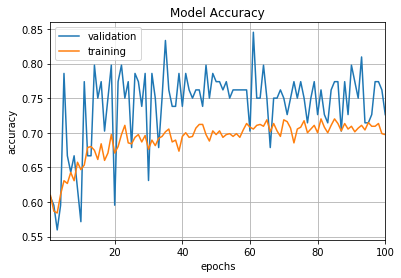

84/84 [==============================] - 0s 319us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5377790388606843, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 14s - loss: 2.0217 - acc: 0.4427 - val_loss: 0.6751 - val_acc: 0.5833
Epoch 2/100
 - 1s - loss: 0.6786 - acc: 0.5893 - val_loss: 0.6529 - val_acc: 0.6310
Epoch 3/100
 - 1s - loss: 0.6693 - acc: 0.5960 - val_loss: 0.6372 - val_acc: 0.6429
Epoch 4/100
 - 1s - loss: 0.6606 - acc: 0.5947 - val_loss: 0.6307 - val_acc: 0.6429
Epoch 5/100
 - 1s - loss: 0.6534 - acc: 0.6173 - val_loss: 0.6202 - val_acc: 0.6429
Epoch 6/100
 - 1s - loss: 0.6474 - acc: 0.6253 - val_loss: 0.6141 - val_acc: 0.6548
Epoch 7/100
 - 1s - loss: 0.6430 - acc: 0.6267 - val_loss: 0.6088 - val_acc: 0.6667
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5705 - acc: 0.7173 - val_loss: 0.5751 - val_acc: 0.7143
Epoch 94/100
 - 1s - loss: 0.5712 - acc: 0.7213 - val_loss: 0.5936 - val_acc: 0.6905
Epoch 95/100
 - 1s - loss: 0.5735 - acc: 0.7320 - val_loss: 0.5849 - val_acc: 0.7024
Epoch 96/100
 - 1s - loss: 0.5728 - acc: 0.7187 - val_loss: 0.6191 - val_acc: 0.6548
Epoch 97/100
 - 1s - loss: 0.5721 - acc: 0.7160 - val_loss: 0.5786 - val_acc: 0.7262
Epoch 98/100
 - 1s - loss: 0.5759 - acc: 0.7267 - val_loss: 0.5747 - val_acc: 0.7024
Epoch 99/100
 - 1s - loss: 0.5734 - acc: 0.7107 - val_loss: 0.5873 - val_acc: 0.7024
Epoch 100/100
 - 1s - loss: 0.5756 - acc: 0.7213 - val_loss: 0.6048 - val_acc: 0.6905


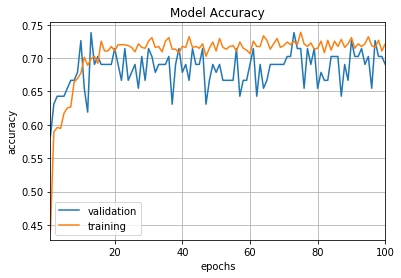

84/84 [==============================] - 0s 247us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6047652278627668, 0.6904761876378741]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 0.9584 - acc: 0.6045 - val_loss: 0.6701 - val_acc: 0.6145
Epoch 2/100
 - 1s - loss: 0.6649 - acc: 0.6005 - val_loss: 0.6779 - val_acc: 0.6145
Epoch 3/100
 - 1s - loss: 0.6644 - acc: 0.5965 - val_loss: 0.6689 - val_acc: 0.6145
Epoch 4/100
 - 1s - loss: 0.6588 - acc: 0.6072 - val_loss: 0.6446 - val_acc: 0.6145
Epoch 5/100
 - 1s - loss: 0.6590 - acc: 0.6059 - val_loss: 0.6561 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.6571 - acc: 0.6245 - val_loss: 0.6584 - val_acc: 0.6145
Epoch 7/100
 - 1s - loss: 0.6462 - acc: 0.6272 - val_loss: 0.6325 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5805 - acc: 0.7177 - val_loss: 0.5563 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.5791 - acc: 0.7230 - val_loss: 0.5630 - val_acc: 0.6747
Epoch 95/100
 - 1s - loss: 0.5800 - acc: 0.7084 - val_loss: 0.6788 - val_acc: 0.6265
Epoch 96/100
 - 1s - loss: 0.5892 - acc: 0.6911 - val_loss: 0.5778 - val_acc: 0.7590
Epoch 97/100
 - 1s - loss: 0.5805 - acc: 0.7164 - val_loss: 0.5608 - val_acc: 0.6988
Epoch 98/100
 - 1s - loss: 0.5807 - acc: 0.7230 - val_loss: 0.5510 - val_acc: 0.7470
Epoch 99/100
 - 1s - loss: 0.5789 - acc: 0.7177 - val_loss: 0.5544 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.5813 - acc: 0.7270 - val_loss: 0.5529 - val_acc: 0.7108


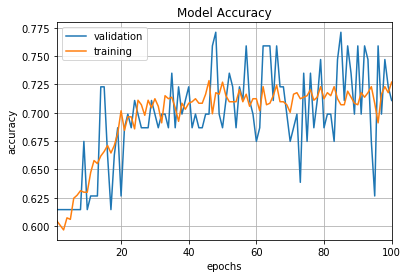

83/83 [==============================] - 0s 249us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5528545968503837, 0.7108433713395912]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 1.0261 - acc: 0.5925 - val_loss: 0.9633 - val_acc: 0.3614
Epoch 2/100
 - 1s - loss: 0.7023 - acc: 0.5686 - val_loss: 0.6933 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6919 - acc: 0.5819 - val_loss: 0.6747 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.6863 - acc: 0.5925 - val_loss: 0.6933 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6666 - acc: 0.5992 - val_loss: 0.6968 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.6575 - acc: 0.6218 - val_loss: 0.6681 - val_acc: 0.5904
Epoch 7/100
 - 1s - loss: 0.6500 - acc: 0.6365 - val_loss: 0.7238 - val_acc: 0.3976
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5778 - acc: 0.7017 - val_loss: 0.5718 - val_acc: 0.7108
Epoch 94/100
 - 1s - loss: 0.5846 - acc: 0.7164 - val_loss: 0.5843 - val_acc: 0.7108
Epoch 95/100
 - 1s - loss: 0.5870 - acc: 0.7111 - val_loss: 0.5864 - val_acc: 0.6988
Epoch 96/100
 - 1s - loss: 0.5790 - acc: 0.7111 - val_loss: 0.6112 - val_acc: 0.6506
Epoch 97/100
 - 1s - loss: 0.5864 - acc: 0.7071 - val_loss: 0.6016 - val_acc: 0.6867
Epoch 98/100
 - 1s - loss: 0.5836 - acc: 0.7164 - val_loss: 0.5694 - val_acc: 0.7349
Epoch 99/100
 - 1s - loss: 0.5809 - acc: 0.7097 - val_loss: 0.6463 - val_acc: 0.6627
Epoch 100/100
 - 1s - loss: 0.5844 - acc: 0.7031 - val_loss: 0.6170 - val_acc: 0.6627


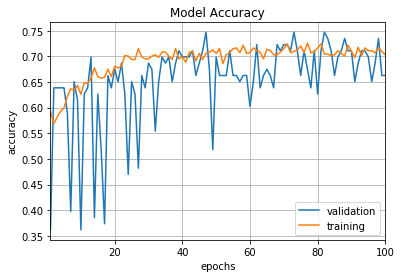

83/83 [==============================] - 0s 241us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6169655459472932, 0.6626506088727928]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 0.6649 - acc: 0.6085 - val_loss: 0.7122 - val_acc: 0.5060
Epoch 2/100
 - 1s - loss: 0.6507 - acc: 0.5965 - val_loss: 0.7376 - val_acc: 0.5663
Epoch 3/100
 - 1s - loss: 0.6402 - acc: 0.6285 - val_loss: 0.7368 - val_acc: 0.5663
Epoch 4/100
 - 1s - loss: 0.6376 - acc: 0.6285 - val_loss: 0.6811 - val_acc: 0.5542
Epoch 5/100
 - 1s - loss: 0.6364 - acc: 0.6365 - val_loss: 0.7361 - val_acc: 0.5663
Epoch 6/100
 - 1s - loss: 0.6294 - acc: 0.6618 - val_loss: 0.7141 - val_acc: 0.5422
Epoch 7/100
 - 1s - loss: 0.6217 - acc: 0.6605 - val_loss: 0.7673 - val_acc: 0.5542
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5681 - acc: 0.7177 - val_loss: 0.6894 - val_acc: 0.6386
Epoch 94/100
 - 1s - loss: 0.5675 - acc: 0.7284 - val_loss: 0.7740 - val_acc: 0.6145
Epoch 95/100
 - 1s - loss: 0.5726 - acc: 0.7297 - val_loss: 0.7180 - val_acc: 0.6627
Epoch 96/100
 - 1s - loss: 0.5686 - acc: 0.7150 - val_loss: 0.7014 - val_acc: 0.6867
Epoch 97/100
 - 1s - loss: 0.5678 - acc: 0.7124 - val_loss: 0.7065 - val_acc: 0.6265
Epoch 98/100
 - 1s - loss: 0.5684 - acc: 0.7150 - val_loss: 0.6861 - val_acc: 0.6386
Epoch 99/100
 - 1s - loss: 0.5652 - acc: 0.7257 - val_loss: 0.6859 - val_acc: 0.6506
Epoch 100/100
 - 1s - loss: 0.5646 - acc: 0.7270 - val_loss: 0.6868 - val_acc: 0.6627


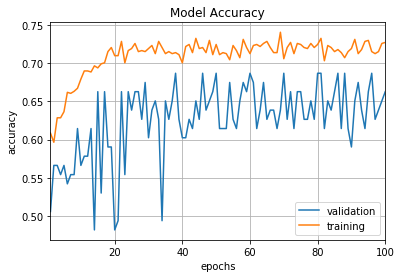

83/83 [==============================] - 0s 228us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6868351590202515, 0.6626506088727928]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 0.6801 - acc: 0.6045 - val_loss: 0.6745 - val_acc: 0.5783
Epoch 2/100
 - 1s - loss: 0.6630 - acc: 0.6045 - val_loss: 0.6877 - val_acc: 0.5783
Epoch 3/100
 - 1s - loss: 0.6625 - acc: 0.6045 - val_loss: 0.6734 - val_acc: 0.5783
Epoch 4/100
 - 1s - loss: 0.6592 - acc: 0.6045 - val_loss: 0.6757 - val_acc: 0.5783
Epoch 5/100
 - 1s - loss: 0.6532 - acc: 0.6059 - val_loss: 0.6697 - val_acc: 0.5783
Epoch 6/100
 - 1s - loss: 0.6536 - acc: 0.6045 - val_loss: 0.6604 - val_acc: 0.6024
Epoch 7/100
 - 1s - loss: 0.6511 - acc: 0.6099 - val_loss: 0.6666 - val_acc: 0.5783
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5734 - acc: 0.7204 - val_loss: 0.5888 - val_acc: 0.7229
Epoch 94/100
 - 1s - loss: 0.5823 - acc: 0.7044 - val_loss: 0.5609 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.5759 - acc: 0.7190 - val_loss: 0.5488 - val_acc: 0.7470
Epoch 96/100
 - 1s - loss: 0.5758 - acc: 0.7137 - val_loss: 0.5519 - val_acc: 0.7470
Epoch 97/100
 - 1s - loss: 0.5773 - acc: 0.7097 - val_loss: 0.5495 - val_acc: 0.7470
Epoch 98/100
 - 1s - loss: 0.5791 - acc: 0.7004 - val_loss: 0.5493 - val_acc: 0.7470
Epoch 99/100
 - 1s - loss: 0.5790 - acc: 0.7164 - val_loss: 0.5951 - val_acc: 0.7108
Epoch 100/100
 - 1s - loss: 0.5796 - acc: 0.7124 - val_loss: 0.5582 - val_acc: 0.7470


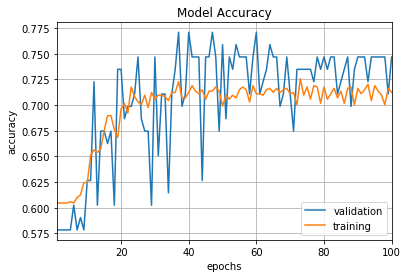

83/83 [==============================] - 0s 254us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.558192439467074, 0.7469879582703832]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 1.6118 - acc: 0.5859 - val_loss: 0.6603 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6681 - acc: 0.6045 - val_loss: 0.6897 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.6749 - acc: 0.5925 - val_loss: 0.6745 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6655 - acc: 0.5846 - val_loss: 0.6636 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.6619 - acc: 0.6059 - val_loss: 0.7071 - val_acc: 0.4578
Epoch 6/100
 - 0s - loss: 0.6605 - acc: 0.6112 - val_loss: 0.6823 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6584 - acc: 0.6178 - val_loss: 0.6516 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5794 - acc: 0.7097 - val_loss: 0.5724 - val_acc: 0.7108
Epoch 94/100
 - 1s - loss: 0.5810 - acc: 0.7204 - val_loss: 0.5908 - val_acc: 0.6747
Epoch 95/100
 - 1s - loss: 0.5758 - acc: 0.7177 - val_loss: 0.5490 - val_acc: 0.7590
Epoch 96/100
 - 1s - loss: 0.5791 - acc: 0.7164 - val_loss: 0.5504 - val_acc: 0.7711
Epoch 97/100
 - 1s - loss: 0.5770 - acc: 0.7111 - val_loss: 0.5484 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.5799 - acc: 0.7084 - val_loss: 0.5649 - val_acc: 0.6988
Epoch 99/100
 - 1s - loss: 0.5750 - acc: 0.7124 - val_loss: 0.6370 - val_acc: 0.6145
Epoch 100/100
 - 1s - loss: 0.5817 - acc: 0.7031 - val_loss: 0.5548 - val_acc: 0.7590


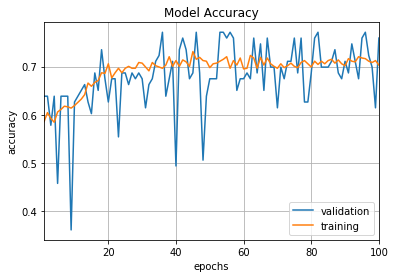

83/83 [==============================] - 0s 263us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5548005779105497, 0.7590361474508263]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 3.1393 - acc: 0.4447 - val_loss: 0.6607 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6862 - acc: 0.5952 - val_loss: 0.6577 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6825 - acc: 0.5965 - val_loss: 0.6567 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.6763 - acc: 0.5979 - val_loss: 0.7684 - val_acc: 0.3494
Epoch 5/100
 - 1s - loss: 0.6756 - acc: 0.5792 - val_loss: 0.6580 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.6645 - acc: 0.5992 - val_loss: 0.6508 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.6632 - acc: 0.6019 - val_loss: 0.6462 - val_acc: 0.6386
Epoch 8

Epoch 93/100
 - 1s - loss: 0.5670 - acc: 0.7217 - val_loss: 0.6334 - val_acc: 0.6265
Epoch 94/100
 - 1s - loss: 0.5693 - acc: 0.7270 - val_loss: 0.6396 - val_acc: 0.6386
Epoch 95/100
 - 1s - loss: 0.5681 - acc: 0.7350 - val_loss: 0.6339 - val_acc: 0.6265
Epoch 96/100
 - 1s - loss: 0.5685 - acc: 0.7324 - val_loss: 0.6423 - val_acc: 0.6386
Epoch 97/100
 - 1s - loss: 0.5683 - acc: 0.7230 - val_loss: 0.6162 - val_acc: 0.7108
Epoch 98/100
 - 1s - loss: 0.5643 - acc: 0.7137 - val_loss: 0.6602 - val_acc: 0.6386
Epoch 99/100
 - 1s - loss: 0.5712 - acc: 0.7244 - val_loss: 0.6186 - val_acc: 0.6747
Epoch 100/100
 - 1s - loss: 0.5601 - acc: 0.7257 - val_loss: 0.6185 - val_acc: 0.6747


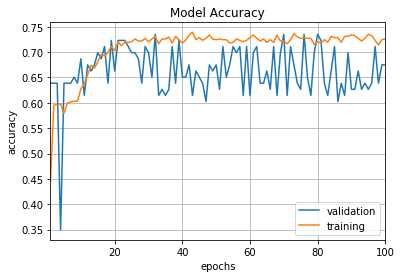

83/83 [==============================] - 0s 328us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6185411674430571, 0.6746987980532358]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361474508263
0.6954962725278228


[[0.6466095816521418, 0.6547618990852719],
 [0.6172729957671392, 0.6666666666666666],
 [0.5377790388606843, 0.7261904790287926],
 [0.6047652278627668, 0.6904761876378741],
 [0.5528545968503837, 0.7108433713395912],
 [0.6169655459472932, 0.6626506088727928],
 [0.6868351590202515, 0.6626506088727928],
 [0.558192439467074, 0.7469879582703832],
 [0.5548005779105497, 0.7590361474508263],
 [0.6185411674430571, 0.6746987980532358]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7142268991890453


[0.717333333492279,
 0.7080000027020772,
 0.6973333362738291,
 0.7213333328564961,
 0.7270306296021579,
 0.7030625886193287,
 0.7270306246417182,
 0.7123834926501095,
 0.7030625842541417,
 0.7256990667983155]

# 12 #losses.kullback_leibler_divergence,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 16s - loss: 1.5061 - acc: 0.5893 - val_loss: 0.7318 - val_acc: 0.5595
Epoch 2/100
 - 1s - loss: 0.6923 - acc: 0.5947 - val_loss: 0.6883 - val_acc: 0.5357
Epoch 3/100
 - 1s - loss: 0.6866 - acc: 0.5827 - val_loss: 0.6787 - val_acc: 0.5476
Epoch 4/100
 - 1s - loss: 0.6789 - acc: 0.5947 - val_loss: 0.6833 - val_acc: 0.5595
Epoch 5/100
 - 1s - loss: 0.6699 - acc: 0.5947 - val_loss: 0.6652 - val_acc: 0.6071
Epoch 6/100
 - 1s - loss: 0.6617 - acc: 0.6227 - val_loss: 0.6618 - val_acc: 0.6548
Epoch 7/100
 - 1s - loss: 0.6518 - acc: 0.6213 - val_loss: 0.6551 - val_acc: 0.6429
Epoch 8/100
 - 1s - loss: 0.6429 - acc: 0.6400 - val_loss: 0.6675 - val_acc: 0.6071
Epoch 9/100
 - 1s - loss: 0.6365 - acc: 0.6320 - val_loss: 0.7151 - val_acc: 0.5595
Epoch 10/100
 - 1s - loss: 0.6302 - acc: 0.6560 - val_loss: 0.6953 - val_acc: 0.5833
Epoch 11/100
 - 1s - loss: 0.6299 - acc: 0.6733 - val_loss: 0.6803 - val_acc: 0.6071
Epoch 12/100
 - 1s -

Epoch 97/100
 - 1s - loss: 0.5700 - acc: 0.7160 - val_loss: 0.7115 - val_acc: 0.5476
Epoch 98/100
 - 1s - loss: 0.5730 - acc: 0.7240 - val_loss: 0.6798 - val_acc: 0.6905
Epoch 99/100
 - 1s - loss: 0.5755 - acc: 0.7280 - val_loss: 0.6668 - val_acc: 0.6905
Epoch 100/100
 - 1s - loss: 0.5733 - acc: 0.7187 - val_loss: 0.6604 - val_acc: 0.6548


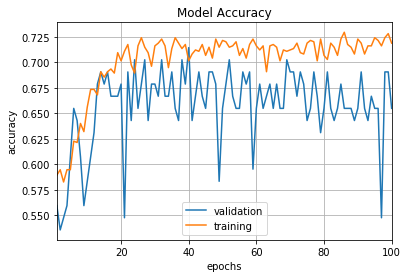

84/84 [==============================] - 0s 427us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6604485114415487, 0.6547618990852719]
 best Score: 0.6547618990852719          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 26s - loss: 0.8957 - acc: 0.5680 - val_loss: 0.7645 - val_acc: 0.6071
Epoch 2/100
 - 1s - loss: 0.6886 - acc: 0.6040 - val_loss: 0.7122 - val_acc: 0.4643
Epoch 3/100
 - 1s - loss: 0.6725 - acc: 0.6280 - val_loss: 0.7121 - val_acc: 0.6071
Epoch 4/100
 - 1s - loss: 0.6620 - acc: 0.6280 - val_loss: 0.6728 - val_acc: 0.5952
Epoch 5/100
 - 1s - loss: 0.6494 - acc: 0.6547 - val_loss: 0.6964 - val_acc: 0.5119
Epoch 6/100
 - 1s - loss: 0.6308 - acc: 0.6560 - val_loss: 0.7606 - val_acc: 0.5595
Epoch 7/100
 - 1s - loss: 0.6307 - acc: 0.6427 - val_loss: 0.6337 - val_acc: 0.6310
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5679 - acc: 0.7187 - val_loss: 0.6046 - val_acc: 0.7143
Epoch 94/100
 - 1s - loss: 0.5676 - acc: 0.7213 - val_loss: 0.6048 - val_acc: 0.6905
Epoch 95/100
 - 1s - loss: 0.5678 - acc: 0.7173 - val_loss: 0.6187 - val_acc: 0.6786
Epoch 96/100
 - 1s - loss: 0.5688 - acc: 0.7213 - val_loss: 0.6096 - val_acc: 0.7024
Epoch 97/100
 - 1s - loss: 0.5673 - acc: 0.7280 - val_loss: 0.6200 - val_acc: 0.6548
Epoch 98/100
 - 1s - loss: 0.5691 - acc: 0.7040 - val_loss: 0.6143 - val_acc: 0.7143
Epoch 99/100
 - 1s - loss: 0.5653 - acc: 0.7120 - val_loss: 0.6265 - val_acc: 0.6667
Epoch 100/100
 - 1s - loss: 0.5690 - acc: 0.7173 - val_loss: 0.6028 - val_acc: 0.7024


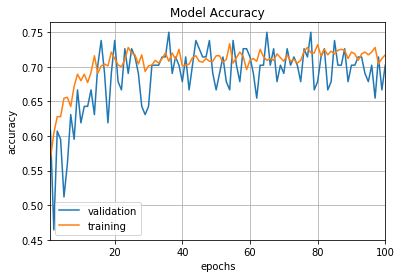

84/84 [==============================] - 0s 279us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6028239329655966, 0.7023809523809523]
 best Score: 0.7023809523809523          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 17s - loss: 0.6631 - acc: 0.6080 - val_loss: 0.6746 - val_acc: 0.5476
Epoch 2/100
 - 1s - loss: 0.6571 - acc: 0.6080 - val_loss: 0.6654 - val_acc: 0.5476
Epoch 3/100
 - 1s - loss: 0.6515 - acc: 0.6080 - val_loss: 0.6755 - val_acc: 0.5476
Epoch 4/100
 - 1s - loss: 0.6496 - acc: 0.6107 - val_loss: 0.6529 - val_acc: 0.5476
Epoch 5/100
 - 1s - loss: 0.6465 - acc: 0.6120 - val_loss: 0.6482 - val_acc: 0.5476
Epoch 6/100
 - 1s - loss: 0.6437 - acc: 0.6133 - val_loss: 0.6348 - val_acc: 0.5714
Epoch 7/100
 - 1s - loss: 0.6382 - acc: 0.6200 - val_loss: 0.6326 - val_acc: 0.5595
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5779 - acc: 0.7027 - val_loss: 0.4960 - val_acc: 0.7976
Epoch 94/100
 - 1s - loss: 0.5839 - acc: 0.7107 - val_loss: 0.5099 - val_acc: 0.7619
Epoch 95/100
 - 1s - loss: 0.5823 - acc: 0.7067 - val_loss: 0.5373 - val_acc: 0.7262
Epoch 96/100
 - 1s - loss: 0.5831 - acc: 0.7120 - val_loss: 0.5355 - val_acc: 0.7262
Epoch 97/100
 - 1s - loss: 0.5817 - acc: 0.7093 - val_loss: 0.5028 - val_acc: 0.7619
Epoch 98/100
 - 1s - loss: 0.5823 - acc: 0.7187 - val_loss: 0.5263 - val_acc: 0.7500
Epoch 99/100
 - 1s - loss: 0.5799 - acc: 0.7200 - val_loss: 0.4919 - val_acc: 0.7738
Epoch 100/100
 - 1s - loss: 0.5808 - acc: 0.7227 - val_loss: 0.5193 - val_acc: 0.7500


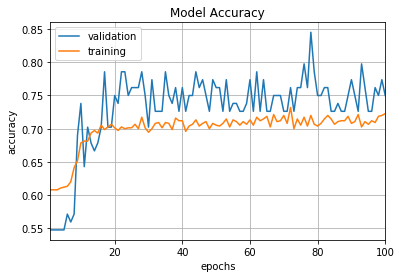

84/84 [==============================] - 0s 315us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5193413425059545, 0.7500000056766328]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 17s - loss: 0.8652 - acc: 0.5560 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 2/100
 - 1s - loss: 0.6473 - acc: 0.6133 - val_loss: 0.6100 - val_acc: 0.6429
Epoch 3/100
 - 1s - loss: 0.6417 - acc: 0.6387 - val_loss: 0.6048 - val_acc: 0.6667
Epoch 4/100
 - 1s - loss: 0.6373 - acc: 0.6413 - val_loss: 0.5960 - val_acc: 0.6786
Epoch 5/100
 - 1s - loss: 0.6233 - acc: 0.6613 - val_loss: 0.6445 - val_acc: 0.6429
Epoch 6/100
 - 1s - loss: 0.6194 - acc: 0.6560 - val_loss: 0.5955 - val_acc: 0.7024
Epoch 7/100
 - 1s - loss: 0.6115 - acc: 0.6867 - val_loss: 0.7923 - val_acc: 0.4286
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5799 - acc: 0.7107 - val_loss: 0.6049 - val_acc: 0.6786
Epoch 94/100
 - 1s - loss: 0.5788 - acc: 0.7133 - val_loss: 0.6145 - val_acc: 0.7024
Epoch 95/100
 - 1s - loss: 0.5742 - acc: 0.7253 - val_loss: 0.5863 - val_acc: 0.7262
Epoch 96/100
 - 1s - loss: 0.5724 - acc: 0.7213 - val_loss: 0.6189 - val_acc: 0.7024
Epoch 97/100
 - 1s - loss: 0.5760 - acc: 0.7173 - val_loss: 0.6050 - val_acc: 0.6786
Epoch 98/100
 - 1s - loss: 0.5768 - acc: 0.7160 - val_loss: 0.6062 - val_acc: 0.6786
Epoch 99/100
 - 1s - loss: 0.5728 - acc: 0.7133 - val_loss: 0.5865 - val_acc: 0.7262
Epoch 100/100
 - 1s - loss: 0.5785 - acc: 0.7120 - val_loss: 0.6110 - val_acc: 0.6786


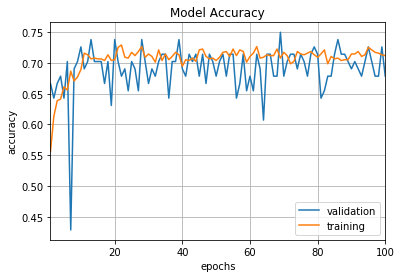

84/84 [==============================] - 0s 285us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6110497826621646, 0.6785714257331121]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 18s - loss: 0.9723 - acc: 0.5752 - val_loss: 0.6652 - val_acc: 0.6145
Epoch 2/100
 - 1s - loss: 0.6822 - acc: 0.5766 - val_loss: 0.6603 - val_acc: 0.6265
Epoch 3/100
 - 1s - loss: 0.6681 - acc: 0.5979 - val_loss: 0.6532 - val_acc: 0.6145
Epoch 4/100
 - 1s - loss: 0.6656 - acc: 0.5979 - val_loss: 0.6524 - val_acc: 0.6145
Epoch 5/100
 - 1s - loss: 0.6641 - acc: 0.5992 - val_loss: 0.6513 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.6634 - acc: 0.6005 - val_loss: 0.6515 - val_acc: 0.6145
Epoch 7/100
 - 1s - loss: 0.6661 - acc: 0.5992 - val_loss: 0.6499 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5762 - acc: 0.7190 - val_loss: 0.5791 - val_acc: 0.7229
Epoch 94/100
 - 1s - loss: 0.5777 - acc: 0.7217 - val_loss: 0.5875 - val_acc: 0.7229
Epoch 95/100
 - 1s - loss: 0.5740 - acc: 0.7230 - val_loss: 0.6008 - val_acc: 0.7108
Epoch 96/100
 - 1s - loss: 0.5811 - acc: 0.7190 - val_loss: 0.5880 - val_acc: 0.7229
Epoch 97/100
 - 1s - loss: 0.5733 - acc: 0.7164 - val_loss: 0.5819 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.5760 - acc: 0.7097 - val_loss: 0.5819 - val_acc: 0.7229
Epoch 99/100
 - 1s - loss: 0.5717 - acc: 0.7257 - val_loss: 0.5794 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.5745 - acc: 0.7204 - val_loss: 0.5781 - val_acc: 0.7349


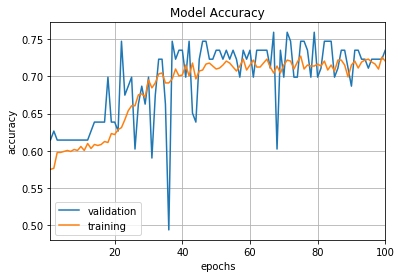

83/83 [==============================] - 0s 318us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5780819920172174, 0.7349397654992988]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 0.6839 - acc: 0.5526 - val_loss: 0.6475 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6649 - acc: 0.5979 - val_loss: 0.6433 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6609 - acc: 0.5992 - val_loss: 0.6505 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: 0.6559 - acc: 0.6085 - val_loss: 0.6368 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6515 - acc: 0.6059 - val_loss: 0.6338 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.6484 - acc: 0.6125 - val_loss: 0.6319 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.6449 - acc: 0.6085 - val_loss: 0.6447 - val_acc: 0.6627
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5772 - acc: 0.7217 - val_loss: 0.5881 - val_acc: 0.7229
Epoch 94/100
 - 1s - loss: 0.5792 - acc: 0.7150 - val_loss: 0.5874 - val_acc: 0.6988
Epoch 95/100
 - 1s - loss: 0.5817 - acc: 0.7124 - val_loss: 0.5861 - val_acc: 0.7108
Epoch 96/100
 - 1s - loss: 0.5786 - acc: 0.7177 - val_loss: 0.5832 - val_acc: 0.7349
Epoch 97/100
 - 1s - loss: 0.5794 - acc: 0.7190 - val_loss: 0.5787 - val_acc: 0.7108
Epoch 98/100
 - 1s - loss: 0.5779 - acc: 0.7137 - val_loss: 0.5846 - val_acc: 0.7349
Epoch 99/100
 - 1s - loss: 0.5796 - acc: 0.7137 - val_loss: 0.5824 - val_acc: 0.7108
Epoch 100/100
 - 1s - loss: 0.5761 - acc: 0.7190 - val_loss: 0.5970 - val_acc: 0.6988


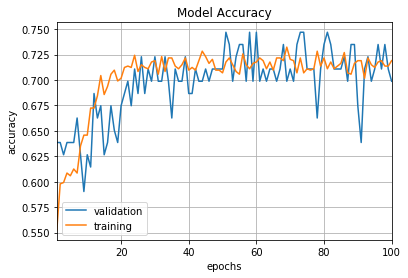

83/83 [==============================] - 0s 335us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5969900108245482, 0.6987951785685068]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 0.7133 - acc: 0.5246 - val_loss: 0.7044 - val_acc: 0.5663
Epoch 2/100
 - 1s - loss: 0.6560 - acc: 0.6059 - val_loss: 0.6838 - val_acc: 0.5663
Epoch 3/100
 - 1s - loss: 0.6497 - acc: 0.6045 - val_loss: 0.6828 - val_acc: 0.5663
Epoch 4/100
 - 1s - loss: 0.6474 - acc: 0.6072 - val_loss: 0.6863 - val_acc: 0.5663
Epoch 5/100
 - 1s - loss: 0.6447 - acc: 0.6165 - val_loss: 0.6812 - val_acc: 0.5663
Epoch 6/100
 - 1s - loss: 0.6387 - acc: 0.6258 - val_loss: 0.6990 - val_acc: 0.5663
Epoch 7/100
 - 1s - loss: 0.6317 - acc: 0.6285 - val_loss: 0.6719 - val_acc: 0.5542
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5658 - acc: 0.7137 - val_loss: 0.6859 - val_acc: 0.6747
Epoch 94/100
 - 1s - loss: 0.5624 - acc: 0.7204 - val_loss: 0.6949 - val_acc: 0.6747
Epoch 95/100
 - 1s - loss: 0.5658 - acc: 0.7097 - val_loss: 0.6773 - val_acc: 0.6265
Epoch 96/100
 - 1s - loss: 0.5633 - acc: 0.7270 - val_loss: 0.6930 - val_acc: 0.6747
Epoch 97/100
 - 1s - loss: 0.5661 - acc: 0.7204 - val_loss: 0.6785 - val_acc: 0.6506
Epoch 98/100
 - 1s - loss: 0.5648 - acc: 0.7244 - val_loss: 0.6828 - val_acc: 0.6265
Epoch 99/100
 - 1s - loss: 0.5647 - acc: 0.7284 - val_loss: 0.7118 - val_acc: 0.6627
Epoch 100/100
 - 1s - loss: 0.5663 - acc: 0.7204 - val_loss: 0.7045 - val_acc: 0.6506


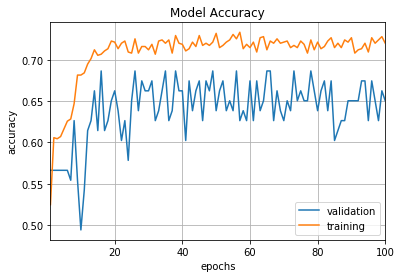

83/83 [==============================] - 0s 283us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.7044913718499333, 0.6506024074841694]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 1.2167 - acc: 0.4021 - val_loss: 0.7013 - val_acc: 0.4940
Epoch 2/100
 - 1s - loss: 0.6838 - acc: 0.5952 - val_loss: 0.6840 - val_acc: 0.5783
Epoch 3/100
 - 1s - loss: 0.6791 - acc: 0.6045 - val_loss: 0.6827 - val_acc: 0.5783
Epoch 4/100
 - 1s - loss: 0.6768 - acc: 0.6045 - val_loss: 0.6819 - val_acc: 0.5783
Epoch 5/100
 - 1s - loss: 0.6753 - acc: 0.6045 - val_loss: 0.6813 - val_acc: 0.5783
Epoch 6/100
 - 1s - loss: 0.6741 - acc: 0.6045 - val_loss: 0.6809 - val_acc: 0.5783
Epoch 7/100
 - 1s - loss: 0.6730 - acc: 0.6045 - val_loss: 0.6809 - val_acc: 0.5783
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.5824 - acc: 0.7031 - val_loss: 0.5504 - val_acc: 0.7711
Epoch 94/100
 - 1s - loss: 0.5760 - acc: 0.7097 - val_loss: 0.5897 - val_acc: 0.7108
Epoch 95/100
 - 1s - loss: 0.5788 - acc: 0.6977 - val_loss: 0.5501 - val_acc: 0.7711
Epoch 96/100
 - 1s - loss: 0.5760 - acc: 0.7084 - val_loss: 0.5509 - val_acc: 0.7349
Epoch 97/100
 - 1s - loss: 0.5774 - acc: 0.7190 - val_loss: 0.5649 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.5754 - acc: 0.7124 - val_loss: 0.5714 - val_acc: 0.7229
Epoch 99/100
 - 1s - loss: 0.5768 - acc: 0.7190 - val_loss: 0.5935 - val_acc: 0.7108
Epoch 100/100
 - 1s - loss: 0.5763 - acc: 0.7097 - val_loss: 0.5735 - val_acc: 0.7229


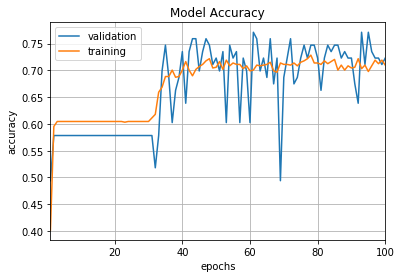

83/83 [==============================] - 0s 288us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.573455489184483, 0.7228915727282145]
 best Score: 0.7500000056766328          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 1.2227 - acc: 0.5140 - val_loss: 0.6457 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6634 - acc: 0.5979 - val_loss: 0.6503 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.6626 - acc: 0.5979 - val_loss: 0.6397 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.6611 - acc: 0.5979 - val_loss: 0.6755 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6570 - acc: 0.6005 - val_loss: 0.6334 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.6538 - acc: 0.5992 - val_loss: 0.7120 - val_acc: 0.4337
Epoch 7/100
 - 1s - loss: 0.6493 - acc: 0.6232 - val_loss: 0.6224 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.5776 - acc: 0.7004 - val_loss: 0.5579 - val_acc: 0.7590
Epoch 94/100
 - 1s - loss: 0.5755 - acc: 0.7164 - val_loss: 0.5576 - val_acc: 0.7349
Epoch 95/100
 - 1s - loss: 0.5795 - acc: 0.7017 - val_loss: 0.5608 - val_acc: 0.6988
Epoch 96/100
 - 1s - loss: 0.5755 - acc: 0.7111 - val_loss: 0.5580 - val_acc: 0.7590
Epoch 97/100
 - 1s - loss: 0.5773 - acc: 0.7124 - val_loss: 0.5557 - val_acc: 0.7590
Epoch 98/100
 - 1s - loss: 0.5746 - acc: 0.7111 - val_loss: 0.5581 - val_acc: 0.6988
Epoch 99/100
 - 1s - loss: 0.5718 - acc: 0.7150 - val_loss: 0.5560 - val_acc: 0.7349
Epoch 100/100
 - 1s - loss: 0.5778 - acc: 0.7124 - val_loss: 0.5556 - val_acc: 0.7590


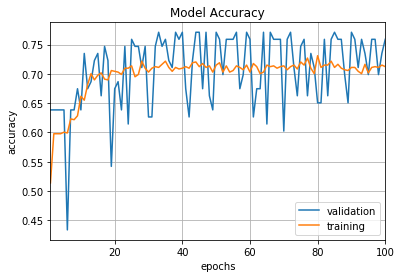

83/83 [==============================] - 0s 342us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5555682304393814, 0.7590361474508263]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 18s - loss: 1.5753 - acc: 0.4567 - val_loss: 0.6419 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.6621 - acc: 0.6059 - val_loss: 0.7122 - val_acc: 0.4458
Epoch 3/100
 - 1s - loss: 0.6576 - acc: 0.6032 - val_loss: 0.6366 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.6526 - acc: 0.6032 - val_loss: 0.6574 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.6475 - acc: 0.6085 - val_loss: 0.6301 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.6451 - acc: 0.6178 - val_loss: 0.6322 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.6418 - acc: 0.6378 - val_loss: 0.6314 - val_acc: 0.6386
Epoch 8

Epoch 93/100
 - 1s - loss: 0.5720 - acc: 0.7217 - val_loss: 0.6083 - val_acc: 0.6386
Epoch 94/100
 - 1s - loss: 0.5737 - acc: 0.7244 - val_loss: 0.6113 - val_acc: 0.6386
Epoch 95/100
 - 1s - loss: 0.5719 - acc: 0.7257 - val_loss: 0.6311 - val_acc: 0.6265
Epoch 96/100
 - 1s - loss: 0.5721 - acc: 0.7364 - val_loss: 0.6115 - val_acc: 0.6386
Epoch 97/100
 - 1s - loss: 0.5721 - acc: 0.7230 - val_loss: 0.6153 - val_acc: 0.6386
Epoch 98/100
 - 1s - loss: 0.5733 - acc: 0.7337 - val_loss: 0.6183 - val_acc: 0.6386
Epoch 99/100
 - 1s - loss: 0.5711 - acc: 0.7310 - val_loss: 0.6234 - val_acc: 0.6265
Epoch 100/100
 - 1s - loss: 0.5761 - acc: 0.7164 - val_loss: 0.6362 - val_acc: 0.6386


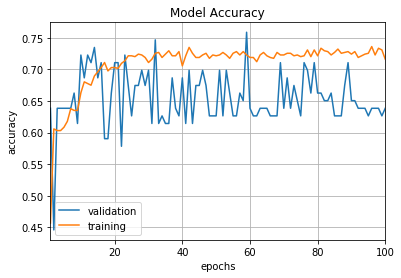

83/83 [==============================] - 0s 417us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6362215337983097, 0.6385542111224439]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.kullback_leibler_divergence,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361474508263
0.699053356572943


[[0.6604485114415487, 0.6547618990852719],
 [0.6028239329655966, 0.7023809523809523],
 [0.5193413425059545, 0.7500000056766328],
 [0.6110497826621646, 0.6785714257331121],
 [0.5780819920172174, 0.7349397654992988],
 [0.5969900108245482, 0.6987951785685068],
 [0.7044913718499333, 0.6506024074841694],
 [0.573455489184483, 0.7228915727282145],
 [0.5555682304393814, 0.7590361474508263],
 [0.6362215337983097, 0.6385542111224439]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7168935653441121


[0.7186666695276896,
 0.7173333354791005,
 0.7226666680971782,
 0.7120000012715657,
 0.7203728373295141,
 0.7190412783749729,
 0.7203728353453381,
 0.7097203718044469,
 0.712383491538971,
 0.7163781646723436]

# 13 #poisson

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 18s - loss: 0.8596 - acc: 0.6080 - val_loss: 0.8495 - val_acc: 0.5595
Epoch 2/100
 - 1s - loss: 0.8324 - acc: 0.6067 - val_loss: 0.8557 - val_acc: 0.5595
Epoch 3/100
 - 1s - loss: 0.8284 - acc: 0.6093 - val_loss: 0.8445 - val_acc: 0.5595
Epoch 4/100
 - 1s - loss: 0.8251 - acc: 0.6093 - val_loss: 0.8384 - val_acc: 0.5595
Epoch 5/100
 - 1s - loss: 0.8215 - acc: 0.6120 - val_loss: 0.8364 - val_acc: 0.5595
Epoch 6/100
 - 1s - loss: 0.8174 - acc: 0.6307 - val_loss: 0.8329 - val_acc: 0.5714
Epoch 7/100
 - 1s - loss: 0.8132 - acc: 0.6347 - val_loss: 0.8280 - val_acc: 0.6071
Epoch 8/100
 - 1s - loss: 0.8092 - acc: 0.6707 - val_loss: 0.8315 - val_acc: 0.6071
Epoch 9/100
 - 1s - loss: 0.8059 - acc: 0.6507 - val_loss: 0.8278 - val_acc: 0.6310
Epoch 10/100
 - 1s - loss: 0.8024 - acc: 0.6653 - val_loss: 0.8241 - val_acc: 0.6429
Epoch 11/100
 - 1s - loss: 0.7988 - acc: 0.6920 - val_loss: 0.8271 - val_acc: 0.6548
Epoch 12/100
 - 1s -

Epoch 97/100
 - 1s - loss: 0.7856 - acc: 0.7267 - val_loss: 0.8216 - val_acc: 0.6786
Epoch 98/100
 - 1s - loss: 0.7808 - acc: 0.7213 - val_loss: 0.8284 - val_acc: 0.6667
Epoch 99/100
 - 1s - loss: 0.7844 - acc: 0.7160 - val_loss: 0.8203 - val_acc: 0.6667
Epoch 100/100
 - 1s - loss: 0.7821 - acc: 0.7240 - val_loss: 0.8202 - val_acc: 0.6310


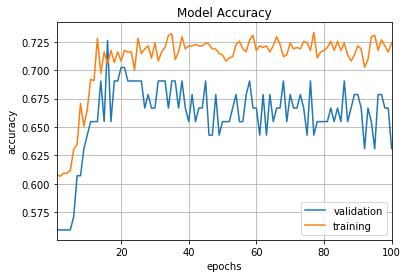

84/84 [==============================] - 0s 280us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.8201685150464376, 0.6309523781140646]
 best Score: 0.6309523781140646          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 31s - loss: 0.8436 - acc: 0.6040 - val_loss: 0.8336 - val_acc: 0.5952
Epoch 2/100
 - 1s - loss: 0.8304 - acc: 0.6053 - val_loss: 0.8354 - val_acc: 0.5952
Epoch 3/100
 - 1s - loss: 0.8292 - acc: 0.6027 - val_loss: 0.8335 - val_acc: 0.5952
Epoch 4/100
 - 1s - loss: 0.8283 - acc: 0.6040 - val_loss: 0.8288 - val_acc: 0.5833
Epoch 5/100
 - 1s - loss: 0.8249 - acc: 0.6067 - val_loss: 0.8269 - val_acc: 0.5952
Epoch 6/100
 - 1s - loss: 0.8242 - acc: 0.6187 - val_loss: 0.8248 - val_acc: 0.5833
Epoch 7/100
 - 1s - loss: 0.8209 - acc: 0.6267 - val_loss: 0.8250 - val_acc: 0.6071
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7856 - acc: 0.7227 - val_loss: 0.8013 - val_acc: 0.6905
Epoch 94/100
 - 1s - loss: 0.7853 - acc: 0.7293 - val_loss: 0.8032 - val_acc: 0.6786
Epoch 95/100
 - 1s - loss: 0.7871 - acc: 0.7173 - val_loss: 0.8002 - val_acc: 0.7024
Epoch 96/100
 - 1s - loss: 0.7870 - acc: 0.7080 - val_loss: 0.8002 - val_acc: 0.7024
Epoch 97/100
 - 1s - loss: 0.7876 - acc: 0.7187 - val_loss: 0.7999 - val_acc: 0.6786
Epoch 98/100
 - 1s - loss: 0.7871 - acc: 0.7213 - val_loss: 0.8003 - val_acc: 0.6667
Epoch 99/100
 - 1s - loss: 0.7857 - acc: 0.7280 - val_loss: 0.7979 - val_acc: 0.7024
Epoch 100/100
 - 1s - loss: 0.7854 - acc: 0.7093 - val_loss: 0.8119 - val_acc: 0.6548


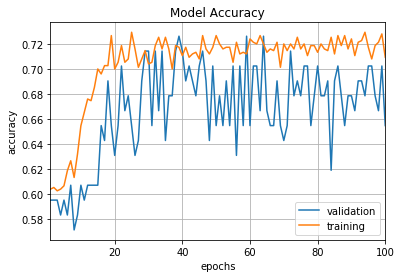

84/84 [==============================] - 0s 284us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.8118798023178464, 0.6547619019235883]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 19s - loss: 1.4295 - acc: 0.5293 - val_loss: 0.8447 - val_acc: 0.5476
Epoch 2/100
 - 1s - loss: 0.8408 - acc: 0.6080 - val_loss: 0.8444 - val_acc: 0.5476
Epoch 3/100
 - 1s - loss: 0.8391 - acc: 0.6080 - val_loss: 0.8443 - val_acc: 0.5476
Epoch 4/100
 - 1s - loss: 0.8378 - acc: 0.6080 - val_loss: 0.8444 - val_acc: 0.5476
Epoch 5/100
 - 1s - loss: 0.8368 - acc: 0.6080 - val_loss: 0.8447 - val_acc: 0.5476
Epoch 6/100
 - 1s - loss: 0.8361 - acc: 0.6080 - val_loss: 0.8452 - val_acc: 0.5476
Epoch 7/100
 - 1s - loss: 0.8356 - acc: 0.6080 - val_loss: 0.8456 - val_acc: 0.5476
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8481 - val_acc: 0.5476
Epoch 94/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8481 - val_acc: 0.5476
Epoch 95/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8481 - val_acc: 0.5476
Epoch 96/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8482 - val_acc: 0.5476
Epoch 97/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8481 - val_acc: 0.5476
Epoch 98/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8482 - val_acc: 0.5476
Epoch 99/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8482 - val_acc: 0.5476
Epoch 100/100
 - 1s - loss: 0.8349 - acc: 0.6080 - val_loss: 0.8482 - val_acc: 0.5476


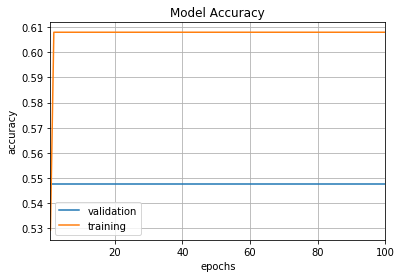

84/84 [==============================] - 0s 468us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.848155296984173, 0.547619050457364]
 best Score: 0.6547619019235883          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 19s - loss: 1.8488 - acc: 0.6053 - val_loss: 0.8318 - val_acc: 0.7143
Epoch 2/100
 - 1s - loss: 0.8324 - acc: 0.6173 - val_loss: 0.8109 - val_acc: 0.6310
Epoch 3/100
 - 1s - loss: 0.8321 - acc: 0.6013 - val_loss: 0.8174 - val_acc: 0.6548
Epoch 4/100
 - 1s - loss: 0.8310 - acc: 0.6200 - val_loss: 0.8111 - val_acc: 0.6310
Epoch 5/100
 - 1s - loss: 0.8311 - acc: 0.6240 - val_loss: 0.8096 - val_acc: 0.6429
Epoch 6/100
 - 1s - loss: 0.8310 - acc: 0.6227 - val_loss: 0.8085 - val_acc: 0.6310
Epoch 7/100
 - 1s - loss: 0.8302 - acc: 0.6107 - val_loss: 0.8093 - val_acc: 0.6429
Epoch 8/10

Epoch 93/100
 - 1s - loss: 0.7890 - acc: 0.7307 - val_loss: 0.7953 - val_acc: 0.6905
Epoch 94/100
 - 1s - loss: 0.7886 - acc: 0.7213 - val_loss: 0.7956 - val_acc: 0.6905
Epoch 95/100
 - 1s - loss: 0.7885 - acc: 0.7147 - val_loss: 0.7949 - val_acc: 0.7024
Epoch 96/100
 - 1s - loss: 0.7886 - acc: 0.7200 - val_loss: 0.7951 - val_acc: 0.7024
Epoch 97/100
 - 1s - loss: 0.7889 - acc: 0.7187 - val_loss: 0.7973 - val_acc: 0.6905
Epoch 98/100
 - 1s - loss: 0.7853 - acc: 0.7080 - val_loss: 0.7924 - val_acc: 0.7143
Epoch 99/100
 - 1s - loss: 0.7889 - acc: 0.7213 - val_loss: 0.7933 - val_acc: 0.7024
Epoch 100/100
 - 1s - loss: 0.7885 - acc: 0.7187 - val_loss: 0.7916 - val_acc: 0.7024


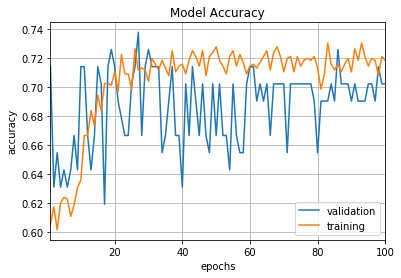

84/84 [==============================] - 0s 316us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.7916288347471327, 0.702380949542636]
 best Score: 0.702380949542636          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 0.8335 - acc: 0.6005 - val_loss: 0.8259 - val_acc: 0.6145
Epoch 2/100
 - 1s - loss: 0.8339 - acc: 0.6005 - val_loss: 0.8298 - val_acc: 0.6265
Epoch 3/100
 - 1s - loss: 0.8335 - acc: 0.6005 - val_loss: 0.8281 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: 0.8305 - acc: 0.5992 - val_loss: 0.8269 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.8329 - acc: 0.6032 - val_loss: 0.8246 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.8316 - acc: 0.6032 - val_loss: 0.8244 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.8299 - acc: 0.6112 - val_loss: 0.8223 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 1s - loss: 0.7905 - acc: 0.7190 - val_loss: 0.7815 - val_acc: 0.6867
Epoch 94/100
 - 1s - loss: 0.7896 - acc: 0.7270 - val_loss: 0.7793 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.7894 - acc: 0.7164 - val_loss: 0.7861 - val_acc: 0.6988
Epoch 96/100
 - 1s - loss: 0.7905 - acc: 0.7244 - val_loss: 0.7794 - val_acc: 0.7108
Epoch 97/100
 - 1s - loss: 0.7888 - acc: 0.7297 - val_loss: 0.7844 - val_acc: 0.7470
Epoch 98/100
 - 1s - loss: 0.7895 - acc: 0.7190 - val_loss: 0.7802 - val_acc: 0.6988
Epoch 99/100
 - 1s - loss: 0.7901 - acc: 0.7230 - val_loss: 0.7796 - val_acc: 0.6988
Epoch 100/100
 - 1s - loss: 0.7891 - acc: 0.7164 - val_loss: 0.7793 - val_acc: 0.7229


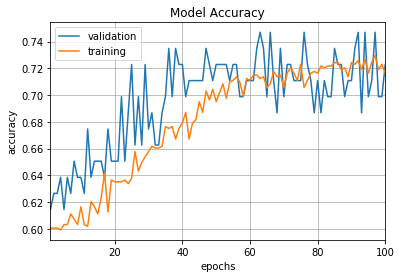

83/83 [==============================] - 0s 265us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.7793228403631464, 0.7228915727282145]
 best Score: 0.7228915727282145          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 19s - loss: 0.8360 - acc: 0.5979 - val_loss: 0.8271 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.8309 - acc: 0.5979 - val_loss: 0.8257 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.8292 - acc: 0.5979 - val_loss: 0.8246 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.8277 - acc: 0.5979 - val_loss: 0.8190 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.8257 - acc: 0.6019 - val_loss: 0.8198 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.8248 - acc: 0.6059 - val_loss: 0.8154 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.8227 - acc: 0.6125 - val_loss: 0.8136 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7878 - acc: 0.7137 - val_loss: 0.7882 - val_acc: 0.7108
Epoch 94/100
 - 1s - loss: 0.7879 - acc: 0.7177 - val_loss: 0.7863 - val_acc: 0.7349
Epoch 95/100
 - 1s - loss: 0.7861 - acc: 0.7111 - val_loss: 0.7907 - val_acc: 0.6988
Epoch 96/100
 - 1s - loss: 0.7879 - acc: 0.7124 - val_loss: 0.7899 - val_acc: 0.6988
Epoch 97/100
 - 1s - loss: 0.7873 - acc: 0.7057 - val_loss: 0.7880 - val_acc: 0.7108
Epoch 98/100
 - 1s - loss: 0.7874 - acc: 0.7177 - val_loss: 0.7836 - val_acc: 0.7229
Epoch 99/100
 - 1s - loss: 0.7902 - acc: 0.7124 - val_loss: 0.7908 - val_acc: 0.6988
Epoch 100/100
 - 1s - loss: 0.7885 - acc: 0.7204 - val_loss: 0.8291 - val_acc: 0.6386


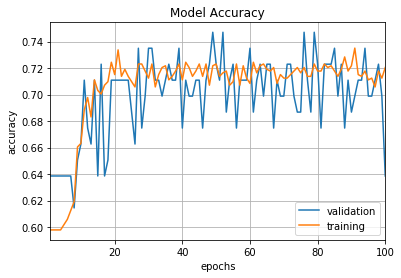

83/83 [==============================] - 0s 325us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.8291355989065515, 0.6385542197399828]
 best Score: 0.7228915727282145          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 19s - loss: 0.8426 - acc: 0.5846 - val_loss: 0.8427 - val_acc: 0.5663
Epoch 2/100
 - 1s - loss: 0.8367 - acc: 0.6059 - val_loss: 0.8451 - val_acc: 0.5663
Epoch 3/100
 - 1s - loss: 0.8355 - acc: 0.6059 - val_loss: 0.8445 - val_acc: 0.5663
Epoch 4/100
 - 1s - loss: 0.8345 - acc: 0.6059 - val_loss: 0.8474 - val_acc: 0.5663
Epoch 5/100
 - 1s - loss: 0.8337 - acc: 0.6059 - val_loss: 0.8475 - val_acc: 0.5663
Epoch 6/100
 - 1s - loss: 0.8319 - acc: 0.6059 - val_loss: 0.8555 - val_acc: 0.5663
Epoch 7/100
 - 1s - loss: 0.8316 - acc: 0.6059 - val_loss: 0.8476 - val_acc: 0.5663
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7813 - acc: 0.7244 - val_loss: 0.8421 - val_acc: 0.6867
Epoch 94/100
 - 1s - loss: 0.7803 - acc: 0.7084 - val_loss: 0.8455 - val_acc: 0.6747
Epoch 95/100
 - 1s - loss: 0.7797 - acc: 0.7244 - val_loss: 0.8580 - val_acc: 0.6747
Epoch 96/100
 - 1s - loss: 0.7824 - acc: 0.7297 - val_loss: 0.8438 - val_acc: 0.6867
Epoch 97/100
 - 1s - loss: 0.7834 - acc: 0.7150 - val_loss: 0.8447 - val_acc: 0.6867
Epoch 98/100
 - 1s - loss: 0.7802 - acc: 0.7297 - val_loss: 0.8506 - val_acc: 0.6867
Epoch 99/100
 - 1s - loss: 0.7810 - acc: 0.7270 - val_loss: 0.8418 - val_acc: 0.6506
Epoch 100/100
 - 1s - loss: 0.7817 - acc: 0.7190 - val_loss: 0.8511 - val_acc: 0.5904


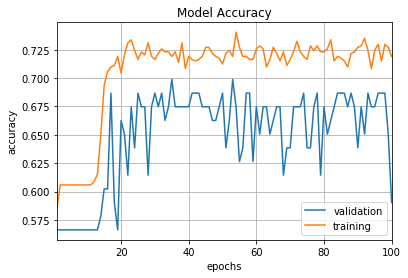

83/83 [==============================] - 0s 340us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.8511320194566107, 0.5903614400381065]
 best Score: 0.7228915727282145          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 20s - loss: 0.8311 - acc: 0.5965 - val_loss: 0.8397 - val_acc: 0.5783
Epoch 2/100
 - 1s - loss: 0.8270 - acc: 0.6045 - val_loss: 0.8366 - val_acc: 0.5783
Epoch 3/100
 - 1s - loss: 0.8256 - acc: 0.6152 - val_loss: 0.8344 - val_acc: 0.5904
Epoch 4/100
 - 1s - loss: 0.8236 - acc: 0.6232 - val_loss: 0.8283 - val_acc: 0.5783
Epoch 5/100
 - 1s - loss: 0.8191 - acc: 0.6418 - val_loss: 0.8292 - val_acc: 0.5783
Epoch 6/100
 - 1s - loss: 0.8151 - acc: 0.6471 - val_loss: 0.8375 - val_acc: 0.5783
Epoch 7/100
 - 1s - loss: 0.8147 - acc: 0.6565 - val_loss: 0.8237 - val_acc: 0.5904
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7889 - acc: 0.7124 - val_loss: 0.7793 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.7898 - acc: 0.7137 - val_loss: 0.7736 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.7898 - acc: 0.7217 - val_loss: 0.7776 - val_acc: 0.7229
Epoch 96/100
 - 1s - loss: 0.7890 - acc: 0.7190 - val_loss: 0.8098 - val_acc: 0.6627
Epoch 97/100
 - 1s - loss: 0.7894 - acc: 0.7124 - val_loss: 0.7786 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.7899 - acc: 0.7031 - val_loss: 0.7853 - val_acc: 0.7590
Epoch 99/100
 - 1s - loss: 0.7879 - acc: 0.7177 - val_loss: 0.7841 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.7907 - acc: 0.7057 - val_loss: 0.7841 - val_acc: 0.7229


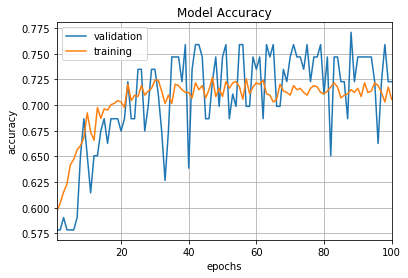

83/83 [==============================] - 0s 329us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.7841086157833237, 0.7228915727282145]
 best Score: 0.7228915727282145          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 19s - loss: 0.8338 - acc: 0.5979 - val_loss: 0.8234 - val_acc: 0.6386
Epoch 2/100
 - 1s - loss: 0.8316 - acc: 0.5979 - val_loss: 0.8241 - val_acc: 0.6386
Epoch 3/100
 - 1s - loss: 0.8315 - acc: 0.5979 - val_loss: 0.8253 - val_acc: 0.6386
Epoch 4/100
 - 1s - loss: 0.8307 - acc: 0.5979 - val_loss: 0.8261 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.8306 - acc: 0.5979 - val_loss: 0.8224 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.8301 - acc: 0.5979 - val_loss: 0.8225 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: 0.8296 - acc: 0.5979 - val_loss: 0.8212 - val_acc: 0.6386
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7881 - acc: 0.7031 - val_loss: 0.7780 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.7875 - acc: 0.7111 - val_loss: 0.7780 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.7874 - acc: 0.7190 - val_loss: 0.7806 - val_acc: 0.7229
Epoch 96/100
 - 1s - loss: 0.7887 - acc: 0.7111 - val_loss: 0.7928 - val_acc: 0.6747
Epoch 97/100
 - 1s - loss: 0.7877 - acc: 0.7150 - val_loss: 0.7789 - val_acc: 0.7470
Epoch 98/100
 - 1s - loss: 0.7880 - acc: 0.7177 - val_loss: 0.7811 - val_acc: 0.7229
Epoch 99/100
 - 1s - loss: 0.7880 - acc: 0.7244 - val_loss: 0.7953 - val_acc: 0.6747
Epoch 100/100
 - 1s - loss: 0.7884 - acc: 0.7204 - val_loss: 0.7785 - val_acc: 0.7711


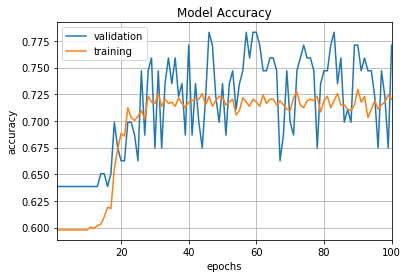

83/83 [==============================] - 0s 307us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.7785285208598677, 0.7710843351950128]
 best Score: 0.7710843351950128          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 20s - loss: 1.3443 - acc: 0.6032 - val_loss: 0.8674 - val_acc: 0.4337
Epoch 2/100
 - 1s - loss: 0.8329 - acc: 0.6059 - val_loss: 0.8873 - val_acc: 0.3614
Epoch 3/100
 - 1s - loss: 0.8271 - acc: 0.6032 - val_loss: 0.8358 - val_acc: 0.5904
Epoch 4/100
 - 1s - loss: 0.8275 - acc: 0.6059 - val_loss: 0.8203 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: 0.8226 - acc: 0.6192 - val_loss: 0.8240 - val_acc: 0.6386
Epoch 6/100
 - 1s - loss: 0.8207 - acc: 0.6325 - val_loss: 0.8156 - val_acc: 0.6988
Epoch 7/100
 - 1s - loss: 0.8167 - acc: 0.6378 - val_loss: 0.8278 - val_acc: 0.6024
Epoch 8

Epoch 93/100
 - 1s - loss: 0.7871 - acc: 0.7257 - val_loss: 0.8113 - val_acc: 0.6988
Epoch 94/100
 - 1s - loss: 0.7871 - acc: 0.7164 - val_loss: 0.8188 - val_acc: 0.6386
Epoch 95/100
 - 1s - loss: 0.7881 - acc: 0.7177 - val_loss: 0.8223 - val_acc: 0.6386
Epoch 96/100
 - 1s - loss: 0.7870 - acc: 0.7204 - val_loss: 0.8124 - val_acc: 0.6386
Epoch 97/100
 - 1s - loss: 0.7850 - acc: 0.7324 - val_loss: 0.8102 - val_acc: 0.7229
Epoch 98/100
 - 1s - loss: 0.7867 - acc: 0.7204 - val_loss: 0.8092 - val_acc: 0.6747
Epoch 99/100
 - 1s - loss: 0.7897 - acc: 0.7217 - val_loss: 0.8126 - val_acc: 0.6386
Epoch 100/100
 - 1s - loss: 0.7896 - acc: 0.7204 - val_loss: 0.8088 - val_acc: 0.6988


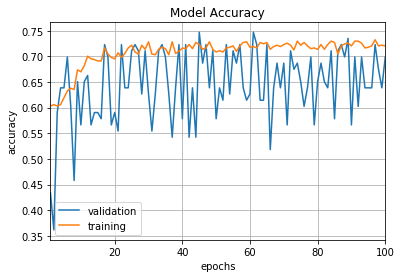

83/83 [==============================] - 0s 281us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.8088429986712444, 0.6987951871860458]
 best Score: 0.7710843351950128          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.poisson,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7710843351950128
0.6680292607653231


[[0.8201685150464376, 0.6309523781140646],
 [0.8118798023178464, 0.6547619019235883],
 [0.848155296984173, 0.547619050457364],
 [0.7916288347471327, 0.702380949542636],
 [0.7793228403631464, 0.7228915727282145],
 [0.8291355989065515, 0.6385542197399828],
 [0.8511320194566107, 0.5903614400381065],
 [0.7841086157833237, 0.7228915727282145],
 [0.7785285208598677, 0.7710843351950128],
 [0.8088429986712444, 0.6987951871860458]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7062263659707608


[0.7240000021457672,
 0.709333332379659,
 0.6080000058809916,
 0.7186666659514109,
 0.7163781616960797,
 0.720372837408881,
 0.7190412795654785,
 0.7057257022425909,
 0.7203728382025514,
 0.7203728342341996]

# 14 #losses.cosine_proximity, 

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: -6.9581e-01 - acc: 0.5987 - val_loss: -7.1076e-01 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: -7.2884e-01 - acc: 0.5960 - val_loss: -7.2542e-01 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: -7.3164e-01 - acc: 0.6240 - val_loss: -7.2144e-01 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: -7.3329e-01 - acc: 0.6240 - val_loss: -7.3241e-01 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: -7.3747e-01 - acc: 0.6333 - val_loss: -7.3872e-01 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: -7.4312e-01 - acc: 0.6360 - val_loss: -7.4061e-01 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: -7.4744e-01 - acc: 0.6573 - val_loss: -7.4969e-01 - val_acc: 0.6786
Epoch 8/100
 - 0s - loss: -7.5117e-01 - acc: 0.6613 - val_loss: -7.6160e-01 - val_acc: 0.6905
Epoch 9/100
 - 0s - loss: -7.5728e-01 - acc: 0.7040 - val_loss: -7.6814e-01 - val_acc: 0.6548
Epoch 10/100
 - 0s - loss: -7.5935e-01 - acc: 0.6840 - val_loss: -7.7343e-01 - val_acc: 0.6786
Epoch 

Epoch 87/100
 - 0s - loss: -7.8011e-01 - acc: 0.7107 - val_loss: -7.9607e-01 - val_acc: 0.7738
Epoch 88/100
 - 0s - loss: -7.8031e-01 - acc: 0.7147 - val_loss: -7.9926e-01 - val_acc: 0.7500
Epoch 89/100
 - 0s - loss: -7.7906e-01 - acc: 0.7027 - val_loss: -7.9936e-01 - val_acc: 0.7500
Epoch 90/100
 - 0s - loss: -7.7986e-01 - acc: 0.7120 - val_loss: -7.9023e-01 - val_acc: 0.7619
Epoch 91/100
 - 0s - loss: -7.8068e-01 - acc: 0.7240 - val_loss: -7.9878e-01 - val_acc: 0.7619
Epoch 92/100
 - 0s - loss: -7.7949e-01 - acc: 0.7147 - val_loss: -7.9868e-01 - val_acc: 0.7500
Epoch 93/100
 - 0s - loss: -7.8130e-01 - acc: 0.7200 - val_loss: -7.8699e-01 - val_acc: 0.7500
Epoch 94/100
 - 0s - loss: -7.7962e-01 - acc: 0.7133 - val_loss: -7.9944e-01 - val_acc: 0.7619
Epoch 95/100
 - 0s - loss: -7.8048e-01 - acc: 0.7147 - val_loss: -7.8941e-01 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: -7.7988e-01 - acc: 0.7120 - val_loss: -7.9286e-01 - val_acc: 0.7738
Epoch 97/100
 - 0s - loss: -7.7946e-01 - acc: 0.71

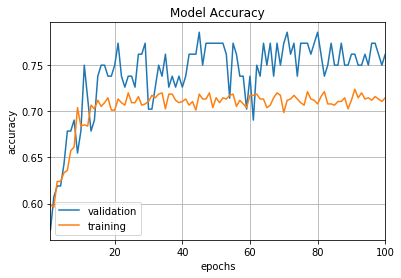

84/84 [==============================] - 0s 115us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [-0.7987150635038104, 0.7619047619047619]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: -6.7842e-01 - acc: 0.5307 - val_loss: -7.4076e-01 - val_acc: 0.6786
Epoch 2/100
 - 0s - loss: -7.2544e-01 - acc: 0.5987 - val_loss: -7.4912e-01 - val_acc: 0.6786
Epoch 3/100
 - 0s - loss: -7.3003e-01 - acc: 0.5933 - val_loss: -7.5052e-01 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: -7.3733e-01 - acc: 0.6093 - val_loss: -7.4001e-01 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: -7.4663e-01 - acc: 0.6440 - val_loss: -7.5318e-01 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: -7.5155e-01 - acc: 0.6453 - val_loss: -7.6583e-01 - val_acc: 0.6905
Epoch 7/100
 - 0s - loss: -7.617

 - 0s - loss: -7.8445e-01 - acc: 0.7280 - val_loss: -7.6442e-01 - val_acc: 0.7024
Epoch 84/100
 - 0s - loss: -7.8542e-01 - acc: 0.7200 - val_loss: -7.5853e-01 - val_acc: 0.6667
Epoch 85/100
 - 0s - loss: -7.8296e-01 - acc: 0.7200 - val_loss: -7.6990e-01 - val_acc: 0.7143
Epoch 86/100
 - 0s - loss: -7.8483e-01 - acc: 0.7227 - val_loss: -7.6367e-01 - val_acc: 0.7024
Epoch 87/100
 - 0s - loss: -7.8334e-01 - acc: 0.7160 - val_loss: -7.6803e-01 - val_acc: 0.7024
Epoch 88/100
 - 0s - loss: -7.8393e-01 - acc: 0.7147 - val_loss: -7.7813e-01 - val_acc: 0.7500
Epoch 89/100
 - 0s - loss: -7.8653e-01 - acc: 0.7440 - val_loss: -7.7533e-01 - val_acc: 0.7262
Epoch 90/100
 - 0s - loss: -7.8338e-01 - acc: 0.7147 - val_loss: -7.7281e-01 - val_acc: 0.7143
Epoch 91/100
 - 0s - loss: -7.8458e-01 - acc: 0.7187 - val_loss: -7.7588e-01 - val_acc: 0.7143
Epoch 92/100
 - 0s - loss: -7.8417e-01 - acc: 0.7147 - val_loss: -7.7406e-01 - val_acc: 0.7024
Epoch 93/100
 - 0s - loss: -7.8354e-01 - acc: 0.7187 - val_loss

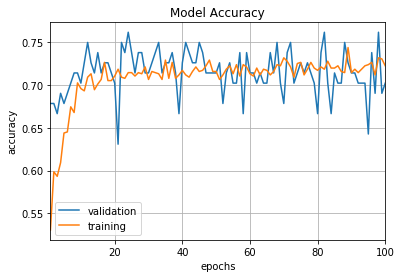

84/84 [==============================] - 0s 34us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [-0.771819551785787, 0.7023809580575853]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: -6.6312e-01 - acc: 0.4947 - val_loss: -7.2775e-01 - val_acc: 0.6310
Epoch 2/100
 - 0s - loss: -7.2363e-01 - acc: 0.5987 - val_loss: -7.2963e-01 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: -7.2427e-01 - acc: 0.5987 - val_loss: -7.2922e-01 - val_acc: 0.6310
Epoch 4/100
 - 0s - loss: -7.2544e-01 - acc: 0.5987 - val_loss: -7.2897e-01 - val_acc: 0.6310
Epoch 5/100
 - 0s - loss: -7.2604e-01 - acc: 0.5987 - val_loss: -7.2873e-01 - val_acc: 0.6310
Epoch 6/100
 - 0s - loss: -7.2741e-01 - acc: 0.5987 - val_loss: -7.2816e-01 - val_acc: 0.6310
Epoch 7/100
 - 0s - loss: -7.2769e

 - 0s - loss: -7.8834e-01 - acc: 0.7333 - val_loss: -7.4731e-01 - val_acc: 0.6667
Epoch 84/100
 - 0s - loss: -7.8754e-01 - acc: 0.7373 - val_loss: -7.4480e-01 - val_acc: 0.6429
Epoch 85/100
 - 0s - loss: -7.8856e-01 - acc: 0.7373 - val_loss: -7.3664e-01 - val_acc: 0.6310
Epoch 86/100
 - 0s - loss: -7.8839e-01 - acc: 0.7333 - val_loss: -7.4001e-01 - val_acc: 0.6429
Epoch 87/100
 - 0s - loss: -7.8766e-01 - acc: 0.7360 - val_loss: -7.3625e-01 - val_acc: 0.6310
Epoch 88/100
 - 0s - loss: -7.8876e-01 - acc: 0.7387 - val_loss: -7.3887e-01 - val_acc: 0.6429
Epoch 89/100
 - 0s - loss: -7.8911e-01 - acc: 0.7373 - val_loss: -7.3711e-01 - val_acc: 0.6310
Epoch 90/100
 - 0s - loss: -7.8904e-01 - acc: 0.7387 - val_loss: -7.2817e-01 - val_acc: 0.6548
Epoch 91/100
 - 0s - loss: -7.8872e-01 - acc: 0.7373 - val_loss: -7.4152e-01 - val_acc: 0.6429
Epoch 92/100
 - 0s - loss: -7.8867e-01 - acc: 0.7360 - val_loss: -7.4501e-01 - val_acc: 0.6548
Epoch 93/100
 - 0s - loss: -7.8945e-01 - acc: 0.7373 - val_loss

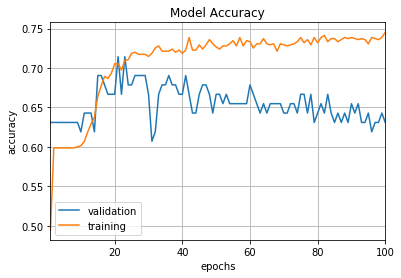

84/84 [==============================] - 0s 93us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [-0.7365944044930595, 0.6309523781140646]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: -7.1800e-01 - acc: 0.5787 - val_loss: -7.3966e-01 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: -7.2557e-01 - acc: 0.5947 - val_loss: -7.6094e-01 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: -7.2570e-01 - acc: 0.5987 - val_loss: -7.4131e-01 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: -7.2718e-01 - acc: 0.5960 - val_loss: -7.5378e-01 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: -7.2862e-01 - acc: 0.6013 - val_loss: -7.2617e-01 - val_acc: 0.7024
Epoch 6/100
 - 0s - loss: -7.3115e-01 - acc: 0.6173 - val_loss: -7.6345e-01 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: -7.2928

 - 0s - loss: -7.8386e-01 - acc: 0.7187 - val_loss: -7.5254e-01 - val_acc: 0.6548
Epoch 84/100
 - 0s - loss: -7.8198e-01 - acc: 0.7173 - val_loss: -7.6930e-01 - val_acc: 0.6905
Epoch 85/100
 - 0s - loss: -7.8340e-01 - acc: 0.7227 - val_loss: -7.5053e-01 - val_acc: 0.6429
Epoch 86/100
 - 0s - loss: -7.8209e-01 - acc: 0.7160 - val_loss: -7.4249e-01 - val_acc: 0.6667
Epoch 87/100
 - 0s - loss: -7.8345e-01 - acc: 0.7160 - val_loss: -7.7675e-01 - val_acc: 0.6905
Epoch 88/100
 - 0s - loss: -7.8269e-01 - acc: 0.7240 - val_loss: -7.3637e-01 - val_acc: 0.6429
Epoch 89/100
 - 0s - loss: -7.8237e-01 - acc: 0.7213 - val_loss: -7.7806e-01 - val_acc: 0.6905
Epoch 90/100
 - 0s - loss: -7.8199e-01 - acc: 0.7200 - val_loss: -7.7326e-01 - val_acc: 0.6905
Epoch 91/100
 - 0s - loss: -7.8445e-01 - acc: 0.7133 - val_loss: -7.8358e-01 - val_acc: 0.7143
Epoch 92/100
 - 0s - loss: -7.8344e-01 - acc: 0.7160 - val_loss: -7.7397e-01 - val_acc: 0.6905
Epoch 93/100
 - 0s - loss: -7.8312e-01 - acc: 0.7160 - val_loss

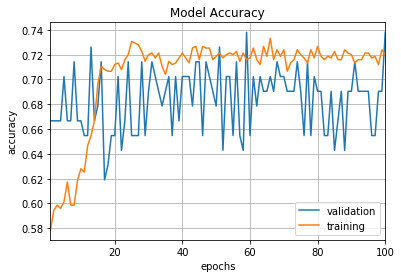

84/84 [==============================] - 0s 96us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [-0.7845368498847598, 0.738095243771871]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -7.2246e-01 - acc: 0.5952 - val_loss: -7.4930e-01 - val_acc: 0.6627
Epoch 2/100
 - 0s - loss: -7.2648e-01 - acc: 0.5952 - val_loss: -7.5305e-01 - val_acc: 0.6627
Epoch 3/100
 - 0s - loss: -7.2648e-01 - acc: 0.5952 - val_loss: -7.5504e-01 - val_acc: 0.6627
Epoch 4/100
 - 0s - loss: -7.2687e-01 - acc: 0.5952 - val_loss: -7.5287e-01 - val_acc: 0.6627
Epoch 5/100
 - 0s - loss: -7.2775e-01 - acc: 0.5952 - val_loss: -7.5211e-01 - val_acc: 0.6627
Epoch 6/100
 - 0s - loss: -7.2750e-01 - acc: 0.5952 - val_loss: -7.4561e-01 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: -7.2789e

 - 0s - loss: -7.7963e-01 - acc: 0.7177 - val_loss: -7.9181e-01 - val_acc: 0.7108
Epoch 84/100
 - 0s - loss: -7.7814e-01 - acc: 0.7084 - val_loss: -7.9546e-01 - val_acc: 0.7349
Epoch 85/100
 - 0s - loss: -7.8095e-01 - acc: 0.7204 - val_loss: -7.9969e-01 - val_acc: 0.7470
Epoch 86/100
 - 0s - loss: -7.8008e-01 - acc: 0.7244 - val_loss: -7.4532e-01 - val_acc: 0.6506
Epoch 87/100
 - 0s - loss: -7.7981e-01 - acc: 0.7137 - val_loss: -7.3515e-01 - val_acc: 0.6386
Epoch 88/100
 - 0s - loss: -7.8078e-01 - acc: 0.7217 - val_loss: -8.0332e-01 - val_acc: 0.7711
Epoch 89/100
 - 0s - loss: -7.7739e-01 - acc: 0.7124 - val_loss: -7.7103e-01 - val_acc: 0.7229
Epoch 90/100
 - 0s - loss: -7.8004e-01 - acc: 0.7097 - val_loss: -8.0431e-01 - val_acc: 0.7590
Epoch 91/100
 - 0s - loss: -7.7991e-01 - acc: 0.7150 - val_loss: -7.1424e-01 - val_acc: 0.6145
Epoch 92/100
 - 0s - loss: -7.7976e-01 - acc: 0.7097 - val_loss: -7.9692e-01 - val_acc: 0.7349
Epoch 93/100
 - 0s - loss: -7.8129e-01 - acc: 0.7190 - val_loss

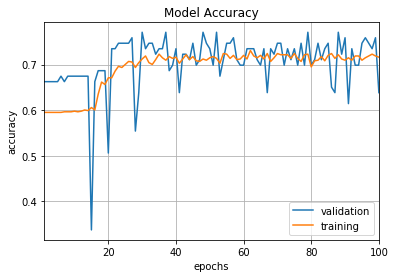

83/83 [==============================] - 0s 39us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [-0.7416814436395485, 0.6385542147130852]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 3/100
 - 0s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 4/100
 - 0s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 5/100
 - 0s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 6/100
 - 0s - loss: -3.9947e-01 - acc: 0.3995 - val_loss: -3.8554e-01 - val_acc: 0.3855
Epoch 7/100
 - 0s - loss: -3.9947

 - 0s - loss: -7.2117e-01 - acc: 0.6005 - val_loss: -7.2509e-01 - val_acc: 0.6145
Epoch 84/100
 - 0s - loss: -7.2119e-01 - acc: 0.6005 - val_loss: -7.2515e-01 - val_acc: 0.6145
Epoch 85/100
 - 0s - loss: -7.2118e-01 - acc: 0.6005 - val_loss: -7.2517e-01 - val_acc: 0.6145
Epoch 86/100
 - 0s - loss: -7.2115e-01 - acc: 0.6005 - val_loss: -7.2513e-01 - val_acc: 0.6145
Epoch 87/100
 - 0s - loss: -7.2118e-01 - acc: 0.6005 - val_loss: -7.2516e-01 - val_acc: 0.6145
Epoch 88/100
 - 0s - loss: -7.2117e-01 - acc: 0.6005 - val_loss: -7.2517e-01 - val_acc: 0.6145
Epoch 89/100
 - 0s - loss: -7.2115e-01 - acc: 0.6005 - val_loss: -7.2511e-01 - val_acc: 0.6145
Epoch 90/100
 - 0s - loss: -7.2117e-01 - acc: 0.6005 - val_loss: -7.2508e-01 - val_acc: 0.6145
Epoch 91/100
 - 0s - loss: -7.2115e-01 - acc: 0.6005 - val_loss: -7.2513e-01 - val_acc: 0.6145
Epoch 92/100
 - 0s - loss: -7.2119e-01 - acc: 0.6005 - val_loss: -7.2508e-01 - val_acc: 0.6145
Epoch 93/100
 - 0s - loss: -7.2118e-01 - acc: 0.6005 - val_loss

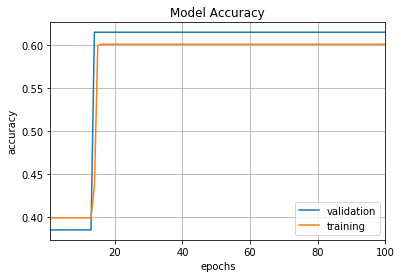

83/83 [==============================] - 0s 72us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [-0.7251790331070682, 0.6144578255802752]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -5.9458e-01 - acc: 0.5379 - val_loss: -6.2777e-01 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: -6.8492e-01 - acc: 0.5779 - val_loss: -7.3050e-01 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: -7.0660e-01 - acc: 0.5846 - val_loss: -6.7597e-01 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: -7.1712e-01 - acc: 0.5885 - val_loss: -6.9707e-01 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: -7.1793e-01 - acc: 0.6152 - val_loss: -6.8911e-01 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: -7.3672e-01 - acc: 0.6391 - val_loss: -7.2107e-01 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: -7.4083

 - 0s - loss: -7.7756e-01 - acc: 0.7177 - val_loss: -8.1225e-01 - val_acc: 0.7711
Epoch 84/100
 - 0s - loss: -7.8343e-01 - acc: 0.7204 - val_loss: -8.1853e-01 - val_acc: 0.7711
Epoch 85/100
 - 0s - loss: -7.8067e-01 - acc: 0.7177 - val_loss: -7.7046e-01 - val_acc: 0.6988
Epoch 86/100
 - 0s - loss: -7.7641e-01 - acc: 0.7150 - val_loss: -7.9201e-01 - val_acc: 0.6988
Epoch 87/100
 - 0s - loss: -7.7829e-01 - acc: 0.7137 - val_loss: -8.0429e-01 - val_acc: 0.7590
Epoch 88/100
 - 0s - loss: -7.7918e-01 - acc: 0.7111 - val_loss: -8.1837e-01 - val_acc: 0.7831
Epoch 89/100
 - 0s - loss: -7.7788e-01 - acc: 0.7124 - val_loss: -8.1784e-01 - val_acc: 0.7711
Epoch 90/100
 - 0s - loss: -7.7881e-01 - acc: 0.7177 - val_loss: -8.1611e-01 - val_acc: 0.7952
Epoch 91/100
 - 0s - loss: -7.8138e-01 - acc: 0.7164 - val_loss: -8.1518e-01 - val_acc: 0.7952
Epoch 92/100
 - 0s - loss: -7.8066e-01 - acc: 0.7137 - val_loss: -8.0157e-01 - val_acc: 0.7470
Epoch 93/100
 - 0s - loss: -7.7919e-01 - acc: 0.7204 - val_loss

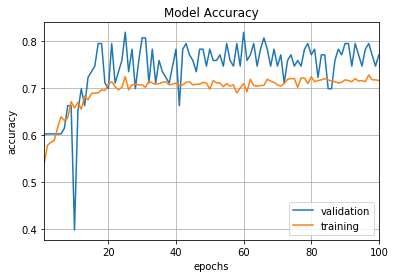

83/83 [==============================] - 0s 167us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [-0.8221948491521629, 0.7710843337587563]
 best Score: 0.7710843337587563          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -5.8541e-01 - acc: 0.5020 - val_loss: -6.9552e-01 - val_acc: 0.4819
Epoch 2/100
 - 0s - loss: -7.2538e-01 - acc: 0.6152 - val_loss: -6.6863e-01 - val_acc: 0.4819
Epoch 3/100
 - 0s - loss: -7.2777e-01 - acc: 0.6152 - val_loss: -6.6540e-01 - val_acc: 0.4819
Epoch 4/100
 - 0s - loss: -7.2793e-01 - acc: 0.6152 - val_loss: -6.7016e-01 - val_acc: 0.4819
Epoch 5/100
 - 0s - loss: -7.2905e-01 - acc: 0.6152 - val_loss: -6.6763e-01 - val_acc: 0.4819
Epoch 6/100
 - 0s - loss: -7.3035e-01 - acc: 0.6152 - val_loss: -7.0135e-01 - val_acc: 0.4819
Epoch 7/100
 - 0s - loss: -7.326

 - 0s - loss: -7.8158e-01 - acc: 0.7124 - val_loss: -7.7669e-01 - val_acc: 0.6867
Epoch 84/100
 - 0s - loss: -7.8256e-01 - acc: 0.7190 - val_loss: -7.8791e-01 - val_acc: 0.7229
Epoch 85/100
 - 0s - loss: -7.8186e-01 - acc: 0.7217 - val_loss: -7.7479e-01 - val_acc: 0.6867
Epoch 86/100
 - 0s - loss: -7.8180e-01 - acc: 0.7137 - val_loss: -7.6571e-01 - val_acc: 0.6627
Epoch 87/100
 - 0s - loss: -7.8184e-01 - acc: 0.7177 - val_loss: -7.4884e-01 - val_acc: 0.6506
Epoch 88/100
 - 0s - loss: -7.8133e-01 - acc: 0.7150 - val_loss: -7.6866e-01 - val_acc: 0.6747
Epoch 89/100
 - 0s - loss: -7.8155e-01 - acc: 0.7190 - val_loss: -7.6138e-01 - val_acc: 0.6627
Epoch 90/100
 - 0s - loss: -7.8193e-01 - acc: 0.7164 - val_loss: -7.7405e-01 - val_acc: 0.6867
Epoch 91/100
 - 0s - loss: -7.8115e-01 - acc: 0.7150 - val_loss: -7.6818e-01 - val_acc: 0.6747
Epoch 92/100
 - 0s - loss: -7.8287e-01 - acc: 0.7230 - val_loss: -7.6095e-01 - val_acc: 0.6627
Epoch 93/100
 - 0s - loss: -7.8291e-01 - acc: 0.7244 - val_loss

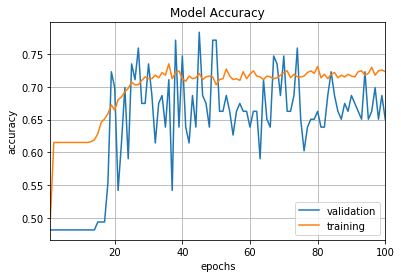

83/83 [==============================] - 0s 45us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [-0.7475667337337172, 0.650602408920426]
 best Score: 0.7710843337587563          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -6.9609e-01 - acc: 0.5979 - val_loss: -7.1631e-01 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: -7.2824e-01 - acc: 0.6205 - val_loss: -7.1162e-01 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: -7.2983e-01 - acc: 0.6125 - val_loss: -7.2487e-01 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: -7.3138e-01 - acc: 0.6218 - val_loss: -7.1967e-01 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: -7.3286e-01 - acc: 0.6125 - val_loss: -7.2134e-01 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: -7.3452e-01 - acc: 0.6338 - val_loss: -7.2522e-01 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: -7.3578e

 - 0s - loss: -7.9074e-01 - acc: 0.7310 - val_loss: -6.9728e-01 - val_acc: 0.5783
Epoch 84/100
 - 0s - loss: -7.8649e-01 - acc: 0.7164 - val_loss: -7.0903e-01 - val_acc: 0.6024
Epoch 85/100
 - 0s - loss: -7.8574e-01 - acc: 0.7257 - val_loss: -7.1067e-01 - val_acc: 0.6145
Epoch 86/100
 - 0s - loss: -7.8900e-01 - acc: 0.7417 - val_loss: -6.9717e-01 - val_acc: 0.5663
Epoch 87/100
 - 0s - loss: -7.9072e-01 - acc: 0.7443 - val_loss: -6.9982e-01 - val_acc: 0.5783
Epoch 88/100
 - 0s - loss: -7.8924e-01 - acc: 0.7337 - val_loss: -7.0203e-01 - val_acc: 0.6265
Epoch 89/100
 - 0s - loss: -7.8743e-01 - acc: 0.7377 - val_loss: -7.0658e-01 - val_acc: 0.6024
Epoch 90/100
 - 0s - loss: -7.9139e-01 - acc: 0.7364 - val_loss: -7.0001e-01 - val_acc: 0.5783
Epoch 91/100
 - 0s - loss: -7.9102e-01 - acc: 0.7364 - val_loss: -7.0500e-01 - val_acc: 0.6024
Epoch 92/100
 - 0s - loss: -7.9291e-01 - acc: 0.7337 - val_loss: -7.1101e-01 - val_acc: 0.6145
Epoch 93/100
 - 0s - loss: -7.9102e-01 - acc: 0.7337 - val_loss

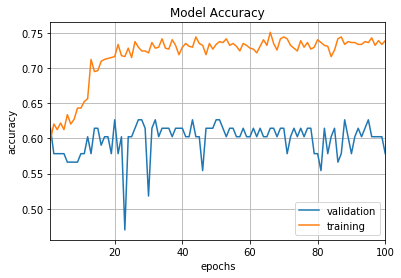

83/83 [==============================] - 0s 189us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [-0.6945874030331531, 0.5783132573208177]
 best Score: 0.7710843337587563          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: -6.1253e-01 - acc: 0.6125 - val_loss: -5.0603e-01 - val_acc: 0.5060
Epoch 2/100
 - 0s - loss: -6.1254e-01 - acc: 0.6125 - val_loss: -5.0603e-01 - val_acc: 0.5060
Epoch 3/100
 - 0s - loss: -6.1256e-01 - acc: 0.6125 - val_loss: -5.0605e-01 - val_acc: 0.5060
Epoch 4/100
 - 0s - loss: -6.1269e-01 - acc: 0.6125 - val_loss: -5.0631e-01 - val_acc: 0.5060
Epoch 5/100
 - 0s - loss: -6.7405e-01 - acc: 0.6138 - val_loss: -6.7864e-01 - val_acc: 0.5060
Epoch 6/100
 - 0s - loss: -7.3382e-01 - acc: 0.6178 - val_loss: -5.9491e-01 - val_acc: 0.5060
Epoch 7/100
 - 0s - loss: -7.39

 - 0s - loss: -7.8768e-01 - acc: 0.7324 - val_loss: -7.3134e-01 - val_acc: 0.6145
Epoch 84/100
 - 0s - loss: -7.8915e-01 - acc: 0.7337 - val_loss: -7.7535e-01 - val_acc: 0.7229
Epoch 85/100
 - 0s - loss: -7.8569e-01 - acc: 0.7150 - val_loss: -7.6765e-01 - val_acc: 0.6867
Epoch 86/100
 - 0s - loss: -7.8648e-01 - acc: 0.7230 - val_loss: -7.7157e-01 - val_acc: 0.6867
Epoch 87/100
 - 0s - loss: -7.8702e-01 - acc: 0.7244 - val_loss: -7.4700e-01 - val_acc: 0.6627
Epoch 88/100
 - 0s - loss: -7.8553e-01 - acc: 0.7217 - val_loss: -7.7129e-01 - val_acc: 0.6867
Epoch 89/100
 - 0s - loss: -7.8516e-01 - acc: 0.7217 - val_loss: -7.3455e-01 - val_acc: 0.6506
Epoch 90/100
 - 0s - loss: -7.8834e-01 - acc: 0.7324 - val_loss: -7.6286e-01 - val_acc: 0.6747
Epoch 91/100
 - 0s - loss: -7.8847e-01 - acc: 0.7270 - val_loss: -7.7738e-01 - val_acc: 0.7229
Epoch 92/100
 - 0s - loss: -7.8566e-01 - acc: 0.7217 - val_loss: -7.4011e-01 - val_acc: 0.6506
Epoch 93/100
 - 0s - loss: -7.8588e-01 - acc: 0.7230 - val_loss

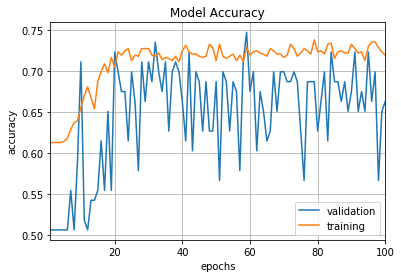

83/83 [==============================] - 0s 92us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [-0.7641452421624977, 0.6626505966646126]
 best Score: 0.7710843337587563          
-------------------------------------------------------------------------------------------




In [9]:
batch_size = 10
num_classes = 2
epochs = 100
input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.cosine_proximity,
                  optimizer=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [10]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7710843337587563
0.6748995978806256


[[-0.7987150635038104, 0.7619047619047619],
 [-0.771819551785787, 0.7023809580575853],
 [-0.7365944044930595, 0.6309523781140646],
 [-0.7845368498847598, 0.738095243771871],
 [-0.7416814436395485, 0.6385542147130852],
 [-0.7251790331070682, 0.6144578255802752],
 [-0.8221948491521629, 0.7710843337587563],
 [-0.7475667337337172, 0.650602408920426],
 [-0.6945874030331531, 0.5783132573208177],
 [-0.7641452421624977, 0.6626505966646126]]

In [11]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7117047506569759


[0.7146666709582011,
 0.7226666696866353,
 0.7453333334128062,
 0.7200000011920928,
 0.7163781606246248,
 0.6005326301137236,
 0.716378159116651,
 0.7230359550798622,
 0.739014646026012,
 0.7190412803591488]

In [ ]:
batch_size = 10
num_classes = 2
epochs = 300

input_shape = len(actual_x[0])
kfold_validation_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0

for train,test in kf.split(actual_x):
    fold += 1
    print("\n\nfold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    #model.save("heart_attack_risk_prediction_fold_no_"+str(fold)+"_with_cross_validation.h5")

    rounded_predections = model.predict_classes(test_x,batch_size=10,verbose=0)
    rounded_predicted_result = rounded_predections
    #pred = model.predict(self.test_x)
    pred_class = model.predict_classes(test_x)
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)

    print("\nFold {0} score : {1}\n best Score: {2}".format(fold,score,best_score))

    #print("\n\n")

    #cm = confussion_matrix_generator(test_y,rounded_predicted_result)
    #ROC_curve_generator(model,test_x)

    #print(classification_report(pred_class,test_y,target_names=terget_names))

    #performance(cm)

    #print("\n\nnew\n\n")
    #break

In [ ]:
kfold_validation_score_store